In [1]:
# JSS
## TODO 
#using pca to reduce the dimensionality of the global descriptors
#using MobileVnet instead of netVLAD
#using hfnet instead of netVlAD and MobileVnet --that is not working 
# this will also help reduce the complexity 
#understand what superglue is outputting
# getting two models from SFM 
# Setting up the scale of the model -- this is done easy and simple

In [5]:
import numpy as np
import argparse
import yaml
import logging
from pathlib import Path
from tqdm import tqdm
from pprint import pformat
import h5py
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from notebooks.utils import plot_images, plot_matches, add_frame

In [6]:
from hfnet.models import get_model  

In [7]:
# send the path to the image directory and get the path to all the images in it
def image_directory_parser(path, viewer=True, number= 4):    
    globs=['*.jpg', '*.png', '*.jpeg', '*.JPG', '*.PNG']
    ## can also use sufix instead of with method
    image_path = []
    for g in globs:
        image_path += list(path.glob("**/"+g))
    if viewer:
        nrows = number
        ncols = number
        fig = plt.gcf()
        fig.set_size_inches(ncols*4, ncols*4)
        for i in range(2*number):
            sp = plt.subplot(nrows, ncols, i + 1)
            sp.axis('Off') # Don't show axes (or gridlines)
            img = mpimg.imread((image_path[i]))
            plt.imshow(img)
        plt.show()
    return image_path

In [8]:
path_to_images_for_map = Path('/home/Hierarchical-Localization/H_Loop_Chennai/new')

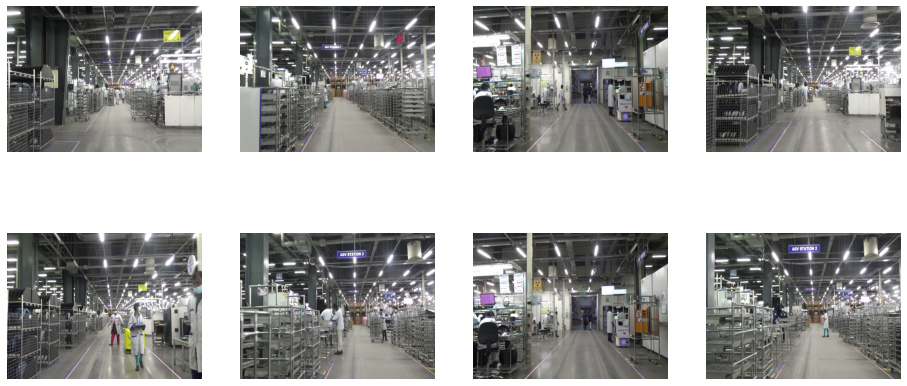

In [10]:
image_path = image_directory_parser(path_to_images_for_map, viewer=True, number = 4)

In [11]:
# image dictionary creator gives image, its name and index as dictionary
def dictionary_of_images(image_path):
    image_dict ={}
    for i,j in tqdm(enumerate(image_path)):
        image_array = cv2.imread(str(j))
#         print(image_path[i].name)
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        image_dict[i] = {"image":image_array, "name": image_path[i].name, "number": i}
    return image_dict

In [12]:
image_dict = dictionary_of_images(image_path)

10it [00:00, 48.39it/s]

loopH_381_560-09540.png
loopH_988_360-24710.png
loopH_929_960-23250.png
loopH_376_360-09410.png
loopH_950_360-23760.png
loopH_51_960-01300.png
loopH_929_560-23240.png
loopH_881_160-22030.png
loopH_855_560-21390.png
loopH_826_360-20660.png


20it [00:00, 48.74it/s]

loopH_211_160-05280.png
loopH_40_760-01020.png
loopH_979_960-24500.png
loopH_110_760-02770.png
loopH_121_960-03050.png
loopH_1084_360-27110.png
loopH_226_360-05660.png
loopH_723_160-18080.png
loopH_829_560-20740.png
loopH_808_760-20220.png


30it [00:00, 48.40it/s]

loopH_1101_560-27540.png
loopH_663_960-16600.png
loopH_212_360-05310.png
loopH_33_560-00840.png
loopH_684_760-17120.png
loopH_1081_960-27050.png
loopH_983_160-24580.png
loopH_95_160-02380.png
loopH_1000_360-25010.png
loopH_1129_560-28240.png


40it [00:00, 47.86it/s]

loopH_1026_360-25660.png
loopH_395_160-09880.png
loopH_545_560-13640.png
loopH_1075_160-26880.png
loopH_322_760-08070.png
loopH_789_960-19750.png
loopH_395_960-09900.png
loopH_857_560-21440.png
loopH_202_760-05070.png
loopH_24_760-00620.png


50it [00:01, 48.15it/s]

loopH_173_160-04330.png
loopH_150_360-03760.png
loopH_375_560-09390.png
loopH_519_960-13000.png
loopH_1141_160-28530.png
loopH_15_560-00390.png
loopH_662_360-16560.png
loopH_357_160-08930.png
loopH_540_360-13510.png
loopH_464_760-11620.png


63it [00:01, 56.66it/s]

loopH_626_360-15660.png
loopH_208_360-05210.png
loopH_476_760-11920.png
loopH_403_560-10090.png
loopH_173_960-04350.png
loopH_131_560-03290.png
loopH_367_960-09200.png
loopH_193_960-04850.png
loopH_431_560-10790.png
loopH_624_760-15620.png
loopH_652_760-16320.png
loopH_193_560-04840.png
loopH_804_360-20110.png
loopH_760_360-19010.png


77it [00:01, 61.67it/s]

loopH_1147_960-28700.png
loopH_304_760-07620.png
loopH_191_160-04780.png
loopH_512_360-12810.png
loopH_740_360-18510.png
loopH_606_360-15160.png
loopH_733_960-18350.png
loopH_222_760-05570.png
loopH_10_760-00270.png
loopH_29_160-00730.png
loopH_316_360-07910.png
loopH_507_560-12690.png
loopH_195_160-04880.png
loopH_113_160-02830.png


91it [00:01, 64.84it/s]

loopH_72_760-01820.png
loopH_670_360-16760.png
loopH_769_560-19240.png
loopH_1111_560-27790.png
loopH_821_160-20530.png
loopH_496_760-12420.png
loopH_219_960-05500.png
loopH_38_360-00960.png
loopH_640_360-16010.png
loopH_285_960-07150.png
loopH_245_560-06140.png
loopH_243_160-06080.png
loopH_1040_760-26020.png
loopH_761_560-19040.png


105it [00:01, 66.66it/s]

loopH_49_560-01240.png
loopH_397_560-09940.png
loopH_564_360-14110.png
loopH_54_760-01370.png
loopH_137_960-03450.png
loopH_617_960-15450.png
loopH_989_960-24750.png
loopH_181_160-04530.png
loopH_751_960-18800.png
loopH_684_360-17110.png
loopH_913_560-22840.png
loopH_128_760-03220.png
loopH_317_960-07950.png
loopH_905_560-22640.png


119it [00:02, 67.55it/s]

loopH_658_360-16460.png
loopH_734_360-18360.png
loopH_494_360-12360.png
loopH_370_760-09270.png
loopH_763_960-19100.png
loopH_338_760-08470.png
loopH_897_560-22440.png
loopH_637_560-15940.png
loopH_183_960-04600.png
loopH_111_560-02790.png
loopH_309_560-07740.png
loopH_675_960-16900.png
loopH_817_160-20430.png
loopH_1060_760-26520.png


133it [00:02, 67.82it/s]

loopH_671_960-16800.png
loopH_259_960-06500.png
loopH_619_560-15490.png
loopH_442_760-11070.png
loopH_258_360-06460.png
loopH_1000_760-25020.png
loopH_795_960-19900.png
loopH_649_960-16250.png
loopH_545_960-13650.png
loopH_1123_960-28100.png
loopH_671_560-16790.png
loopH_483_160-12080.png
loopH_561_960-14050.png
loopH_852_360-21310.png


147it [00:02, 67.86it/s]

loopH_184_360-04610.png
loopH_486_360-12160.png
loopH_433_160-10830.png
loopH_943_960-23600.png
loopH_52_360-01310.png
loopH_380_360-09510.png
loopH_772_360-19310.png
loopH_1151_960-28800.png
loopH_233_160-05830.png
loopH_1025_560-25640.png
loopH_1150_760-28770.png
loopH_809_160-20230.png
loopH_371_960-09300.png
loopH_627_960-15700.png


161it [00:02, 67.98it/s]

loopH_921_960-23050.png
loopH_772_760-19320.png
loopH_1004_360-25110.png
loopH_486_760-12170.png
loopH_694_760-17370.png
loopH_698_760-17470.png
loopH_302_760-07570.png
loopH_251_960-06300.png
loopH_336_360-08410.png
loopH_667_160-16680.png
loopH_92_760-02320.png
loopH_1057_960-26450.png
loopH_175_960-04400.png
loopH_820_360-20510.png


175it [00:02, 68.25it/s]

loopH_569_960-14250.png
loopH_971_160-24280.png
loopH_701_560-17540.png
loopH_833_960-20850.png
loopH_272_360-06810.png
loopH_1018_760-25470.png
loopH_983_960-24600.png
loopH_226_760-05670.png
loopH_780_360-19510.png
loopH_332_760-08320.png
loopH_872_360-21810.png
loopH_1148_360-28710.png
loopH_252_360-06310.png
loopH_474_760-11870.png


189it [00:03, 68.02it/s]

loopH_219_160-05480.png
loopH_1058_360-26460.png
loopH_1027_560-25690.png
loopH_936_760-23420.png
loopH_155_960-03900.png
loopH_821_960-20550.png
loopH_114_760-02870.png
loopH_59_160-01480.png
loopH_648_360-16210.png
loopH_1029_960-25750.png
loopH_1036_760-25920.png
loopH_327_960-08200.png
loopH_0_360-00010.png
loopH_141_160-03530.png


203it [00:03, 64.84it/s]

loopH_815_160-20380.png
loopH_689_160-17230.png
loopH_136_760-03420.png
loopH_69_160-01730.png
loopH_1046_360-26160.png
loopH_1159_960-29000.png
loopH_924_760-23120.png
loopH_148_360-03710.png
loopH_124_360-03110.png
loopH_1089_160-27230.png
loopH_921_160-23030.png
loopH_8_360-00210.png
loopH_908_360-22710.png


210it [00:03, 58.49it/s]

loopH_766_360-19160.png
loopH_876_760-21920.png
loopH_678_760-16970.png
loopH_1095_960-27400.png
loopH_411_160-10280.png
loopH_356_360-08910.png
loopH_112_760-02820.png
loopH_530_760-13270.png
loopH_1053_560-26340.png
loopH_744_360-18610.png


222it [00:03, 50.33it/s]

loopH_748_760-18720.png
loopH_656_360-16410.png
loopH_423_960-10600.png
loopH_73_560-01840.png
loopH_1056_360-26410.png
loopH_1113_960-27850.png
loopH_1113_560-27840.png
loopH_735_960-18400.png
loopH_633_960-15850.png


228it [00:03, 49.98it/s]

loopH_744_760-18620.png
loopH_194_360-04860.png
loopH_1008_360-25210.png
loopH_208_760-05220.png
loopH_1104_360-27610.png
loopH_591_960-14800.png
loopH_616_760-15420.png
loopH_720_360-18010.png
loopH_664_760-16620.png
loopH_290_360-07260.png


239it [00:04, 48.70it/s]

loopH_959_160-23980.png
loopH_159_960-04000.png
loopH_712_760-17820.png
loopH_638_360-15960.png
loopH_942_360-23560.png
loopH_827_160-20680.png
loopH_386_760-09670.png
loopH_525_560-13140.png
loopH_680_760-17020.png
loopH_538_760-13470.png


249it [00:04, 48.44it/s]

loopH_108_760-02720.png
loopH_63_160-01580.png
loopH_622_760-15570.png
loopH_207_960-05200.png
loopH_727_560-18190.png
loopH_527_160-13180.png
loopH_165_560-04140.png
loopH_180_760-04520.png
loopH_540_760-13520.png
loopH_1_160-00030.png


259it [00:04, 48.36it/s]

loopH_954_760-23870.png
loopH_1061_560-26540.png
loopH_315_960-07900.png
loopH_334_360-08360.png
loopH_832_760-20820.png
loopH_109_560-02740.png
loopH_577_160-14430.png
loopH_520_760-13020.png
loopH_382_760-09570.png
loopH_685_960-17150.png


269it [00:04, 48.41it/s]

loopH_132_360-03310.png
loopH_327_160-08180.png
loopH_361_960-09050.png
loopH_277_160-06930.png
loopH_491_960-12300.png
loopH_1124_360-28110.png
loopH_742_360-18560.png
loopH_682_760-17070.png
loopH_140_760-03520.png
loopH_689_560-17240.png


279it [00:04, 48.58it/s]

loopH_77_960-01950.png
loopH_445_960-11150.png
loopH_887_160-22180.png
loopH_612_760-15320.png
loopH_809_560-20240.png
loopH_424_360-10610.png
loopH_861_560-21540.png
loopH_107_560-02690.png
loopH_1094_360-27360.png
loopH_1131_160-28280.png


289it [00:05, 48.38it/s]

loopH_843_160-21080.png
loopH_767_160-19180.png
loopH_255_160-06380.png
loopH_987_960-24700.png
loopH_603_160-15080.png
loopH_797_160-19930.png
loopH_155_160-03880.png
loopH_834_760-20870.png
loopH_315_160-07880.png
loopH_693_960-17350.png


299it [00:05, 48.70it/s]

loopH_815_560-20390.png
loopH_199_960-05000.png
loopH_638_760-15970.png
loopH_631_160-15780.png
loopH_593_160-14830.png
loopH_572_360-14310.png
loopH_886_360-22160.png
loopH_566_760-14170.png
loopH_186_760-04670.png
loopH_211_560-05290.png


309it [00:05, 48.61it/s]

loopH_565_960-14150.png
loopH_725_160-18130.png
loopH_727_160-18180.png
loopH_852_760-21320.png
loopH_874_760-21870.png
loopH_866_760-21670.png
loopH_238_760-05970.png
loopH_879_560-21990.png
loopH_441_960-11050.png
loopH_959_560-23990.png


319it [00:05, 48.82it/s]

loopH_935_960-23400.png
loopH_176_760-04420.png
loopH_58_760-01470.png
loopH_751_160-18780.png
loopH_225_160-05630.png
loopH_178_360-04460.png
loopH_439_560-10990.png
loopH_569_560-14240.png
loopH_1024_360-25610.png
loopH_153_560-03840.png
loopH_319_960-08000.png


332it [00:05, 56.81it/s]

loopH_315_560-07890.png
loopH_576_760-14420.png
loopH_1068_760-26720.png
loopH_379_160-09480.png
loopH_488_760-12220.png
loopH_61_160-01530.png
loopH_108_360-02710.png
loopH_269_960-06750.png
loopH_601_960-15050.png
loopH_870_760-21770.png
loopH_285_560-07140.png
loopH_45_960-01150.png
loopH_407_160-10180.png
loopH_887_560-22190.png


346it [00:06, 62.95it/s]

loopH_337_560-08440.png
loopH_831_560-20790.png
loopH_130_360-03260.png
loopH_829_160-20730.png
loopH_218_360-05460.png
loopH_359_960-09000.png
loopH_578_760-14470.png
loopH_804_760-20120.png
loopH_391_960-09800.png
loopH_543_560-13590.png
loopH_846_760-21170.png
loopH_473_160-11830.png
loopH_1139_560-28490.png
loopH_917_160-22930.png


360it [00:06, 65.22it/s]

loopH_278_360-06960.png
loopH_989_160-24730.png
loopH_316_760-07920.png
loopH_900_760-22520.png
loopH_53_960-01350.png
loopH_585_560-14640.png
loopH_748_360-18710.png
loopH_830_360-20760.png
loopH_884_360-22110.png
loopH_400_360-10010.png
loopH_641_560-16040.png
loopH_90_360-02260.png
loopH_82_360-02060.png
loopH_1086_760-27170.png


374it [00:06, 66.80it/s]

loopH_236_760-05920.png
loopH_882_360-22060.png
loopH_613_960-15350.png
loopH_351_960-08800.png
loopH_798_360-19960.png
loopH_693_560-17340.png
loopH_981_960-24550.png
loopH_25_960-00650.png
loopH_759_560-18990.png
loopH_819_160-20480.png
loopH_25_560-00640.png
loopH_940_360-23510.png
loopH_716_360-17910.png
loopH_429_560-10740.png


388it [00:06, 65.25it/s]

loopH_1142_360-28560.png
loopH_498_760-12470.png
loopH_1102_760-27570.png
loopH_1071_560-26790.png
loopH_615_160-15380.png
loopH_285_160-07130.png
loopH_44_360-01110.png
loopH_124_760-03120.png
loopH_201_160-05030.png
loopH_590_760-14770.png
loopH_982_360-24560.png
loopH_1111_160-27780.png
loopH_967_160-24180.png


402it [00:06, 65.51it/s]

loopH_1064_760-26620.png
loopH_637_960-15950.png
loopH_276_360-06910.png
loopH_943_560-23590.png
loopH_253_960-06350.png
loopH_928_360-23210.png
loopH_929_160-23230.png
loopH_297_960-07450.png
loopH_205_560-05140.png
loopH_549_160-13730.png
loopH_1161_560-29040.png
loopH_515_160-12880.png
loopH_1139_160-28480.png
loopH_909_560-22740.png


416it [00:07, 65.68it/s]

loopH_579_560-14490.png
loopH_811_160-20280.png
loopH_413_160-10330.png
loopH_1147_560-28690.png
loopH_696_760-17420.png
loopH_1144_360-28610.png
loopH_64_360-01610.png
loopH_651_560-16290.png
loopH_78_760-01970.png
loopH_710_760-17770.png
loopH_267_560-06690.png
loopH_138_760-03470.png
loopH_41_960-01050.png
loopH_422_760-10570.png


430it [00:07, 65.74it/s]

loopH_80_360-02010.png
loopH_88_360-02210.png
loopH_513_960-12850.png
loopH_529_160-13230.png
loopH_939_960-23500.png
loopH_188_360-04710.png
loopH_1091_560-27290.png
loopH_614_360-15360.png
loopH_932_760-23320.png
loopH_591_160-14780.png
loopH_1044_360-26110.png
loopH_1001_960-25050.png
loopH_801_560-20040.png
loopH_1_560-00040.png


444it [00:07, 65.77it/s]

loopH_816_760-20420.png
loopH_1103_560-27590.png
loopH_7_960-00200.png
loopH_509_960-12750.png
loopH_409_960-10250.png
loopH_256_360-06410.png
loopH_1073_560-26840.png
loopH_599_960-15000.png
loopH_469_160-11730.png
loopH_690_760-17270.png
loopH_181_960-04550.png
loopH_883_560-22090.png
loopH_885_960-22150.png
loopH_1079_560-26990.png


458it [00:07, 65.94it/s]

loopH_621_960-15550.png
loopH_892_760-22320.png
loopH_351_560-08790.png
loopH_686_360-17160.png
loopH_810_760-20270.png
loopH_76_360-01910.png
loopH_140_360-03510.png
loopH_1161_160-29030.png
loopH_385_560-09640.png
loopH_505_960-12650.png
loopH_1023_960-25600.png
loopH_331_160-08280.png
loopH_596_760-14920.png
loopH_305_560-07640.png


472it [00:08, 65.24it/s]

loopH_970_360-24260.png
loopH_1082_360-27060.png
loopH_236_360-05910.png
loopH_1028_360-25710.png
loopH_367_560-09190.png
loopH_1071_960-26800.png
loopH_994_760-24870.png
loopH_1141_960-28550.png
loopH_1121_960-28050.png
loopH_228_360-05710.png
loopH_432_760-10820.png
loopH_547_960-13700.png
loopH_91_160-02280.png


486it [00:08, 65.20it/s]

loopH_608_760-15220.png
loopH_711_560-17790.png
loopH_763_560-19090.png
loopH_144_360-03610.png
loopH_396_760-09920.png
loopH_1052_760-26320.png
loopH_297_160-07430.png
loopH_992_760-24820.png
loopH_377_160-09430.png
loopH_477_560-11940.png
loopH_830_760-20770.png
loopH_973_560-24340.png
loopH_1146_360-28660.png
loopH_581_560-14540.png


500it [00:08, 65.19it/s]

loopH_36_360-00910.png
loopH_952_360-23810.png
loopH_634_760-15870.png
loopH_273_560-06840.png
loopH_47_560-01190.png
loopH_847_960-21200.png
loopH_536_360-13410.png
loopH_280_760-07020.png
loopH_1019_960-25500.png
loopH_279_960-07000.png
loopH_853_560-21340.png
loopH_997_960-24950.png
loopH_588_360-14710.png
loopH_949_160-23730.png


514it [00:08, 66.18it/s]

loopH_438_760-10970.png
loopH_405_960-10150.png
loopH_731_560-18290.png
loopH_885_160-22130.png
loopH_331_960-08300.png
loopH_49_160-01230.png
loopH_455_960-11400.png
loopH_699_960-17500.png
loopH_665_960-16650.png
loopH_146_360-03660.png
loopH_991_160-24780.png
loopH_987_160-24680.png
loopH_623_560-15590.png
loopH_991_560-24790.png


528it [00:08, 65.89it/s]

loopH_712_360-17810.png
loopH_425_160-10630.png
loopH_660_360-16510.png
loopH_117_960-02950.png
loopH_466_360-11660.png
loopH_552_360-13810.png
loopH_1121_160-28030.png
loopH_1140_760-28520.png
loopH_765_560-19140.png
loopH_442_360-11060.png
loopH_263_960-06600.png
loopH_884_760-22120.png
loopH_847_160-21180.png
loopH_1086_360-27160.png


542it [00:09, 66.31it/s]

loopH_710_360-17760.png
loopH_564_760-14120.png
loopH_271_160-06780.png
loopH_997_560-24940.png
loopH_656_760-16420.png
loopH_915_960-22900.png
loopH_190_760-04770.png
loopH_1143_560-28590.png
loopH_940_760-23520.png
loopH_726_360-18160.png
loopH_617_160-15430.png
loopH_1133_560-28340.png
loopH_941_960-23550.png
loopH_854_760-21370.png


556it [00:09, 65.83it/s]

loopH_777_560-19440.png
loopH_1017_160-25430.png
loopH_859_160-21480.png
loopH_991_960-24800.png
loopH_1088_760-27220.png
loopH_792_760-19820.png
loopH_1154_760-28870.png
loopH_957_160-23930.png
loopH_227_560-05690.png
loopH_1103_160-27580.png
loopH_919_160-22980.png
loopH_298_760-07470.png
loopH_461_560-11540.png
loopH_221_560-05540.png


570it [00:09, 65.20it/s]

loopH_1070_360-26760.png
loopH_484_760-12120.png
loopH_856_760-21420.png
loopH_175_160-04380.png
loopH_625_160-15630.png
loopH_766_760-19170.png
loopH_510_760-12770.png
loopH_46_360-01160.png
loopH_911_560-22790.png
loopH_893_960-22350.png
loopH_819_560-20490.png
loopH_932_360-23310.png
loopH_470_360-11760.png
loopH_454_360-11360.png


584it [00:09, 65.17it/s]

loopH_902_760-22570.png
loopH_102_360-02560.png
loopH_177_160-04430.png
loopH_355_160-08880.png
loopH_1024_760-25620.png
loopH_324_760-08120.png
loopH_1088_360-27210.png
loopH_295_560-07390.png
loopH_635_960-15900.png
loopH_1009_160-25230.png
loopH_728_360-18210.png
loopH_1039_160-25980.png
loopH_899_560-22490.png
loopH_53_160-01330.png


598it [00:09, 65.29it/s]

loopH_1105_960-27650.png
loopH_178_760-04470.png
loopH_499_160-12480.png
loopH_1100_360-27510.png
loopH_351_160-08780.png
loopH_1006_360-25160.png
loopH_436_760-10920.png
loopH_185_560-04640.png
loopH_597_560-14940.png
loopH_657_160-16430.png
loopH_1119_160-27980.png
loopH_1018_360-25460.png
loopH_347_160-08680.png


612it [00:10, 64.74it/s]

loopH_625_560-15640.png
loopH_197_960-04950.png
loopH_354_360-08860.png
loopH_579_960-14500.png
loopH_1045_960-26150.png
loopH_904_760-22620.png
loopH_771_560-19290.png
loopH_106_360-02660.png
loopH_816_360-20410.png
loopH_1143_160-28580.png
loopH_926_360-23160.png
loopH_503_960-12600.png
loopH_288_360-07210.png


626it [00:10, 64.07it/s]

loopH_224_760-05620.png
loopH_756_760-18920.png
loopH_1087_160-27180.png
loopH_620_760-15520.png
loopH_788_360-19710.png
loopH_286_760-07170.png
loopH_390_360-09760.png
loopH_346_360-08660.png
loopH_484_360-12110.png
loopH_892_360-22310.png
loopH_568_360-14210.png
loopH_848_360-21210.png
loopH_953_160-23830.png


640it [00:10, 64.40it/s]

loopH_1001_560-25040.png
loopH_454_760-11370.png
loopH_867_960-21700.png
loopH_296_360-07410.png
loopH_409_560-10240.png
loopH_352_360-08810.png
loopH_6_360-00160.png
loopH_705_160-17630.png
loopH_47_960-01200.png
loopH_1043_160-26080.png
loopH_812_360-20310.png
loopH_981_560-24540.png
loopH_231_560-05790.png
loopH_222_360-05560.png


654it [00:10, 64.84it/s]

loopH_877_960-21950.png
loopH_341_560-08540.png
loopH_387_960-09700.png
loopH_213_160-05330.png
loopH_223_960-05600.png
loopH_489_160-12230.png
loopH_741_960-18550.png
loopH_268_360-06710.png
loopH_426_360-10660.png
loopH_803_560-20090.png
loopH_381_960-09550.png
loopH_966_360-24160.png
loopH_945_560-23640.png
loopH_732_360-18310.png


668it [00:11, 64.91it/s]

loopH_1002_760-25070.png
loopH_7_560-00190.png
loopH_1005_560-25140.png
loopH_554_360-13860.png
loopH_586_360-14660.png
loopH_65_560-01640.png
loopH_221_960-05550.png
loopH_295_960-07400.png
loopH_698_360-17460.png
loopH_767_560-19190.png
loopH_198_360-04960.png
loopH_577_560-14440.png
loopH_13_160-00330.png
loopH_391_160-09780.png


675it [00:11, 59.38it/s]

loopH_321_560-08040.png
loopH_585_960-14650.png
loopH_265_160-06630.png
loopH_1045_160-26130.png
loopH_791_960-19800.png
loopH_300_360-07510.png
loopH_526_760-13170.png
loopH_293_960-07350.png
loopH_470_760-11770.png
loopH_893_160-22330.png
loopH_675_160-16880.png


689it [00:11, 62.35it/s]

loopH_343_560-08590.png
loopH_1055_560-26390.png
loopH_506_360-12660.png
loopH_239_960-06000.png
loopH_212_760-05320.png
loopH_81_160-02030.png
loopH_700_360-17510.png
loopH_683_560-17090.png
loopH_777_160-19430.png
loopH_18_360-00460.png
loopH_452_360-11310.png
loopH_313_160-07830.png
loopH_93_560-02340.png
loopH_800_760-20020.png


703it [00:11, 65.35it/s]

loopH_517_160-12930.png
loopH_292_760-07320.png
loopH_654_760-16370.png
loopH_512_760-12820.png
loopH_907_960-22700.png
loopH_118_760-02970.png
loopH_1031_560-25790.png
loopH_787_960-19700.png
loopH_695_960-17400.png
loopH_275_960-06900.png
loopH_28_360-00710.png
loopH_947_960-23700.png
loopH_311_560-07790.png
loopH_275_160-06880.png


717it [00:11, 57.02it/s]

loopH_956_360-23910.png
loopH_139_160-03480.png
loopH_357_960-08950.png
loopH_1092_760-27320.png
loopH_161_160-04030.png
loopH_943_160-23580.png
loopH_87_160-02180.png
loopH_369_160-09230.png
loopH_661_160-16530.png
loopH_489_960-12250.png


723it [00:12, 54.44it/s]

loopH_828_360-20710.png
loopH_895_560-22390.png
loopH_916_760-22920.png
loopH_837_160-20930.png
loopH_713_960-17850.png
loopH_187_560-04690.png
loopH_326_360-08160.png
loopH_517_960-12950.png
loopH_746_360-18660.png
loopH_345_160-08630.png


735it [00:12, 51.38it/s]

loopH_588_760-14720.png
loopH_345_960-08650.png
loopH_53_560-01340.png
loopH_762_760-19070.png
loopH_1069_560-26740.png
loopH_58_360-01460.png
loopH_229_560-05740.png
loopH_472_760-11820.png
loopH_838_360-20960.png
loopH_847_560-21190.png


747it [00:12, 49.84it/s]

loopH_642_760-16070.png
loopH_737_160-18430.png
loopH_735_160-18380.png
loopH_307_160-07680.png
loopH_31_160-00780.png
loopH_1157_560-28940.png
loopH_82_760-02070.png
loopH_836_760-20920.png
loopH_1067_560-26690.png
loopH_483_960-12100.png


753it [00:12, 49.20it/s]

loopH_691_160-17280.png
loopH_1134_760-28370.png
loopH_150_760-03770.png
loopH_1114_360-27860.png
loopH_628_760-15720.png
loopH_756_360-18910.png
loopH_60_360-01510.png
loopH_1082_760-27070.png
loopH_721_560-18040.png
loopH_715_560-17890.png


763it [00:12, 48.66it/s]

loopH_653_160-16330.png
loopH_657_960-16450.png
loopH_674_760-16870.png
loopH_1062_760-26570.png
loopH_532_760-13320.png
loopH_446_360-11160.png
loopH_138_360-03460.png
loopH_831_160-20780.png
loopH_1062_360-26560.png
loopH_200_360-05010.png


773it [00:13, 48.53it/s]

loopH_793_160-19830.png
loopH_256_760-06420.png
loopH_645_560-16140.png
loopH_44_760-01120.png
loopH_1030_760-25770.png
loopH_961_160-24030.png
loopH_255_960-06400.png
loopH_662_760-16570.png
loopH_615_560-15390.png
loopH_149_160-03730.png


783it [00:13, 48.36it/s]

loopH_970_760-24270.png
loopH_29_960-00750.png
loopH_674_360-16860.png
loopH_919_960-23000.png
loopH_897_160-22430.png
loopH_393_160-09830.png
loopH_1123_560-28090.png
loopH_85_160-02130.png
loopH_1043_560-26090.png
loopH_1110_360-27760.png


793it [00:13, 48.30it/s]

loopH_666_360-16660.png
loopH_84_360-02110.png
loopH_533_960-13350.png
loopH_1089_960-27250.png
loopH_503_560-12590.png
loopH_291_560-07290.png
loopH_602_760-15070.png
loopH_993_160-24830.png
loopH_983_560-24590.png
loopH_630_360-15760.png


803it [00:13, 47.99it/s]

loopH_1090_760-27270.png
loopH_1033_560-25840.png
loopH_1075_960-26900.png
loopH_1165_160-29130.png
loopH_1133_160-28330.png
loopH_1061_160-26530.png
loopH_964_760-24120.png
loopH_995_960-24900.png
loopH_372_360-09310.png
loopH_1025_160-25630.png


813it [00:13, 48.10it/s]

loopH_1142_760-28570.png
loopH_122_360-03060.png
loopH_287_960-07200.png
loopH_1089_560-27240.png
loopH_265_960-06650.png
loopH_99_160-02480.png
loopH_1141_560-28540.png
loopH_617_560-15440.png
loopH_665_560-16640.png
loopH_380_760-09520.png


823it [00:14, 48.25it/s]

loopH_759_960-19000.png
loopH_105_560-02640.png
loopH_158_360-03960.png
loopH_132_760-03320.png
loopH_183_560-04590.png
loopH_966_760-24170.png
loopH_706_360-17660.png
loopH_318_360-07960.png
loopH_219_560-05490.png
loopH_75_160-01880.png


833it [00:14, 48.18it/s]

loopH_39_560-00990.png
loopH_937_160-23430.png
loopH_83_560-02090.png
loopH_627_560-15690.png
loopH_317_160-07930.png
loopH_758_360-18960.png
loopH_429_960-10750.png
loopH_774_760-19370.png
loopH_297_560-07440.png
loopH_369_960-09250.png


843it [00:14, 46.21it/s]

loopH_5_960-00150.png
loopH_497_560-12440.png
loopH_986_360-24660.png
loopH_456_760-11420.png
loopH_284_360-07110.png
loopH_1105_560-27640.png
loopH_86_360-02160.png
loopH_229_160-05730.png
loopH_906_760-22670.png


853it [00:14, 44.84it/s]

loopH_450_360-11260.png
loopH_189_160-04730.png
loopH_633_560-15840.png
loopH_445_560-11140.png
loopH_1007_160-25180.png
loopH_913_160-22830.png
loopH_515_560-12890.png
loopH_773_160-19330.png
loopH_679_960-17000.png


863it [00:14, 46.51it/s]

loopH_14_760-00370.png
loopH_773_560-19340.png
loopH_1090_360-27260.png
loopH_652_360-16310.png
loopH_169_160-04230.png
loopH_955_960-23900.png
loopH_324_360-08110.png
loopH_650_760-16270.png
loopH_925_560-23140.png
loopH_958_360-23960.png


873it [00:15, 47.60it/s]

loopH_818_760-20470.png
loopH_167_160-04180.png
loopH_239_160-05980.png
loopH_1046_760-26170.png
loopH_89_560-02240.png
loopH_12_360-00310.png
loopH_37_560-00940.png
loopH_717_160-17930.png
loopH_887_960-22200.png
loopH_1035_960-25900.png


883it [00:15, 48.18it/s]

loopH_1160_760-29020.png
loopH_166_360-04160.png
loopH_567_560-14190.png
loopH_377_960-09450.png
loopH_1034_360-25860.png
loopH_257_560-06440.png
loopH_321_160-08030.png
loopH_578_360-14460.png
loopH_1096_360-27410.png
loopH_401_560-10040.png


893it [00:15, 48.03it/s]

loopH_974_760-24370.png
loopH_174_360-04360.png
loopH_1095_160-27380.png
loopH_128_360-03210.png
loopH_309_160-07730.png
loopH_859_560-21490.png
loopH_323_560-08090.png
loopH_979_560-24490.png
loopH_1138_760-28470.png
loopH_431_960-10800.png


903it [00:15, 48.16it/s]

loopH_201_560-05040.png
loopH_360_760-09020.png
loopH_389_960-09750.png
loopH_733_560-18340.png
loopH_313_960-07850.png
loopH_1135_560-28390.png
loopH_960_760-24020.png
loopH_746_760-18670.png
loopH_633_160-15830.png
loopH_1165_560-29140.png


913it [00:15, 48.38it/s]

loopH_433_960-10850.png
loopH_778_360-19460.png
loopH_1009_960-25250.png
loopH_767_960-19200.png
loopH_47_160-01180.png
loopH_827_960-20700.png
loopH_77_560-01940.png
loopH_835_560-20890.png
loopH_843_960-21100.png
loopH_209_160-05230.png


923it [00:16, 48.44it/s]

loopH_904_360-22610.png
loopH_480_760-12020.png
loopH_405_560-10140.png
loopH_933_560-23340.png
loopH_1066_760-26670.png
loopH_604_760-15120.png
loopH_566_360-14160.png
loopH_572_760-14320.png
loopH_241_560-06040.png
loopH_978_360-24460.png


933it [00:16, 48.40it/s]

loopH_730_760-18270.png
loopH_59_560-01490.png
loopH_101_160-02530.png
loopH_417_560-10440.png
loopH_1123_160-28080.png
loopH_536_760-13420.png
loopH_237_160-05930.png
loopH_271_560-06790.png
loopH_962_760-24070.png
loopH_455_160-11380.png


943it [00:16, 48.24it/s]

loopH_732_760-18320.png
loopH_234_760-05870.png
loopH_925_960-23150.png
loopH_863_960-21600.png
loopH_545_160-13630.png
loopH_1081_560-27040.png
loopH_541_960-13550.png
loopH_628_360-15710.png
loopH_157_160-03930.png
loopH_363_160-09080.png


953it [00:16, 47.94it/s]

loopH_111_160-02780.png
loopH_514_760-12870.png
loopH_289_560-07240.png
loopH_149_960-03750.png
loopH_849_560-21240.png
loopH_1070_760-26770.png
loopH_9_160-00230.png
loopH_281_560-07040.png
loopH_641_960-16050.png
loopH_699_560-17490.png


963it [00:17, 47.85it/s]

loopH_23_160-00580.png
loopH_831_960-20800.png
loopH_215_560-05390.png
loopH_330_360-08260.png
loopH_676_360-16910.png
loopH_647_560-16190.png
loopH_1093_560-27340.png
loopH_516_760-12920.png
loopH_794_360-19860.png
loopH_574_760-14370.png


973it [00:17, 48.04it/s]

loopH_981_160-24530.png
loopH_162_760-04070.png
loopH_387_560-09690.png
loopH_1021_560-25540.png
loopH_36_760-00920.png
loopH_796_760-19920.png
loopH_274_360-06860.png
loopH_458_760-11470.png
loopH_718_760-17970.png
loopH_1122_760-28070.png


983it [00:17, 48.16it/s]

loopH_576_360-14410.png
loopH_388_760-09720.png
loopH_134_360-03360.png
loopH_850_760-21270.png
loopH_891_960-22300.png
loopH_621_560-15540.png
loopH_251_160-06280.png
loopH_273_960-06850.png
loopH_458_360-11460.png
loopH_920_760-23020.png


993it [00:17, 48.21it/s]

loopH_1113_160-27830.png
loopH_1075_560-26890.png
loopH_665_160-16630.png
loopH_446_760-11170.png
loopH_976_360-24410.png
loopH_837_960-20950.png
loopH_1083_560-27090.png
loopH_459_960-11500.png
loopH_389_160-09730.png
loopH_313_560-07840.png


1003it [00:17, 48.23it/s]

loopH_370_360-09260.png
loopH_968_760-24220.png
loopH_863_560-21590.png
loopH_826_760-20670.png
loopH_731_160-18280.png
loopH_537_160-13430.png
loopH_95_560-02390.png
loopH_769_960-19250.png
loopH_692_360-17310.png
loopH_1065_960-26650.png


1013it [00:18, 48.27it/s]

loopH_768_760-19220.png
loopH_421_960-10550.png
loopH_413_960-10350.png
loopH_1145_960-28650.png
loopH_51_560-01290.png
loopH_394_360-09860.png
loopH_783_960-19600.png
loopH_544_760-13620.png
loopH_294_760-07370.png
loopH_177_960-04450.png


1023it [00:18, 48.32it/s]

loopH_1093_960-27350.png
loopH_427_960-10700.png
loopH_686_760-17170.png
loopH_143_960-03600.png
loopH_594_360-14860.png
loopH_1083_960-27100.png
loopH_598_360-14960.png
loopH_858_360-21460.png
loopH_1080_360-27010.png
loopH_630_760-15770.png


1033it [00:18, 47.90it/s]

loopH_730_360-18260.png
loopH_85_560-02140.png
loopH_1038_360-25960.png
loopH_340_760-08520.png
loopH_821_560-20540.png
loopH_485_960-12150.png
loopH_43_160-01080.png
loopH_1036_360-25910.png
loopH_811_560-20290.png
loopH_502_760-12570.png


1043it [00:18, 47.74it/s]

loopH_129_160-03230.png
loopH_643_560-16090.png
loopH_517_560-12940.png
loopH_990_760-24770.png
loopH_40_360-01010.png
loopH_973_960-24350.png
loopH_35_960-00900.png
loopH_493_160-12330.png
loopH_933_960-23350.png
loopH_111_960-02800.png


1053it [00:18, 47.34it/s]

loopH_429_160-10730.png
loopH_524_760-13120.png
loopH_814_760-20370.png
loopH_948_760-23720.png
loopH_68_760-01720.png
loopH_703_960-17600.png
loopH_965_960-24150.png
loopH_443_560-11090.png
loopH_995_160-24880.png
loopH_243_960-06100.png


1063it [00:19, 47.78it/s]

loopH_85_960-02150.png
loopH_1019_560-25490.png
loopH_593_560-14840.png
loopH_258_760-06470.png
loopH_668_760-16720.png
loopH_487_560-12190.png
loopH_214_360-05360.png
loopH_453_560-11340.png
loopH_416_360-10410.png
loopH_736_760-18420.png


1073it [00:19, 48.03it/s]

loopH_776_360-19410.png
loopH_555_160-13880.png
loopH_1074_760-26870.png
loopH_479_560-11990.png
loopH_457_960-11450.png
loopH_143_560-03590.png
loopH_133_960-03350.png
loopH_67_160-01680.png
loopH_825_160-20630.png
loopH_568_760-14220.png


1083it [00:19, 48.29it/s]

loopH_281_960-07050.png
loopH_916_360-22910.png
loopH_269_560-06740.png
loopH_923_960-23100.png
loopH_303_160-07580.png
loopH_823_160-20580.png
loopH_257_160-06430.png
loopH_1073_160-26830.png
loopH_1044_760-26120.png
loopH_375_960-09400.png


1093it [00:19, 47.93it/s]

loopH_125_560-03140.png
loopH_1020_760-25520.png
loopH_1067_960-26700.png
loopH_725_560-18140.png
loopH_273_160-06830.png
loopH_130_760-03270.png
loopH_745_960-18650.png
loopH_648_760-16220.png
loopH_627_160-15680.png
loopH_193_160-04830.png


1103it [00:19, 48.00it/s]

loopH_1079_960-27000.png
loopH_715_160-17880.png
loopH_918_760-22970.png
loopH_1136_760-28420.png
loopH_190_360-04760.png
loopH_799_960-20000.png
loopH_827_560-20690.png
loopH_573_960-14350.png
loopH_214_760-05370.png
loopH_853_960-21350.png


1113it [00:20, 48.06it/s]

loopH_371_560-09290.png
loopH_522_360-13060.png
loopH_817_560-20440.png
loopH_579_160-14480.png
loopH_421_560-10540.png
loopH_735_560-18390.png
loopH_573_160-14330.png
loopH_70_760-01770.png
loopH_743_960-18600.png
loopH_408_760-10220.png


1123it [00:20, 47.46it/s]

loopH_861_960-21550.png
loopH_381_160-09530.png
loopH_492_360-12310.png
loopH_809_960-20250.png
loopH_115_960-02900.png
loopH_402_760-10070.png
loopH_431_160-10780.png
loopH_151_160-03780.png
loopH_922_360-23060.png
loopH_607_960-15200.png


1133it [00:20, 48.09it/s]

loopH_73_160-01830.png
loopH_260_760-06520.png
loopH_980_360-24510.png
loopH_120_760-03020.png
loopH_63_560-01590.png
loopH_341_960-08550.png
loopH_583_560-14590.png
loopH_655_960-16400.png
loopH_183_160-04580.png
loopH_1057_160-26430.png


1143it [00:20, 48.32it/s]

loopH_261_160-06530.png
loopH_713_160-17830.png
loopH_968_360-24210.png
loopH_379_560-09490.png
loopH_319_560-07990.png
loopH_39_160-00980.png
loopH_613_560-15340.png
loopH_171_160-04280.png
loopH_34_760-00870.png
loopH_435_960-10900.png


1153it [00:20, 48.52it/s]

loopH_333_160-08330.png
loopH_43_960-01100.png
loopH_1135_160-28380.png
loopH_731_960-18300.png
loopH_283_160-07080.png
loopH_899_960-22500.png
loopH_1068_360-26710.png
loopH_1106_760-27670.png
loopH_207_160-05180.png
loopH_401_160-10030.png


1163it [00:21, 48.47it/s]

loopH_363_560-09090.png
loopH_851_560-21290.png
loopH_147_960-03700.png
loopH_1153_960-28850.png
loopH_125_160-03130.png
loopH_1139_960-28500.png
loopH_192_760-04820.png
loopH_496_360-12410.png
loopH_844_760-21120.png
loopH_280_360-07010.png


1173it [00:21, 48.44it/s]

loopH_1131_960-28300.png
loopH_539_560-13490.png
loopH_879_160-21980.png
loopH_729_560-18240.png
loopH_292_360-07310.png
loopH_235_560-05890.png
loopH_1047_960-26200.png
loopH_311_960-07800.png
loopH_257_960-06450.png
loopH_529_560-13240.png


1183it [00:21, 48.38it/s]

loopH_300_760-07520.png
loopH_48_360-01210.png
loopH_350_360-08760.png
loopH_169_560-04240.png
loopH_48_760-01220.png
loopH_417_160-10430.png
loopH_606_760-15170.png
loopH_338_360-08460.png
loopH_467_160-11680.png
loopH_1134_360-28360.png


1193it [00:21, 48.35it/s]

loopH_469_960-11750.png
loopH_397_160-09930.png
loopH_117_560-02940.png
loopH_856_360-21410.png
loopH_359_560-08990.png
loopH_639_160-15980.png
loopH_738_360-18460.png
loopH_243_560-06090.png
loopH_449_160-11230.png
loopH_939_560-23490.png


1203it [00:22, 48.29it/s]

loopH_1132_360-28310.png
loopH_534_360-13360.png
loopH_1166_760-29170.png
loopH_550_760-13770.png
loopH_680_360-17010.png
loopH_554_760-13870.png
loopH_841_960-21050.png
loopH_20_360-00510.png
loopH_629_960-15750.png
loopH_755_960-18900.png


1213it [00:22, 47.79it/s]

loopH_13_560-00340.png
loopH_526_360-13160.png
loopH_1119_560-27990.png
loopH_714_760-17870.png
loopH_1014_360-25360.png
loopH_164_360-04110.png
loopH_13_960-00350.png
loopH_508_760-12720.png
loopH_549_960-13750.png
loopH_1004_760-25120.png


1223it [00:22, 47.89it/s]

loopH_42_760-01070.png
loopH_197_560-04940.png
loopH_268_760-06720.png
loopH_1078_360-26960.png
loopH_985_960-24650.png
loopH_464_360-11610.png
loopH_225_960-05650.png
loopH_23_560-00590.png
loopH_535_960-13400.png
loopH_666_760-16670.png


1233it [00:22, 48.21it/s]

loopH_587_560-14690.png
loopH_709_960-17750.png
loopH_868_760-21720.png
loopH_779_160-19480.png
loopH_930_760-23270.png
loopH_862_360-21560.png
loopH_755_560-18890.png
loopH_163_160-04080.png
loopH_506_760-12670.png
loopH_655_160-16380.png


1243it [00:22, 48.21it/s]

loopH_228_760-05720.png
loopH_857_960-21450.png
loopH_926_760-23170.png
loopH_218_760-05470.png
loopH_437_160-10930.png
loopH_4_360-00110.png
loopH_993_960-24850.png
loopH_167_960-04200.png
loopH_701_160-17530.png
loopH_436_360-10910.png


1253it [00:23, 48.60it/s]

loopH_560_360-14010.png
loopH_373_960-09350.png
loopH_303_960-07600.png
loopH_384_360-09610.png
loopH_778_760-19470.png
loopH_802_760-20070.png
loopH_537_560-13440.png
loopH_1020_360-25510.png
loopH_277_960-06950.png
loopH_468_760-11720.png


1263it [00:23, 48.50it/s]

loopH_299_160-07480.png
loopH_101_560-02540.png
loopH_919_560-22990.png
loopH_104_360-02610.png
loopH_742_760-18570.png
loopH_1063_560-26590.png
loopH_986_760-24670.png
loopH_995_560-24890.png
loopH_465_960-11650.png
loopH_364_760-09120.png


1273it [00:23, 48.31it/s]

loopH_1077_160-26930.png
loopH_598_760-14970.png
loopH_595_960-14900.png
loopH_1022_360-25560.png
loopH_1107_160-27680.png
loopH_127_160-03180.png
loopH_726_760-18170.png
loopH_293_160-07330.png
loopH_996_360-24910.png
loopH_1112_360-27810.png


1283it [00:23, 48.39it/s]

loopH_791_560-19790.png
loopH_1053_960-26350.png
loopH_909_160-22730.png
loopH_784_360-19610.png
loopH_928_760-23220.png
loopH_15_160-00380.png
loopH_204_760-05120.png
loopH_227_160-05680.png
loopH_418_760-10470.png
loopH_306_360-07660.png


1293it [00:23, 48.17it/s]

loopH_92_360-02310.png
loopH_559_560-13990.png
loopH_439_160-10980.png
loopH_584_760-14620.png
loopH_74_360-01860.png
loopH_275_560-06890.png
loopH_157_560-03940.png
loopH_223_560-05590.png
loopH_806_760-20170.png
loopH_435_560-10890.png


1303it [00:24, 48.27it/s]

loopH_605_960-15150.png
loopH_839_560-20990.png
loopH_307_560-07690.png
loopH_191_560-04790.png
loopH_403_960-10100.png
loopH_205_960-05150.png
loopH_223_160-05580.png
loopH_997_160-24930.png
loopH_295_160-07380.png


1313it [00:24, 44.85it/s]

loopH_694_360-17360.png
loopH_1005_960-25150.png
loopH_889_960-22250.png
loopH_1008_760-25220.png
loopH_1037_960-25950.png
loopH_282_360-07060.png
loopH_643_960-16100.png
loopH_187_960-04700.png
loopH_479_960-12000.png
loopH_871_960-21800.png


1323it [00:24, 46.70it/s]

loopH_942_760-23570.png
loopH_525_160-13130.png
loopH_45_160-01130.png
loopH_583_960-14600.png
loopH_1049_160-26230.png
loopH_917_560-22940.png
loopH_301_960-07550.png
loopH_215_160-05380.png
loopH_1045_560-26140.png
loopH_1137_160-28430.png


1333it [00:24, 47.35it/s]

loopH_1097_560-27440.png
loopH_1145_560-28640.png
loopH_423_560-10590.png
loopH_543_160-13580.png
loopH_611_560-15290.png
loopH_609_960-15250.png
loopH_640_760-16020.png
loopH_168_760-04220.png
loopH_914_760-22870.png
loopH_781_160-19530.png


1343it [00:24, 47.49it/s]

loopH_962_360-24060.png
loopH_139_960-03500.png
loopH_883_160-22080.png
loopH_421_160-10530.png
loopH_433_560-10840.png
loopH_270_760-06770.png
loopH_907_560-22690.png
loopH_961_560-24040.png
loopH_101_960-02550.png
loopH_251_560-06290.png


1353it [00:25, 48.05it/s]

loopH_979_160-24480.png
loopH_922_760-23070.png
loopH_33_960-00850.png
loopH_187_160-04680.png
loopH_805_960-20150.png
loopH_1108_760-27720.png
loopH_399_960-10000.png
loopH_1051_560-26290.png
loopH_532_360-13310.png
loopH_535_160-13380.png


1363it [00:25, 48.18it/s]

loopH_841_560-21040.png
loopH_523_560-13090.png
loopH_1010_360-25260.png
loopH_1158_360-28960.png
loopH_823_960-20600.png
loopH_298_360-07460.png
loopH_1049_960-26250.png
loopH_518_760-12970.png
loopH_1117_560-27940.png
loopH_555_560-13890.png


1373it [00:25, 48.24it/s]

loopH_705_960-17650.png
loopH_495_160-12380.png
loopH_845_160-21130.png
loopH_115_160-02880.png
loopH_304_360-07610.png
loopH_770_760-19270.png
loopH_683_960-17100.png
loopH_752_760-18820.png
loopH_567_960-14200.png
loopH_1067_160-26680.png


1383it [00:25, 48.45it/s]

loopH_784_760-19620.png
loopH_156_760-03920.png
loopH_490_760-12270.png
loopH_353_560-08840.png
loopH_453_160-11330.png
loopH_681_560-17040.png
loopH_849_160-21230.png
loopH_123_160-03080.png
loopH_534_760-13370.png
loopH_980_760-24520.png


1393it [00:26, 48.42it/s]

loopH_293_560-07340.png
loopH_946_360-23660.png
loopH_624_360-15610.png
loopH_11_160-00280.png
loopH_418_360-10460.png
loopH_29_560-00740.png
loopH_963_960-24100.png
loopH_157_960-03950.png
loopH_239_560-05990.png
loopH_982_760-24570.png


1403it [00:26, 48.36it/s]

loopH_890_360-22260.png
loopH_1124_760-28120.png
loopH_1117_960-27950.png
loopH_473_560-11840.png
loopH_472_360-11810.png
loopH_813_960-20350.png
loopH_10_360-00260.png
loopH_586_760-14670.png
loopH_765_160-19130.png
loopH_869_960-21750.png


1413it [00:26, 48.28it/s]

loopH_521_960-13050.png
loopH_987_560-24690.png
loopH_519_560-12990.png
loopH_1143_960-28600.png
loopH_216_360-05410.png
loopH_52_760-01320.png
loopH_695_160-17380.png
loopH_66_760-01670.png
loopH_722_760-18070.png
loopH_420_360-10510.png


1423it [00:26, 48.32it/s]

loopH_1022_760-25570.png
loopH_198_760-04970.png
loopH_931_160-23280.png
loopH_1030_360-25760.png
loopH_625_960-15650.png
loopH_382_360-09560.png
loopH_234_360-05860.png
loopH_503_160-12580.png
loopH_702_760-17570.png
loopH_1129_960-28250.png


1433it [00:26, 48.19it/s]

loopH_764_760-19120.png
loopH_200_760-05020.png
loopH_448_760-11220.png
loopH_336_760-08420.png
loopH_967_560-24190.png
loopH_25_160-00630.png
loopH_604_360-15110.png
loopH_860_360-21510.png
loopH_711_160-17780.png
loopH_1055_960-26400.png


1443it [00:27, 48.26it/s]

loopH_1156_760-28920.png
loopH_1069_960-26750.png
loopH_762_360-19060.png
loopH_242_360-06060.png
loopH_358_760-08970.png
loopH_135_560-03390.png
loopH_1109_960-27750.png
loopH_571_960-14300.png
loopH_444_360-11110.png
loopH_646_760-16170.png


1453it [00:27, 47.95it/s]

loopH_344_360-08610.png
loopH_1009_560-25240.png
loopH_521_160-13030.png
loopH_951_160-23780.png
loopH_808_360-20210.png
loopH_456_360-11410.png
loopH_299_960-07500.png
loopH_133_560-03340.png
loopH_457_560-11440.png
loopH_366_360-09160.png


1463it [00:27, 47.91it/s]

loopH_1106_360-27660.png
loopH_123_560-03090.png
loopH_1013_160-25330.png
loopH_623_160-15580.png
loopH_723_960-18100.png
loopH_707_560-17690.png
loopH_97_560-02440.png
loopH_49_960-01250.png
loopH_151_960-03800.png
loopH_1116_760-27920.png


1473it [00:27, 48.09it/s]

loopH_946_760-23670.png
loopH_729_960-18250.png
loopH_445_160-11130.png
loopH_998_760-24970.png
loopH_50_760-01270.png
loopH_632_360-15810.png
loopH_872_760-21820.png
loopH_849_960-21250.png
loopH_845_960-21150.png
loopH_592_360-14810.png


1483it [00:27, 48.58it/s]

loopH_426_760-10670.png
loopH_1053_160-26330.png
loopH_713_560-17840.png
loopH_1093_160-27330.png
loopH_1007_960-25200.png
loopH_594_760-14870.png
loopH_535_560-13390.png
loopH_59_960-01500.png
loopH_999_560-24990.png
loopH_754_760-18870.png


1493it [00:28, 48.41it/s]

loopH_265_560-06640.png
loopH_669_160-16730.png
loopH_415_560-10390.png
loopH_207_560-05190.png
loopH_819_960-20500.png
loopH_383_560-09590.png
loopH_910_360-22760.png
loopH_97_160-02430.png
loopH_206_760-05170.png
loopH_1137_560-28440.png


1503it [00:28, 48.41it/s]

loopH_27_960-00700.png
loopH_927_960-23200.png
loopH_485_560-12140.png
loopH_925_160-23130.png
loopH_776_760-19420.png
loopH_976_760-24420.png
loopH_620_360-15510.png
loopH_843_560-21090.png
loopH_790_760-19770.png
loopH_122_760-03070.png


1513it [00:28, 48.38it/s]

loopH_109_160-02730.png
loopH_799_160-19980.png
loopH_761_960-19050.png
loopH_35_560-00890.png
loopH_539_960-13500.png
loopH_531_960-13300.png
loopH_600_360-15010.png
loopH_249_960-06250.png
loopH_1016_760-25420.png
loopH_191_960-04800.png


1523it [00:28, 48.01it/s]

loopH_1038_760-25970.png
loopH_521_560-13040.png
loopH_159_560-03990.png
loopH_673_960-16850.png
loopH_537_960-13450.png
loopH_907_160-22680.png
loopH_79_160-01980.png
loopH_689_960-17250.png
loopH_359_160-08980.png
loopH_1095_560-27390.png


1533it [00:28, 48.21it/s]

loopH_189_560-04740.png
loopH_719_560-17990.png
loopH_1057_560-26440.png
loopH_308_360-07710.png
loopH_898_760-22470.png
loopH_392_760-09820.png
loopH_590_360-14760.png
loopH_1066_360-26660.png
loopH_901_960-22550.png
loopH_1011_160-25280.png


1543it [00:29, 48.40it/s]

loopH_408_360-10210.png
loopH_570_360-14260.png
loopH_990_360-24760.png
loopH_93_960-02350.png
loopH_707_960-17700.png
loopH_21_160-00530.png
loopH_1002_360-25060.png
loopH_248_360-06210.png
loopH_1001_160-25030.png
loopH_660_760-16520.png


1553it [00:29, 48.33it/s]

loopH_271_960-06800.png
loopH_763_160-19080.png
loopH_215_960-05400.png
loopH_865_560-21640.png
loopH_965_160-24130.png
loopH_1084_760-27120.png
loopH_641_160-16030.png
loopH_270_360-06760.png
loopH_950_760-23770.png
loopH_544_360-13610.png


1563it [00:29, 48.21it/s]

loopH_179_960-04500.png
loopH_947_560-23690.png
loopH_1132_760-28320.png
loopH_259_160-06480.png
loopH_422_360-10560.png
loopH_718_360-17960.png
loopH_994_360-24860.png
loopH_614_760-15370.png
loopH_610_360-15260.png
loopH_163_960-04100.png


1573it [00:29, 47.87it/s]

loopH_348_760-08720.png
loopH_912_760-22820.png
loopH_127_960-03200.png
loopH_781_560-19540.png
loopH_525_960-13150.png
loopH_825_960-20650.png
loopH_19_560-00490.png
loopH_440_760-11020.png
loopH_924_360-23110.png
loopH_301_560-07540.png


1583it [00:29, 47.84it/s]

loopH_15_960-00400.png
loopH_160_360-04010.png
loopH_768_360-19210.png
loopH_571_160-14280.png
loopH_264_760-06620.png
loopH_389_560-09740.png
loopH_903_160-22580.png
loopH_1028_760-25720.png
loopH_281_160-07030.png
loopH_90_760-02270.png


1593it [00:30, 48.20it/s]

loopH_1120_760-28020.png
loopH_1149_560-28740.png
loopH_240_760-06020.png
loopH_37_960-00950.png
loopH_135_960-03400.png
loopH_41_160-01030.png
loopH_154_360-03860.png
loopH_736_360-18410.png
loopH_739_560-18490.png
loopH_507_160-12680.png


1603it [00:30, 48.26it/s]

loopH_473_960-11850.png
loopH_527_560-13190.png
loopH_114_360-02860.png
loopH_349_960-08750.png
loopH_449_960-11250.png
loopH_875_160-21880.png
loopH_703_160-17580.png
loopH_793_960-19850.png
loopH_944_760-23620.png
loopH_147_160-03680.png


1613it [00:30, 48.09it/s]

loopH_788_760-19720.png
loopH_201_960-05050.png
loopH_1130_360-28260.png
loopH_822_360-20560.png
loopH_952_760-23820.png
loopH_385_160-09630.png
loopH_547_160-13680.png
loopH_629_160-15730.png
loopH_50_360-01260.png
loopH_854_360-21360.png


1623it [00:30, 48.21it/s]

loopH_645_960-16150.png
loopH_642_360-16060.png
loopH_142_360-03560.png
loopH_659_160-16480.png
loopH_770_360-19260.png
loopH_1147_160-28680.png
loopH_283_560-07090.png
loopH_945_960-23650.png
loopH_54_360-01360.png
loopH_541_560-13540.png


1633it [00:30, 48.24it/s]

loopH_867_160-21680.png
loopH_450_760-11270.png
loopH_320_760-08020.png
loopH_553_160-13830.png
loopH_170_360-04260.png
loopH_462_360-11560.png
loopH_1153_560-28840.png
loopH_937_960-23450.png
loopH_753_960-18850.png
loopH_1131_560-28290.png


1643it [00:31, 48.34it/s]

loopH_903_960-22600.png
loopH_1055_160-26380.png
loopH_1026_760-25670.png
loopH_393_960-09850.png
loopH_211_960-05300.png
loopH_325_960-08150.png
loopH_611_960-15300.png
loopH_553_560-13840.png
loopH_977_560-24440.png
loopH_1005_160-25130.png


1653it [00:31, 48.47it/s]

loopH_593_960-14850.png
loopH_9_560-00240.png
loopH_86_760-02170.png
loopH_11_960-00300.png
loopH_404_360-10110.png
loopH_677_960-16950.png
loopH_878_760-21970.png
loopH_721_960-18050.png
loopH_466_760-11670.png
loopH_1017_960-25450.png


1663it [00:31, 48.55it/s]

loopH_584_360-14610.png
loopH_1049_560-26240.png
loopH_965_560-24140.png
loopH_1050_760-26270.png
loopH_225_560-05640.png
loopH_977_960-24450.png
loopH_83_160-02080.png
loopH_722_360-18060.png
loopH_84_760-02120.png
loopH_592_760-14820.png


1673it [00:31, 48.82it/s]

loopH_26_360-00660.png
loopH_231_160-05780.png
loopH_761_160-19030.png
loopH_434_760-10870.png
loopH_1050_360-26260.png
loopH_957_560-23940.png
loopH_401_960-10050.png
loopH_247_160-06180.png
loopH_61_960-01550.png
loopH_1072_360-26810.png


1683it [00:32, 48.36it/s]

loopH_651_960-16300.png
loopH_977_160-24430.png
loopH_833_160-20830.png
loopH_254_360-06360.png
loopH_501_160-12530.png
loopH_750_360-18760.png
loopH_685_160-17130.png
loopH_17_160-00430.png
loopH_961_960-24050.png
loopH_509_160-12730.png


1693it [00:32, 48.64it/s]

loopH_419_160-10480.png
loopH_209_560-05240.png
loopH_441_160-11030.png
loopH_978_760-24470.png
loopH_475_160-11880.png
loopH_561_160-14030.png
loopH_944_360-23610.png
loopH_121_160-03030.png
loopH_569_160-14230.png
loopH_88_760-02220.png


1703it [00:32, 48.81it/s]

loopH_663_560-16590.png
loopH_335_960-08400.png
loopH_482_760-12070.png
loopH_164_760-04120.png
loopH_232_360-05810.png
loopH_120_360-03010.png
loopH_533_560-13340.png
loopH_1085_960-27150.png
loopH_679_560-16990.png
loopH_199_560-04990.png


1713it [00:32, 48.57it/s]

loopH_539_160-13480.png
loopH_266_760-06670.png
loopH_410_360-10260.png
loopH_220_760-05520.png
loopH_42_360-01060.png
loopH_1059_560-26490.png
loopH_504_360-12610.png
loopH_607_560-15190.png
loopH_286_360-07160.png
loopH_471_560-11790.png


1723it [00:32, 48.66it/s]

loopH_493_560-12340.png
loopH_502_360-12560.png
loopH_362_760-09070.png
loopH_835_160-20880.png
loopH_1003_960-25100.png
loopH_237_960-05950.png
loopH_657_560-16440.png
loopH_406_760-10170.png
loopH_878_360-21960.png
loopH_482_360-12060.png


1733it [00:33, 48.28it/s]

loopH_244_760-06120.png
loopH_935_560-23390.png
loopH_205_160-05130.png
loopH_1087_960-27200.png
loopH_597_160-14930.png
loopH_499_560-12490.png
loopH_1006_760-25170.png
loopH_461_960-11550.png
loopH_499_960-12500.png
loopH_629_560-15740.png


1743it [00:33, 47.75it/s]

loopH_129_960-03250.png
loopH_811_960-20300.png
loopH_1065_160-26630.png
loopH_75_560-01890.png
loopH_728_760-18220.png
loopH_1019_160-25480.png
loopH_781_960-19550.png
loopH_159_160-03980.png
loopH_66_360-01660.png
loopH_142_760-03570.png


1753it [00:33, 47.94it/s]

loopH_414_760-10370.png
loopH_563_960-14100.png
loopH_975_160-24380.png
loopH_1040_360-26010.png
loopH_664_360-16610.png
loopH_1071_160-26780.png
loopH_911_160-22780.png
loopH_681_960-17050.png
loopH_148_760-03720.png
loopH_941_560-23540.png


1763it [00:33, 48.00it/s]

loopH_415_160-10380.png
loopH_192_360-04810.png
loopH_616_360-15410.png
loopH_601_560-15040.png
loopH_479_160-11980.png
loopH_921_560-23040.png
loopH_523_960-13100.png
loopH_1098_760-27470.png
loopH_317_560-07940.png
loopH_737_560-18440.png


1773it [00:33, 48.19it/s]

loopH_305_960-07650.png
loopH_360_360-09010.png
loopH_865_960-21650.png
loopH_759_160-18980.png
loopH_113_560-02840.png
loopH_912_360-22810.png
loopH_288_760-07220.png
loopH_1037_160-25930.png
loopH_605_160-15130.png
loopH_249_560-06240.png


1783it [00:34, 47.96it/s]

loopH_435_160-10880.png
loopH_65_960-01650.png
loopH_1100_760-27520.png
loopH_570_760-14270.png
loopH_262_360-06560.png
loopH_491_560-12290.png
loopH_463_160-11580.png
loopH_523_160-13080.png
loopH_397_960-09950.png
loopH_1027_960-25700.png


1793it [00:34, 48.30it/s]

loopH_1023_560-25590.png
loopH_105_160-02630.png
loopH_835_960-20900.png
loopH_1140_360-28510.png
loopH_938_760-23470.png
loopH_75_960-01900.png
loopH_511_560-12790.png
loopH_998_360-24960.png
loopH_714_360-17860.png
loopH_989_560-24740.png


1803it [00:34, 48.19it/s]

loopH_533_160-13330.png
loopH_639_560-15990.png
loopH_877_160-21930.png
loopH_797_960-19950.png
loopH_1099_160-27480.png
loopH_678_360-16960.png
loopH_795_560-19890.png
loopH_1119_960-28000.png
loopH_747_160-18680.png
loopH_621_160-15530.png


1813it [00:34, 48.29it/s]

loopH_16_360-00410.png
loopH_1102_360-27560.png
loopH_346_760-08670.png
loopH_399_560-09990.png
loopH_147_560-03690.png
loopH_619_960-15500.png
loopH_437_960-10950.png
loopH_320_360-08010.png
loopH_117_160-02930.png
loopH_305_160-07630.png


1823it [00:34, 48.21it/s]

loopH_792_360-19810.png
loopH_1151_160-28780.png
loopH_399_160-09980.png
loopH_176_360-04410.png
loopH_1125_560-28140.png
loopH_511_960-12800.png
loopH_428_360-10710.png
loopH_948_360-23710.png
loopH_1043_960-26100.png
loopH_306_760-07670.png


1833it [00:35, 48.22it/s]

loopH_1126_360-28160.png
loopH_937_560-23440.png
loopH_72_360-01810.png
loopH_891_560-22290.png
loopH_743_160-18580.png
loopH_235_960-05900.png
loopH_354_760-08870.png
loopH_649_160-16230.png
loopH_1120_360-28010.png
loopH_524_360-13110.png


1843it [00:35, 48.18it/s]

loopH_1129_160-28230.png
loopH_97_960-02450.png
loopH_329_160-08230.png
loopH_740_760-18520.png
loopH_1099_560-27490.png
loopH_423_160-10580.png
loopH_481_160-12030.png
loopH_1164_360-29110.png
loopH_220_360-05510.png
loopH_582_360-14560.png


1853it [00:35, 48.18it/s]

loopH_1051_160-26280.png
loopH_372_760-09320.png
loopH_329_560-08240.png
loopH_1047_160-26180.png
loopH_1059_960-26500.png
loopH_796_360-19910.png
loopH_1159_560-28990.png
loopH_107_960-02700.png
loopH_21_560-00540.png
loopH_19_160-00480.png


1863it [00:35, 48.29it/s]

loopH_216_760-05420.png
loopH_622_360-15560.png
loopH_57_560-01440.png
loopH_658_760-16470.png
loopH_340_360-08510.png
loopH_745_160-18630.png
loopH_839_160-20980.png
loopH_920_360-23010.png
loopH_483_560-12090.png
loopH_915_560-22890.png


1873it [00:35, 48.62it/s]

loopH_1144_760-28620.png
loopH_153_160-03830.png
loopH_528_360-13210.png
loopH_706_760-17670.png
loopH_1048_760-26220.png
loopH_478_360-11960.png
loopH_362_360-09060.png
loopH_27_160-00680.png
loopH_1125_160-28130.png
loopH_57_160-01430.png


1883it [00:36, 48.52it/s]

loopH_188_760-04720.png
loopH_495_960-12400.png
loopH_661_560-16540.png
loopH_823_560-20590.png
loopH_166_760-04170.png
loopH_141_560-03540.png
loopH_676_760-16920.png
loopH_670_760-16770.png
loopH_485_160-12130.png
loopH_253_560-06340.png


1893it [00:36, 48.21it/s]

loopH_366_760-09170.png
loopH_824_760-20620.png
loopH_557_160-13930.png
loopH_587_960-14700.png
loopH_903_560-22590.png
loopH_993_560-24840.png
loopH_634_360-15860.png
loopH_1059_160-26480.png
loopH_631_960-15800.png
loopH_139_560-03490.png


1903it [00:36, 48.12it/s]

loopH_803_960-20100.png
loopH_373_560-09340.png
loopH_182_360-04560.png
loopH_723_560-18090.png
loopH_481_960-12050.png
loopH_67_960-01700.png
loopH_650_360-16260.png
loopH_891_160-22280.png
loopH_1048_360-26210.png
loopH_325_160-08130.png


1913it [00:36, 48.01it/s]

loopH_430_360-10760.png
loopH_412_360-10310.png
loopH_1029_560-25740.png
loopH_1159_160-28980.png
loopH_951_960-23800.png
loopH_1092_360-27310.png
loopH_438_360-10960.png
loopH_1156_360-28910.png
loopH_1003_160-25080.png
loopH_276_760-06920.png


1923it [00:36, 48.37it/s]

loopH_451_960-11300.png
loopH_1032_360-25810.png
loopH_398_360-09960.png
loopH_752_360-18810.png
loopH_289_160-07230.png
loopH_259_560-06490.png
loopH_118_360-02960.png
loopH_477_160-11930.png
loopH_551_560-13790.png
loopH_11_560-00290.png


1933it [00:37, 47.51it/s]

loopH_491_160-12280.png
loopH_618_360-15460.png
loopH_1056_760-26420.png
loopH_786_360-19660.png
loopH_121_560-03040.png
loopH_688_360-17210.png
loopH_749_160-18730.png
loopH_873_160-21830.png
loopH_597_960-14950.png
loopH_858_760-21470.png


1943it [00:37, 44.95it/s]

loopH_253_160-06330.png
loopH_1012_760-25320.png
loopH_45_560-01140.png
loopH_1145_160-28630.png
loopH_41_560-01040.png
loopH_347_560-08690.png
loopH_501_960-12550.png
loopH_1029_160-25730.png
loopH_1_960-00050.png


1953it [00:37, 46.74it/s]

loopH_3_960-00100.png
loopH_307_960-07700.png
loopH_636_760-15920.png
loopH_87_560-02190.png
loopH_361_560-09040.png
loopH_358_360-08960.png
loopH_8_760-00220.png
loopH_252_760-06320.png
loopH_303_560-07590.png
loopH_1078_760-26970.png


1958it [00:37, 46.42it/s]

loopH_543_960-13600.png
loopH_780_760-19520.png
loopH_339_560-08490.png
loopH_515_960-12900.png
loopH_284_760-07120.png
loopH_603_560-15090.png
loopH_277_560-06940.png
loopH_1015_960-25400.png
loopH_185_160-04630.png


1968it [00:37, 45.73it/s]

loopH_1108_360-27710.png
loopH_1076_360-26910.png
loopH_779_560-19490.png
loopH_1127_960-28200.png
loopH_888_360-22210.png
loopH_374_360-09360.png
loopH_1161_960-29050.png
loopH_1107_560-27690.png
loopH_168_360-04210.png
loopH_1011_560-25290.png


1978it [00:38, 47.29it/s]

loopH_156_360-03910.png
loopH_947_160-23680.png
loopH_1085_160-27130.png
loopH_886_760-22170.png
loopH_797_560-19940.png
loopH_32_760-00820.png
loopH_430_760-10770.png
loopH_655_560-16390.png
loopH_775_560-19390.png
loopH_79_960-02000.png


1988it [00:38, 47.83it/s]

loopH_675_560-16890.png
loopH_836_360-20910.png
loopH_589_960-14750.png
loopH_530_360-13260.png
loopH_1015_160-25380.png
loopH_1061_960-26550.png
loopH_23_960-00600.png
loopH_771_960-19300.png
loopH_1031_160-25780.png
loopH_165_960-04150.png


1998it [00:38, 47.03it/s]

loopH_875_560-21890.png
loopH_829_960-20750.png
loopH_451_560-11290.png
loopH_409_160-10230.png
loopH_817_960-20450.png
loopH_807_960-20200.png
loopH_653_560-16340.png
loopH_873_560-21840.png
loopH_1054_360-26360.png
loopH_805_160-20130.png


2008it [00:38, 47.63it/s]

loopH_342_360-08560.png
loopH_419_560-10490.png
loopH_880_360-22010.png
loopH_396_360-09910.png
loopH_1136_360-28410.png
loopH_774_360-19360.png
loopH_868_360-21710.png
loopH_328_360-08210.png
loopH_1094_760-27370.png
loopH_1127_560-28190.png


2018it [00:39, 47.55it/s]

loopH_505_560-12640.png
loopH_623_960-15600.png
loopH_463_960-11600.png
loopH_890_760-22270.png
loopH_757_560-18940.png
loopH_17_960-00450.png
loopH_905_160-22630.png
loopH_538_360-13460.png
loopH_667_960-16700.png
loopH_743_560-18590.png


2028it [00:39, 48.16it/s]

loopH_134_760-03370.png
loopH_495_560-12390.png
loopH_1034_760-25870.png
loopH_1153_160-28830.png
loopH_565_560-14140.png
loopH_102_760-02570.png
loopH_136_360-03410.png
loopH_1157_160-28930.png
loopH_975_960-24400.png
loopH_850_360-21260.png
loopH_813_160-20330.png


2041it [00:39, 55.41it/s]

loopH_19_960-00500.png
loopH_55_560-01390.png
loopH_294_360-07360.png
loopH_595_560-14890.png
loopH_1157_960-28950.png
loopH_1125_960-28150.png
loopH_747_960-18700.png
loopH_938_360-23460.png
loopH_308_760-07720.png
loopH_392_360-09810.png
loopH_876_360-21910.png
loopH_867_560-21690.png
loopH_727_960-18200.png
loopH_975_560-24390.png


2055it [00:39, 60.93it/s]

loopH_342_760-08570.png
loopH_779_960-19500.png
loopH_443_960-11100.png
loopH_323_160-08080.png
loopH_802_360-20060.png
loopH_773_960-19350.png
loopH_585_160-14630.png
loopH_690_360-17260.png
loopH_1138_360-28460.png
loopH_264_360-06610.png
loopH_720_760-18020.png
loopH_62_760-01570.png
loopH_233_960-05850.png
loopH_242_760-06070.png


2069it [00:39, 63.11it/s]

loopH_314_760-07870.png
loopH_116_360-02910.png
loopH_1085_560-27140.png
loopH_1010_760-25270.png
loopH_339_160-08480.png
loopH_339_960-08500.png
loopH_563_560-14090.png
loopH_1012_360-25310.png
loopH_985_160-24630.png
loopH_289_960-07250.png
loopH_610_760-15270.png
loopH_914_360-22860.png
loopH_12_760-00320.png


2083it [00:40, 63.81it/s]

loopH_383_960-09600.png
loopH_1047_560-26190.png
loopH_701_960-17550.png
loopH_1076_760-26920.png
loopH_171_960-04300.png
loopH_556_760-13920.png
loopH_262_760-06570.png
loopH_939_160-23480.png
loopH_936_360-23410.png
loopH_599_560-14990.png
loopH_988_760-24720.png
loopH_81_960-02050.png
loopH_266_360-06660.png


2097it [00:40, 64.36it/s]

loopH_931_560-23290.png
loopH_145_960-03650.png
loopH_497_960-12450.png
loopH_697_160-17430.png
loopH_905_960-22650.png
loopH_923_560-23090.png
loopH_724_360-18110.png
loopH_1060_360-26510.png
loopH_263_160-06580.png
loopH_818_360-20460.png
loopH_195_560-04890.png
loopH_583_160-14580.png
loopH_55_960-01400.png


2111it [00:40, 64.45it/s]

loopH_783_160-19580.png
loopH_151_560-03790.png
loopH_1115_560-27890.png
loopH_851_960-21300.png
loopH_558_360-13960.png
loopH_820_760-20520.png
loopH_915_160-22880.png
loopH_173_560-04340.png
loopH_577_960-14450.png
loopH_833_560-20840.png
loopH_957_960-23950.png
loopH_4_760-00120.png
loopH_1117_160-27930.png


2125it [00:40, 64.43it/s]

loopH_1021_160-25530.png
loopH_46_760-01170.png
loopH_137_160-03430.png
loopH_497_160-12430.png
loopH_682_360-17060.png
loopH_901_160-22530.png
loopH_1011_960-25300.png
loopH_1052_360-26310.png
loopH_1080_760-27020.png
loopH_853_160-21330.png
loopH_335_160-08380.png
loopH_250_760-06270.png
loopH_1021_960-25550.png


2139it [00:40, 64.99it/s]

loopH_1099_960-27500.png
loopH_261_960-06550.png
loopH_985_560-24640.png
loopH_474_360-11860.png
loopH_407_560-10190.png
loopH_365_560-09140.png
loopH_1152_760-28820.png
loopH_165_160-04130.png
loopH_927_160-23180.png
loopH_807_160-20180.png
loopH_331_560-08290.png
loopH_738_760-18470.png
loopH_1063_160-26580.png
loopH_1041_560-26040.png


2153it [00:41, 65.17it/s]

loopH_189_960-04750.png
loopH_210_760-05270.png
loopH_38_760-00970.png
loopH_739_160-18480.png
loopH_199_160-04980.png
loopH_881_560-22040.png
loopH_794_760-19870.png
loopH_869_160-21730.png
loopH_1107_960-27700.png
loopH_999_160-24980.png
loopH_172_360-04310.png
loopH_553_960-13850.png
loopH_692_760-17320.png
loopH_393_560-09840.png


2167it [00:41, 65.85it/s]

loopH_123_960-03100.png
loopH_1133_960-28350.png
loopH_141_960-03550.png
loopH_695_560-17390.png
loopH_477_960-11950.png
loopH_500_360-12510.png
loopH_889_160-22230.png
loopH_287_160-07180.png
loopH_1166_360-29160.png
loopH_556_360-13910.png
loopH_608_360-15210.png
loopH_181_560-04540.png
loopH_1110_760-27770.png
loopH_213_560-05340.png


2181it [00:41, 65.58it/s]

loopH_248_760-06220.png
loopH_967_960-24200.png
loopH_775_960-19400.png
loopH_244_360-06110.png
loopH_1164_760-29120.png
loopH_355_560-08890.png
loopH_71_960-01800.png
loopH_760_760-19020.png
loopH_107_160-02680.png
loopH_232_760-05820.png
loopH_377_560-09440.png
loopH_443_160-11080.png
loopH_801_160-20030.png
loopH_217_960-05450.png


2195it [00:41, 65.75it/s]

loopH_299_560-07490.png
loopH_615_960-15400.png
loopH_705_560-17640.png
loopH_671_160-16780.png
loopH_448_360-11210.png
loopH_787_160-19680.png
loopH_240_360-06010.png
loopH_1163_960-29100.png
loopH_77_160-01930.png
loopH_551_960-13800.png
loopH_488_360-12210.png
loopH_668_360-16710.png
loopH_996_760-24920.png
loopH_1042_760-26070.png


2202it [00:41, 61.65it/s]

loopH_645_160-16130.png
loopH_930_360-23260.png
loopH_870_360-21760.png
loopH_149_560-03740.png
loopH_378_360-09460.png
loopH_846_360-21160.png
loopH_60_760-01520.png
loopH_137_560-03440.png
loopH_425_960-10650.png
loopH_880_760-22020.png
loopH_893_560-22340.png


2215it [00:42, 54.42it/s]

loopH_1083_160-27080.png
loopH_1074_360-26860.png
loopH_733_160-18330.png
loopH_504_760-12620.png
loopH_992_360-24810.png
loopH_1163_560-29090.png
loopH_310_360-07760.png
loopH_563_160-14080.png
loopH_174_760-04370.png
loopH_312_360-07810.png


2227it [00:42, 51.33it/s]

loopH_61_560-01540.png
loopH_447_160-11180.png
loopH_548_760-13720.png
loopH_447_960-11200.png
loopH_917_960-22950.png
loopH_844_360-21110.png
loopH_685_560-17140.png
loopH_635_560-15890.png
loopH_677_160-16930.png
loopH_95_960-02400.png


2233it [00:42, 50.34it/s]

loopH_1105_160-27630.png
loopH_557_960-13950.png
loopH_115_560-02890.png
loopH_345_560-08640.png
loopH_126_360-03160.png
loopH_356_760-08920.png
loopH_581_960-14550.png
loopH_971_960-24300.png
loopH_842_360-21060.png
loopH_51_160-01280.png


2244it [00:42, 49.39it/s]

loopH_21_960-00550.png
loopH_528_760-13220.png
loopH_241_160-06030.png
loopH_565_160-14130.png
loopH_353_160-08830.png
loopH_105_960-02650.png
loopH_261_560-06540.png
loopH_112_360-02810.png
loopH_475_560-11890.png
loopH_14_360-00360.png


2254it [00:42, 49.02it/s]

loopH_865_160-21630.png
loopH_600_760-15020.png
loopH_451_160-11280.png
loopH_179_160-04480.png
loopH_704_760-17620.png
loopH_144_760-03620.png
loopH_755_160-18880.png
loopH_785_960-19650.png
loopH_632_760-15820.png
loopH_949_560-23740.png


2264it [00:43, 48.35it/s]

loopH_67_560-01690.png
loopH_272_760-06820.png
loopH_1128_760-28220.png
loopH_595_160-14880.png
loopH_368_760-09220.png
loopH_274_760-06870.png
loopH_518_360-12960.png
loopH_881_960-22050.png
loopH_734_760-18370.png
loopH_874_360-21860.png


2274it [00:43, 48.22it/s]

loopH_782_360-19560.png
loopH_471_960-11800.png
loopH_7_160-00180.png
loopH_716_760-17920.png
loopH_1115_160-27880.png
loopH_109_960-02750.png
loopH_83_960-02100.png
loopH_546_360-13660.png
loopH_99_960-02500.png
loopH_348_360-08710.png


2284it [00:43, 48.24it/s]

loopH_1116_360-27910.png
loopH_327_560-08190.png
loopH_1069_160-26730.png
loopH_375_160-09380.png
loopH_841_160-21030.png
loopH_1041_960-26050.png
loopH_127_560-03190.png
loopH_1150_360-28760.png
loopH_17_560-00440.png
loopH_410_760-10270.png


2294it [00:43, 48.21it/s]

loopH_848_760-21220.png
loopH_37_160-00930.png
loopH_949_960-23750.png
loopH_501_560-12540.png
loopH_963_160-24080.png
loopH_343_960-08600.png
loopH_89_960-02250.png
loopH_1128_360-28210.png
loopH_43_560-01090.png
loopH_332_360-08310.png


2304it [00:44, 48.36it/s]

loopH_999_960-25000.png
loopH_180_360-04510.png
loopH_99_560-02490.png
loopH_365_960-09150.png
loopH_575_960-14400.png
loopH_400_760-10020.png
loopH_1072_760-26820.png
loopH_210_360-05260.png
loopH_931_960-23300.png
loopH_18_760-00470.png


2314it [00:44, 48.11it/s]

loopH_394_760-09870.png
loopH_493_960-12350.png
loopH_567_160-14180.png
loopH_1033_160-25830.png
loopH_753_160-18830.png
loopH_764_360-19110.png
loopH_444_760-11120.png
loopH_837_560-20940.png
loopH_1077_960-26950.png
loopH_863_160-21580.png


2324it [00:44, 48.10it/s]

loopH_974_360-24360.png
loopH_789_560-19740.png
loopH_39_960-01000.png
loopH_984_760-24620.png
loopH_1091_160-27280.png
loopH_956_760-23920.png
loopH_217_160-05430.png
loopH_186_360-04660.png
loopH_131_960-03300.png
loopH_901_560-22540.png


2334it [00:44, 48.07it/s]

loopH_1064_360-26610.png
loopH_163_560-04090.png
loopH_291_960-07300.png
loopH_412_760-10320.png
loopH_1063_960-26600.png
loopH_203_960-05100.png
loopH_103_160-02580.png
loopH_602_360-15060.png
loopH_691_960-17300.png
loopH_789_160-19730.png


2344it [00:44, 48.05it/s]

loopH_861_160-21530.png
loopH_669_960-16750.png
loopH_407_960-10200.png
loopH_653_960-16350.png
loopH_498_360-12460.png
loopH_631_560-15790.png
loopH_677_560-16940.png
loopH_589_160-14730.png
loopH_717_560-17940.png
loopH_1135_960-28400.png


2354it [00:45, 48.21it/s]

loopH_1039_960-26000.png
loopH_801_960-20050.png
loopH_209_960-05250.png
loopH_1037_560-25940.png
loopH_427_160-10680.png
loopH_322_360-08060.png
loopH_131_160-03280.png
loopH_461_160-11530.png
loopH_562_760-14070.png
loopH_790_360-19760.png


2364it [00:45, 48.27it/s]

loopH_365_160-09130.png
loopH_654_360-16360.png
loopH_103_560-02590.png
loopH_757_960-18950.png
loopH_1162_360-29060.png
loopH_575_560-14390.png
loopH_945_160-23630.png
loopH_419_960-10500.png
loopH_647_160-16180.png
loopH_531_560-13290.png


2374it [00:45, 48.07it/s]

loopH_882_760-22070.png
loopH_283_960-07100.png
loopH_364_360-09110.png
loopH_1101_960-27550.png
loopH_100_760-02520.png
loopH_1155_160-28880.png
loopH_374_760-09370.png
loopH_462_760-11570.png
loopH_465_160-11630.png
loopH_687_560-17190.png


2384it [00:45, 47.60it/s]

loopH_927_560-23190.png
loopH_896_760-22420.png
loopH_91_560-02290.png
loopH_20_760-00520.png
loopH_806_360-20160.png
loopH_908_760-22720.png
loopH_814_360-20360.png
loopH_489_560-12240.png
loopH_467_560-11690.png
loopH_309_960-07750.png


2394it [00:45, 48.02it/s]

loopH_246_360-06160.png
loopH_688_760-17220.png
loopH_34_360-00860.png
loopH_840_360-21010.png
loopH_282_760-07070.png
loopH_177_560-04440.png
loopH_267_960-06700.png
loopH_119_960-03000.png
loopH_548_360-13710.png
loopH_639_960-16000.png


2404it [00:46, 48.38it/s]

loopH_832_360-20810.png
loopH_1097_960-27450.png
loopH_636_360-15910.png
loopH_469_560-11740.png
loopH_520_360-13010.png
loopH_851_160-21280.png
loopH_1054_760-26370.png
loopH_799_560-19990.png
loopH_1104_760-27620.png
loopH_805_560-20140.png


2414it [00:46, 48.40it/s]

loopH_883_960-22100.png
loopH_552_760-13820.png
loopH_371_160-09280.png
loopH_290_760-07270.png
loopH_100_360-02510.png
loopH_899_160-22480.png
loopH_334_760-08370.png
loopH_825_560-20640.png
loopH_310_760-07770.png
loopH_1015_560-25390.png


2424it [00:46, 48.23it/s]

loopH_573_560-14340.png
loopH_263_560-06590.png
loopH_96_760-02420.png
loopH_453_960-11350.png
loopH_279_560-06990.png
loopH_519_160-12980.png
loopH_490_360-12260.png
loopH_824_360-20610.png
loopH_561_560-14040.png
loopH_560_760-14020.png


2434it [00:46, 48.14it/s]

loopH_888_760-22220.png
loopH_413_560-10340.png
loopH_1126_760-28170.png
loopH_384_760-09620.png
loopH_1013_560-25340.png
loopH_1027_160-25680.png
loopH_476_360-11910.png
loopH_357_560-08940.png
loopH_404_760-10120.png
loopH_1017_560-25440.png


2444it [00:46, 48.47it/s]

loopH_618_760-15470.png
loopH_1013_960-25350.png
loopH_1014_760-25370.png
loopH_1087_560-27190.png
loopH_709_560-17740.png
loopH_231_960-05800.png
loopH_787_560-19690.png
loopH_169_960-04250.png
loopH_1109_560-27740.png
loopH_635_160-15880.png


2457it [00:47, 54.45it/s]

loopH_864_360-21610.png
loopH_864_760-21620.png
loopH_65_160-01630.png
loopH_56_760-01420.png
loopH_687_160-17180.png
loopH_110_360-02760.png
loopH_172_760-04320.png
loopH_312_760-07820.png
loopH_511_160-12780.png
loopH_439_960-11000.png
loopH_87_960-02200.png
loopH_3_560-00090.png
loopH_969_160-24230.png
loopH_182_760-04570.png


2471it [00:47, 60.17it/s]

loopH_32_360-00810.png
loopH_971_560-24290.png
loopH_363_960-09100.png
loopH_68_360-01710.png
loopH_894_360-22360.png
loopH_842_760-21070.png
loopH_452_760-11320.png
loopH_513_560-12840.png
loopH_505_160-12630.png
loopH_229_960-05750.png
loopH_725_960-18150.png
loopH_230_360-05760.png
loopH_69_960-01750.png
loopH_596_360-14910.png


2485it [00:47, 63.59it/s]

loopH_373_160-09330.png
loopH_873_960-21850.png
loopH_1035_160-25880.png
loopH_571_560-14290.png
loopH_857_160-21430.png
loopH_807_560-20190.png
loopH_669_560-16740.png
loopH_31_960-00800.png
loopH_1096_760-27420.png
loopH_1033_960-25850.png
loopH_954_360-23860.png
loopH_415_960-10400.png
loopH_1160_360-29010.png
loopH_1155_560-28890.png


2499it [00:47, 65.81it/s]

loopH_347_960-08700.png
loopH_417_960-10450.png
loopH_0_760-00020.png
loopH_391_560-09790.png
loopH_158_760-03970.png
loopH_432_360-10810.png
loopH_170_760-04270.png
loopH_250_360-06260.png
loopH_972_760-24320.png
loopH_104_760-02620.png
loopH_697_960-17450.png
loopH_612_360-15310.png
loopH_910_760-22770.png
loopH_719_960-18000.png


2513it [00:48, 67.08it/s]

loopH_411_960-10300.png
loopH_609_160-15230.png
loopH_460_360-11510.png
loopH_700_760-17520.png
loopH_963_560-24090.png
loopH_951_560-23790.png
loopH_154_760-03870.png
loopH_1155_960-28900.png
loopH_206_360-05160.png
loopH_803_160-20080.png
loopH_647_960-16200.png
loopH_402_360-10060.png
loopH_1025_960-25650.png
loopH_693_160-17330.png


2527it [00:48, 67.69it/s]

loopH_213_960-05350.png
loopH_344_760-08620.png
loopH_287_560-07190.png
loopH_71_160-01780.png
loopH_94_760-02370.png
loopH_1149_960-28750.png
loopH_291_160-07280.png
loopH_260_360-06510.png
loopH_895_960-22400.png
loopH_785_160-19630.png
loopH_953_560-23840.png
loopH_933_160-23330.png
loopH_879_960-22000.png
loopH_972_360-24310.png


2541it [00:48, 67.95it/s]

loopH_195_960-04900.png
loopH_651_160-16280.png
loopH_247_960-06200.png
loopH_683_160-17080.png
loopH_1148_760-28720.png
loopH_247_560-06190.png
loopH_161_560-04040.png
loopH_1151_560-28790.png
loopH_197_160-04930.png
loopH_1154_360-28860.png
loopH_757_160-18930.png
loopH_531_160-13280.png
loopH_203_160-05080.png
loopH_749_560-18740.png


2555it [00:48, 66.54it/s]

loopH_646_360-16160.png
loopH_314_360-07860.png
loopH_133_160-03330.png
loopH_494_760-12370.png
loopH_508_360-12710.png
loopH_368_360-09210.png
loopH_955_560-23890.png
loopH_326_760-08170.png
loopH_895_160-22380.png
loopH_379_960-09500.png
loopH_900_360-22510.png
loopH_709_160-17730.png
loopH_424_760-10620.png
loopH_427_560-10690.png


2569it [00:48, 65.57it/s]

loopH_845_560-21140.png
loopH_729_160-18230.png
loopH_969_560-24240.png
loopH_958_760-23970.png
loopH_69_560-01740.png
loopH_245_160-06130.png
loopH_783_560-19590.png
loopH_1165_960-29150.png
loopH_319_160-07980.png
loopH_800_360-20010.png
loopH_62_360-01560.png
loopH_70_360-01760.png
loopH_708_760-17720.png


2583it [00:49, 66.02it/s]

loopH_601_160-15030.png
loopH_1111_960-27800.png
loopH_145_560-03640.png
loopH_2_360-00060.png
loopH_385_960-09650.png
loopH_296_760-07420.png
loopH_791_160-19780.png
loopH_311_160-07780.png
loopH_605_560-15140.png
loopH_395_560-09890.png
loopH_6_760-00170.png
loopH_1118_360-27960.png
loopH_204_360-05110.png
loopH_1137_960-28450.png


2597it [00:49, 65.60it/s]

loopH_416_760-10420.png
loopH_449_560-11240.png
loopH_673_160-16830.png
loopH_717_960-17950.png
loopH_349_560-08740.png
loopH_860_760-21520.png
loopH_441_560-11040.png
loopH_626_760-15670.png
loopH_672_760-16820.png
loopH_175_560-04390.png
loopH_447_560-11190.png
loopH_146_760-03670.png
loopH_388_360-09710.png
loopH_237_560-05940.png


2611it [00:49, 65.64it/s]

loopH_481_560-12040.png
loopH_119_160-02980.png
loopH_1016_360-25410.png
loopH_420_760-10520.png
loopH_440_360-11010.png
loopH_906_360-22660.png
loopH_35_160-00880.png
loopH_834_360-20860.png
loopH_775_160-19380.png
loopH_329_960-08250.png
loopH_80_760-02020.png
loopH_559_960-14000.png
loopH_1130_760-28270.png
loopH_162_360-04060.png


2625it [00:49, 65.52it/s]

loopH_562_360-14060.png
loopH_9_960-00250.png
loopH_644_760-16120.png
loopH_349_160-08730.png
loopH_1158_760-28970.png
loopH_27_560-00690.png
loopH_398_760-09970.png
loopH_697_560-17440.png
loopH_241_960-06050.png
loopH_238_360-05960.png
loopH_353_960-08850.png
loopH_751_560-18790.png
loopH_541_160-13530.png
loopH_839_960-21000.png


2639it [00:49, 66.79it/s]

loopH_459_160-11480.png
loopH_457_160-11430.png
loopH_934_760-23370.png
loopH_574_360-14360.png
loopH_196_360-04910.png
loopH_116_760-02920.png
loopH_278_760-06970.png
loopH_335_560-08390.png
loopH_699_160-17480.png
loopH_855_160-21380.png
loopH_369_560-09240.png
loopH_898_360-22460.png
loopH_737_960-18450.png
loopH_145_160-03630.png


2653it [00:50, 67.67it/s]

loopH_871_560-21790.png
loopH_529_960-13250.png
loopH_1079_160-26980.png
loopH_822_760-20570.png
loopH_325_560-08140.png
loopH_813_560-20340.png
loopH_707_160-17680.png
loopH_155_560-03890.png
loopH_143_160-03580.png
loopH_547_560-13690.png
loopH_91_960-02300.png
loopH_750_760-18770.png
loopH_911_960-22800.png
loopH_1163_160-29080.png


2667it [00:50, 65.63it/s]

loopH_81_560-02040.png
loopH_301_160-07530.png
loopH_167_560-04190.png
loopH_333_960-08350.png
loopH_542_760-13570.png
loopH_405_160-10130.png
loopH_337_160-08430.png
loopH_425_560-10640.png
loopH_93_160-02330.png
loopH_330_760-08270.png
loopH_753_560-18840.png
loopH_659_960-16500.png
loopH_98_760-02470.png
loopH_465_560-11640.png


2681it [00:50, 65.51it/s]

loopH_765_960-19150.png
loopH_812_760-20320.png
loopH_28_760-00720.png
loopH_184_760-04620.png
loopH_855_960-21400.png
loopH_1003_560-25090.png
loopH_785_560-19640.png
loopH_475_960-11900.png
loopH_378_760-09470.png
loopH_1122_360-28060.png
loopH_152_760-03820.png
loopH_390_760-09770.png
loopH_78_360-01960.png
loopH_227_960-05700.png


2695it [00:50, 64.91it/s]

loopH_152_360-03810.png
loopH_1042_360-26060.png
loopH_580_360-14510.png
loopH_527_960-13200.png
loopH_913_960-22850.png
loopH_468_360-11710.png
loopH_56_360-01410.png
loopH_202_360-05060.png
loopH_758_760-18970.png
loopH_254_760-06370.png
loopH_1073_960-26850.png
loopH_480_360-12010.png
loopH_1051_960-26300.png
loopH_30_360-00760.png


2709it [00:50, 64.77it/s]

loopH_559_160-13980.png
loopH_500_760-12520.png
loopH_318_760-07970.png
loopH_771_160-19280.png
loopH_871_160-21780.png
loopH_935_160-23380.png
loopH_745_560-18640.png
loopH_22_760-00570.png
loopH_64_760-01620.png
loopH_478_760-11970.png
loopH_959_960-24000.png
loopH_724_760-18120.png
loopH_249_160-06230.png
loopH_269_160-06730.png


2723it [00:51, 64.91it/s]

loopH_1152_360-28810.png
loopH_57_960-01450.png
loopH_513_160-12830.png
loopH_328_760-08220.png
loopH_160_760-04020.png
loopH_96_360-02410.png
loopH_546_760-13670.png
loopH_611_160-15280.png
loopH_233_560-05840.png
loopH_302_360-07560.png
loopH_487_960-12200.png
loopH_859_960-21500.png
loopH_1118_760-27970.png


2737it [00:51, 64.24it/s]

loopH_196_760-04920.png
loopH_126_760-03170.png
loopH_235_160-05880.png
loopH_969_960-24250.png
loopH_323_960-08100.png
loopH_460_760-11520.png
loopH_30_760-00770.png
loopH_217_560-05440.png
loopH_106_760-02670.png
loopH_798_760-19970.png
loopH_1031_960-25800.png
loopH_1023_160-25580.png
loopH_341_160-08530.png


2751it [00:51, 62.72it/s]

loopH_603_960-15100.png
loopH_708_360-17710.png
loopH_153_960-03850.png
loopH_953_960-23850.png
loopH_862_760-21570.png
loopH_591_560-14790.png
loopH_894_760-22370.png
loopH_89_160-02230.png
loopH_516_360-12910.png
loopH_793_560-19840.png
loopH_509_560-12740.png
loopH_754_360-18860.png
loopH_897_960-22450.png


2765it [00:51, 64.14it/s]

loopH_558_760-13970.png
loopH_1058_760-26470.png
loopH_22_360-00560.png
loopH_687_960-17200.png
loopH_619_160-15480.png
loopH_715_960-17900.png
loopH_1114_760-27870.png
loopH_815_960-20400.png
loopH_649_560-16240.png
loopH_964_360-24110.png
loopH_245_960-06150.png
loopH_1077_560-26940.png
loopH_487_160-12180.png
loopH_643_160-16080.png


2779it [00:52, 66.24it/s]

loopH_71_560-01790.png
loopH_63_960-01600.png
loopH_103_960-02600.png
loopH_230_760-05770.png
loopH_607_160-15180.png
loopH_113_960-02850.png
loopH_679_160-16980.png
loopH_875_960-21900.png
loopH_403_160-10080.png
loopH_644_360-16110.png
loopH_1098_360-27460.png
loopH_94_360-02360.png
loopH_492_760-12320.png
loopH_383_160-09580.png


2793it [00:52, 66.20it/s]

loopH_702_360-17560.png
loopH_741_160-18530.png
loopH_580_760-14520.png
loopH_203_560-05090.png
loopH_26_760-00670.png
loopH_1091_960-27300.png
loopH_555_960-13900.png
loopH_467_960-11700.png
loopH_171_560-04290.png
loopH_455_560-11390.png
loopH_955_160-23880.png
loopH_73_960-01850.png
loopH_909_960-22750.png
loopH_185_960-04650.png


2807it [00:52, 65.66it/s]

loopH_840_760-21020.png
loopH_459_560-11490.png
loopH_33_160-00830.png
loopH_941_160-23530.png
loopH_414_360-10360.png
loopH_960_360-24010.png
loopH_711_960-17800.png
loopH_55_160-01380.png
loopH_1109_160-27730.png
loopH_5_560-00140.png
loopH_79_560-01990.png
loopH_1112_760-27820.png
loopH_609_560-15240.png
loopH_406_360-10160.png


2821it [00:52, 66.41it/s]

loopH_902_360-22560.png
loopH_786_760-19670.png
loopH_1121_560-28040.png
loopH_1149_160-28730.png
loopH_321_960-08050.png
loopH_428_760-10720.png
loopH_376_760-09420.png
loopH_76_760-01920.png
loopH_1101_160-27530.png
loopH_333_560-08340.png
loopH_704_360-17610.png
loopH_1032_760-25820.png
loopH_1097_160-27430.png
loopH_224_360-05610.png


2835it [00:52, 67.54it/s]

loopH_984_360-24610.png
loopH_777_960-19450.png
loopH_161_960-04050.png
loopH_350_760-08770.png
loopH_1007_560-25190.png
loopH_343_160-08580.png
loopH_31_560-00790.png
loopH_1146_760-28670.png
loopH_810_360-20260.png
loopH_1035_560-25890.png
loopH_782_760-19570.png
loopH_741_560-18540.png
loopH_1162_760-29070.png
loopH_221_160-05530.png


2849it [00:53, 67.95it/s]

loopH_691_560-17290.png
loopH_514_360-12860.png
loopH_828_760-20720.png
loopH_16_760-00420.png
loopH_471_160-11780.png
loopH_510_360-12760.png
loopH_542_360-13560.png
loopH_437_560-10940.png
loopH_279_160-06980.png
loopH_267_160-06680.png
loopH_255_560-06390.png
loopH_587_160-14680.png
loopH_673_560-16840.png
loopH_125_960-03150.png


2863it [00:53, 68.11it/s]

loopH_659_560-16490.png
loopH_522_760-13070.png
loopH_507_960-12700.png
loopH_918_360-22960.png
loopH_747_560-18690.png
loopH_135_160-03380.png
loopH_74_760-01870.png
loopH_434_360-10860.png
loopH_973_160-24330.png
loopH_551_160-13780.png
loopH_866_360-21660.png
loopH_896_360-22410.png
loopH_661_960-16550.png
loopH_1103_960-27600.png


2877it [00:53, 67.98it/s]

loopH_337_960-08450.png
loopH_613_160-15330.png
loopH_795_160-19880.png
loopH_550_360-13760.png
loopH_663_160-16580.png
loopH_672_360-16810.png
loopH_934_360-23360.png
loopH_386_360-09660.png
loopH_923_160-23080.png
loopH_721_160-18030.png
loopH_352_760-08820.png
loopH_739_960-18500.png
loopH_838_760-20970.png
loopH_575_160-14380.png


2891it [00:53, 67.96it/s]

loopH_769_160-19230.png
loopH_1041_160-26030.png
loopH_2_760-00070.png
loopH_1065_560-26640.png
loopH_589_560-14740.png
loopH_1127_160-28180.png
loopH_581_160-14530.png
loopH_5_160-00130.png
loopH_877_560-21940.png
loopH_1115_960-27900.png
loopH_119_560-02990.png
loopH_179_560-04490.png
loopH_1039_560-25990.png
loopH_246_760-06170.png


2905it [00:53, 68.18it/s]

loopH_194_760-04870.png
loopH_1081_160-27030.png
loopH_3_160-00080.png
loopH_667_560-16690.png
loopH_885_560-22140.png
loopH_387_160-09680.png
loopH_869_560-21740.png
loopH_557_560-13940.png
loopH_599_160-14980.png
loopH_703_560-17590.png
loopH_355_960-08900.png
loopH_367_160-09180.png
loopH_24_360-00610.png
loopH_681_160-17030.png


2917it [00:54, 53.92it/s]

loopH_549_560-13740.png
loopH_463_560-11590.png
loopH_696_360-17410.png
loopH_98_360-02460.png
loopH_637_160-15930.png
loopH_411_560-10290.png
loopH_361_160-09030.png
loopH_889_560-22240.png
loopH_129_560-03240.png
loopH_749_960-18750.png
loopH_719_160-17980.png
loopH_582_760-14570.png


In [13]:
output_path = Path("/home/Hierarchical-Localization/outputs/sfm_H_chennai_no_masking")
# output_path.mkdir()
checkpoint_path = Path("/home/Hierarchical-Localization/weights/vd16_pitts30k_conv5_3_vlad_preL2_intra_white/vd16_pitts30k_conv5_3_vlad_preL2_intra_white")

In [17]:
# this finds the global matrix and 
def global_dict_matrix_and_H5_map(config, image_dict):
    predictions_dict = {}
    global_feature_path = (config["output"])/"global_features.h5"
    global_feature_file = h5py.File(str(global_feature_path), 'w')
    checkpoint_path = Path(config["checkpoint_path"])
    keys = ['global_descriptor']    
    with get_model(config['model']['name'])(
            data_shape={'image': [None, None, None, 3]},
            **config['model']) as net:
        if checkpoint_path is not None:
            net.load(str(checkpoint_path))
        for i in tqdm(range(len(image_dict))):
            data = image_dict[i] ## selecting using index
            predictions = net.predict(data, keys=keys)
            predictions_dict[i] = {"global_descriptor":predictions['global_descriptor'], "name" : data['name']}   
            if i == 0:
                global_matrix = np.array(predictions['global_descriptor'])
            else:
                global_matrix = np.vstack((global_matrix,predictions['global_descriptor']))
            grp = global_feature_file.create_group(data['name'])
            grp.create_dataset('global_descriptor', data=predictions['global_descriptor'])
        global_feature_file.close()
    return predictions_dict, global_matrix

In [18]:
config_global = {'output':output_path, 'checkpoint_path':checkpoint_path, 'data': {'name': 'aachen', 'load_db': False, 'load_queries': True, 'resize_max': 960}, 'model': {'name': 'netvlad_original', 'local_descriptor_layer': 'conv3_3', 'image_channels': 1}, 'weights': 'vd16_pitts30k_conv5_3_vlad_preL2_intra_white/vd16_pitts30k_conv5_3_vlad_preL2_intra_white'}         
global_dict_map, global_matrix = global_dict_matrix_and_H5_map(config_global, image_dict)

W0213 04:37:58.209685 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:104: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0213 04:37:58.224158 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:124: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0213 04:37:58.225329 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:124: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0213 04:37:58.226334 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:275: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0213 04:37:58.229669 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/netvlad_original.py:78: The name tf.get_variable is deprecated. Please use tf.compat.v1.

(?, ?, ?, 3)


W0213 04:37:58.449463 140081079887680 deprecation.py:323] From /home/hfnet/hfnet/models/netvlad_original.py:92: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


here
here


W0213 04:37:58.794402 140081079887680 deprecation.py:506] From /home/hfnet/hfnet/models/netvlad_original.py:126: calling l2_normalize (from tensorflow.python.ops.nn_impl) with dim is deprecated and will be removed in a future version.
Instructions for updating:
dim is deprecated, use axis instead
W0213 04:37:58.823737 140081079887680 deprecation.py:506] From /home/hfnet/hfnet/models/netvlad_original.py:49: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0213 04:37:58.829864 140081079887680 deprecation.py:323] From /home/hfnet/hfnet/models/netvlad_original.py:43: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


here
here


W0213 04:38:01.328968 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:403: The name tf.gfile.IsDirectory is deprecated. Please use tf.io.gfile.isdir instead.

W0213 04:38:01.330437 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:379: The name tf.train.NewCheckpointReader is deprecated. Please use tf.compat.v1.train.NewCheckpointReader instead.

W0213 04:38:01.337299 140081079887680 deprecation_wrapper.py:119] From /home/hfnet/hfnet/models/base_model.py:410: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

I0213 04:38:01.338220 140081079887680 base_model.py:411] Restoring variables: 
	vgg16_netvlad_pca/WPCA/bias
	vgg16_netvlad_pca/WPCA/kernel
	vgg16_netvlad_pca/assignment/kernel
	vgg16_netvlad_pca/average_rgb
	vgg16_netvlad_pca/cluster_centers
	vgg16_netvlad_pca/conv1_1/bias
	vgg16_netvlad_pca/conv1_1/kernel
	vgg16_netvlad_pca/conv1_2/bias
	vgg16_netvlad_pca/conv1_2/kern

In [19]:
def compute_distance(desc1, desc2):
    # For normalized descriptors, computing the distance is a simple matrix multiplication.
    return 2 * (1 - desc1 @ desc2.T)
## needs both global matrix and dict as we need to give names too
## I am idiot if I keep wiritng codes like this one lol ;)
# Need to change it hehehe
# Writing the .txt file.
def text_file_for_global_matches(global_feature_dict, global_feature_matrix, path, number): 
    predictions_dict_matches = {}
    for i in tqdm(range(len(global_feature_dict))):
        current_descriptor = global_feature_matrix[i, :]
        neighbours = compute_distance(current_descriptor, global_feature_matrix)
        predictions_dict_matches[i] = ((np.argsort(neighbours))[:number])[1 :]
    #first writing the file
    output_file_txt = path/"global_feature.txt"
    with open(output_file_txt, 'w') as f:
        for i in tqdm(range(len(predictions_dict_matches))):
            current_image_name = global_feature_dict[i]["name"]
            current_image_matches = predictions_dict_matches[i]
            string_list = []
            for j in range(len(current_image_matches)):
                    if i == 0 and j ==0:
                        making_a_string = current_image_name + " " + global_feature_dict[current_image_matches[j]]["name"]
                    
                    else: 
                        making_a_string = "\n" + current_image_name + " " + global_feature_dict[current_image_matches[j]]["name"]
                    f.write(making_a_string)  
    ## checking common lines and rewriting
    image_list_for_finding_common_separated = []
    with open(output_file_txt, 'r') as f:
        image_list_for_finding_common = [l.strip() for l in f]
    for i in range(len(image_list_for_finding_common)):
        current_index_value = image_list_for_finding_common[i]
        current_index_value = list(current_index_value.split(" "))
        image_list_for_finding_common_separated.append(sorted(current_index_value))
    ilf = sorted(image_list_for_finding_common_separated)
    final_list = []
    for i in range(len(ilf)):
        if ilf[i] in final_list:
            pass
        else:
            final_list.append(ilf[i])
    with open(output_file_txt, 'w') as f:
        for i in range(len(final_list)):
            if i == 0:
                making_a_string = final_list[i][0]+ " " + final_list[i][1]
            else:
                making_a_string = "\n" + final_list[i][0]+ " " + final_list[i][1]
            f.write(making_a_string)

In [20]:
text_file_for_global_matches(global_dict_map, global_matrix,output_path,6)

100%|██████████| 2917/2917 [00:00<00:00, 100877.15it/s]


In [9]:
### Bringing in HLOC
%load_ext autoreload
%autoreload 2
from hloc import extract_features, match_features, reconstruction, visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
feature_conf_superpoint = {'output': 'features_superpoint', 'model': {'name': 'superpoint', 'nms_radius': 3, 'max_keypoints': 4096}, 'preprocessing': {'grayscale': True, 'resize_max': 1024}}

In [15]:
extract_features.main(feature_conf_superpoint,path_to_images_for_map,output_path)

[02/13/2021 04:54:53 INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 3},
 'output': 'features_superpoint',
 'preprocessing': {'grayscale': True, 'resize_max': 1024}}
Loaded SuperPoint model
[02/13/2021 04:54:57 INFO] Found 2917 images in root /home/Hierarchical-Localization/H_Loop_Chennai/new.


100%|██████████| 2917/2917 [00:49<00:00, 59.21it/s]

[02/13/2021 04:55:46 INFO] Finished exporting features.


In [18]:
matcher_conf = {'output': 'matches-superglue', 'model': {'name': 'superglue', 'weights': 'outdoor', 'sinkhorn_iterations': 50}}
features = feature_conf_superpoint['output']
sfm_pairs = output_path/"global_feature.txt"
match_features.main(matcher_conf, sfm_pairs, features, output_path)

[02/13/2021 05:02:11 INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}
Loaded SuperGlue model ("outdoor" weights)


  0%|          | 0/9793 [00:00<?, ?it/s]

<class 'dict'>


  0%|          | 1/9793 [00:00<29:52,  5.46it/s]

<class 'dict'>


  0%|          | 2/9793 [00:00<27:54,  5.85it/s]

<class 'dict'>


  0%|          | 3/9793 [00:00<26:37,  6.13it/s]

<class 'dict'>


  0%|          | 4/9793 [00:00<26:11,  6.23it/s]

<class 'dict'>


  0%|          | 5/9793 [00:00<25:42,  6.34it/s]

<class 'dict'>


  0%|          | 6/9793 [00:00<25:06,  6.50it/s]

<class 'dict'>


  0%|          | 7/9793 [00:01<24:54,  6.55it/s]

<class 'dict'>


  0%|          | 8/9793 [00:01<24:12,  6.74it/s]

<class 'dict'>


  0%|          | 9/9793 [00:01<24:25,  6.68it/s]

<class 'dict'>


  0%|          | 10/9793 [00:01<24:20,  6.70it/s]

<class 'dict'>


  0%|          | 11/9793 [00:01<24:25,  6.68it/s]

<class 'dict'>


  0%|          | 12/9793 [00:01<24:31,  6.65it/s]

<class 'dict'>


  0%|          | 13/9793 [00:01<24:28,  6.66it/s]

<class 'dict'>


  0%|          | 14/9793 [00:02<24:12,  6.73it/s]

<class 'dict'>


  0%|          | 15/9793 [00:02<23:45,  6.86it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 17/9793 [00:02<20:43,  7.86it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 19/9793 [00:02<18:35,  8.76it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 21/9793 [00:02<16:58,  9.59it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 23/9793 [00:02<15:55, 10.23it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 25/9793 [00:02<15:07, 10.77it/s]

<class 'dict'>


  0%|          | 27/9793 [00:02<14:35, 11.15it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 29/9793 [00:03<14:03, 11.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  0%|          | 31/9793 [00:03<13:42, 11.86it/s]

<class 'dict'>


  0%|          | 33/9793 [00:03<13:29, 12.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  0%|          | 35/9793 [00:03<13:19, 12.21it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 37/9793 [00:03<13:03, 12.46it/s]

<class 'dict'>


  0%|          | 39/9793 [00:03<12:50, 12.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  0%|          | 41/9793 [00:03<12:38, 12.86it/s]

<class 'dict'>
<class 'dict'>


  0%|          | 43/9793 [00:04<12:42, 12.79it/s]

<class 'dict'>


  0%|          | 45/9793 [00:04<12:35, 12.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  0%|          | 47/9793 [00:04<12:43, 12.77it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 49/9793 [00:04<12:50, 12.65it/s]

<class 'dict'>


  1%|          | 51/9793 [00:04<13:00, 12.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|          | 53/9793 [00:05<13:25, 12.09it/s]

<class 'dict'>


  1%|          | 55/9793 [00:05<13:46, 11.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|          | 57/9793 [00:05<14:17, 11.36it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 59/9793 [00:05<14:45, 10.99it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 61/9793 [00:05<15:09, 10.70it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 63/9793 [00:06<15:44, 10.30it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 65/9793 [00:06<16:16,  9.96it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 67/9793 [00:06<16:39,  9.73it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 69/9793 [00:06<16:59,  9.53it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 71/9793 [00:07<17:18,  9.36it/s]

<class 'dict'>


  1%|          | 72/9793 [00:07<17:21,  9.33it/s]

<class 'dict'>


  1%|          | 73/9793 [00:07<17:30,  9.25it/s]

<class 'dict'>


  1%|          | 74/9793 [00:07<17:41,  9.16it/s]

<class 'dict'>


  1%|          | 75/9793 [00:07<17:40,  9.17it/s]

<class 'dict'>


  1%|          | 76/9793 [00:07<17:48,  9.10it/s]

<class 'dict'>


  1%|          | 77/9793 [00:07<17:57,  9.02it/s]

<class 'dict'>


  1%|          | 78/9793 [00:08<18:06,  8.94it/s]

<class 'dict'>


  1%|          | 79/9793 [00:08<18:12,  8.89it/s]

<class 'dict'>


  1%|          | 80/9793 [00:08<18:11,  8.90it/s]

<class 'dict'>


  1%|          | 81/9793 [00:08<18:10,  8.91it/s]

<class 'dict'>


  1%|          | 82/9793 [00:08<18:10,  8.90it/s]

<class 'dict'>


  1%|          | 83/9793 [00:08<18:12,  8.89it/s]

<class 'dict'>


  1%|          | 84/9793 [00:08<18:23,  8.80it/s]

<class 'dict'>


  1%|          | 85/9793 [00:08<18:18,  8.84it/s]

<class 'dict'>


  1%|          | 86/9793 [00:08<18:29,  8.75it/s]

<class 'dict'>


  1%|          | 87/9793 [00:09<18:24,  8.78it/s]

<class 'dict'>


  1%|          | 88/9793 [00:09<18:26,  8.77it/s]

<class 'dict'>


  1%|          | 89/9793 [00:09<18:22,  8.80it/s]

<class 'dict'>


  1%|          | 90/9793 [00:09<18:20,  8.82it/s]

<class 'dict'>


  1%|          | 91/9793 [00:09<18:15,  8.86it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 94/9793 [00:09<18:19,  8.82it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 96/9793 [00:10<18:50,  8.58it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 98/9793 [00:10<18:54,  8.55it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 100/9793 [00:10<19:05,  8.46it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 102/9793 [00:10<19:06,  8.45it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 105/9793 [00:11<18:24,  8.77it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 106/9793 [00:11<18:31,  8.72it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 108/9793 [00:11<18:30,  8.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|          | 111/9793 [00:11<18:09,  8.88it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 113/9793 [00:12<18:02,  8.95it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 115/9793 [00:12<18:00,  8.95it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 118/9793 [00:12<17:44,  9.09it/s]

<class 'dict'>
<class 'dict'>


  1%|          | 120/9793 [00:12<17:28,  9.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|          | 122/9793 [00:12<17:24,  9.26it/s]

<class 'dict'>
<class 'dict'>


  1%|▏         | 124/9793 [00:13<16:58,  9.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|▏         | 128/9793 [00:13<16:30,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|▏         | 130/9793 [00:13<16:17,  9.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|▏         | 134/9793 [00:14<16:05, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|▏         | 136/9793 [00:14<16:14,  9.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|▏         | 140/9793 [00:14<15:47, 10.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  1%|▏         | 143/9793 [00:14<16:00, 10.05it/s]

<class 'dict'>
<class 'dict'>


  1%|▏         | 144/9793 [00:15<16:10,  9.94it/s]

<class 'dict'>
<class 'dict'>


  1%|▏         | 146/9793 [00:15<16:41,  9.63it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 148/9793 [00:15<17:02,  9.43it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 151/9793 [00:15<16:55,  9.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  2%|▏         | 154/9793 [00:16<16:54,  9.50it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 155/9793 [00:16<16:58,  9.46it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 157/9793 [00:16<17:29,  9.18it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 159/9793 [00:16<17:28,  9.19it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 161/9793 [00:17<17:39,  9.09it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 163/9793 [00:17<17:46,  9.03it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 165/9793 [00:17<17:45,  9.03it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 167/9793 [00:17<18:14,  8.79it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 169/9793 [00:17<18:44,  8.56it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 171/9793 [00:18<18:41,  8.58it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 173/9793 [00:18<19:10,  8.36it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 175/9793 [00:18<19:02,  8.42it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 177/9793 [00:18<18:43,  8.56it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 179/9793 [00:19<18:48,  8.52it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 181/9793 [00:19<18:50,  8.50it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 183/9793 [00:19<18:58,  8.44it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 186/9793 [00:19<18:14,  8.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  2%|▏         | 188/9793 [00:20<18:32,  8.63it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 190/9793 [00:20<18:47,  8.52it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 192/9793 [00:20<18:59,  8.43it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 194/9793 [00:20<18:28,  8.66it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 196/9793 [00:21<18:14,  8.77it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 198/9793 [00:21<17:56,  8.91it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 200/9793 [00:21<17:57,  8.90it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 202/9793 [00:21<17:45,  9.00it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 204/9793 [00:21<17:54,  8.92it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 206/9793 [00:22<18:16,  8.75it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 208/9793 [00:22<18:18,  8.73it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 210/9793 [00:22<18:07,  8.81it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 212/9793 [00:22<18:02,  8.85it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 214/9793 [00:23<18:16,  8.73it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 216/9793 [00:23<18:04,  8.83it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 218/9793 [00:23<17:45,  8.99it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 220/9793 [00:23<17:49,  8.95it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 222/9793 [00:24<17:48,  8.95it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 224/9793 [00:24<17:54,  8.90it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 226/9793 [00:24<18:01,  8.85it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 228/9793 [00:24<18:02,  8.84it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 230/9793 [00:24<18:13,  8.74it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 232/9793 [00:25<18:22,  8.68it/s]

<class 'dict'>
<class 'dict'>


  2%|▏         | 234/9793 [00:25<17:23,  9.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  2%|▏         | 238/9793 [00:25<15:52, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  2%|▏         | 240/9793 [00:25<15:27, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  2%|▏         | 244/9793 [00:26<14:57, 10.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 246/9793 [00:26<14:47, 10.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 250/9793 [00:26<14:09, 11.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 252/9793 [00:26<14:22, 11.06it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 254/9793 [00:27<14:49, 10.72it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 256/9793 [00:27<15:23, 10.33it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 258/9793 [00:27<15:49, 10.04it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 260/9793 [00:27<16:15,  9.78it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 262/9793 [00:28<16:36,  9.56it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 264/9793 [00:28<17:05,  9.29it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 266/9793 [00:28<17:44,  8.95it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 268/9793 [00:28<18:23,  8.63it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 270/9793 [00:29<18:58,  8.37it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 272/9793 [00:29<19:31,  8.12it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 274/9793 [00:29<19:53,  7.98it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 276/9793 [00:30<20:23,  7.78it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 278/9793 [00:30<20:17,  7.82it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 280/9793 [00:30<19:51,  7.99it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 282/9793 [00:30<19:32,  8.11it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 284/9793 [00:30<19:00,  8.34it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 286/9793 [00:31<18:33,  8.54it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 288/9793 [00:31<18:11,  8.70it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 290/9793 [00:31<18:07,  8.74it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 292/9793 [00:31<18:06,  8.74it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 295/9793 [00:32<17:24,  9.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 297/9793 [00:32<17:01,  9.29it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 299/9793 [00:32<17:07,  9.24it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 300/9793 [00:32<17:14,  9.18it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 304/9793 [00:32<16:39,  9.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 306/9793 [00:33<16:39,  9.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 309/9793 [00:33<16:22,  9.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 313/9793 [00:33<15:21, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  3%|▎         | 315/9793 [00:34<15:42, 10.06it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 317/9793 [00:34<16:00,  9.87it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 318/9793 [00:34<16:06,  9.81it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 321/9793 [00:34<16:40,  9.47it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 323/9793 [00:34<17:17,  9.13it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 325/9793 [00:35<17:54,  8.81it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 327/9793 [00:35<18:22,  8.59it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 329/9793 [00:35<18:43,  8.42it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 331/9793 [00:36<18:56,  8.32it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 333/9793 [00:36<19:05,  8.26it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 335/9793 [00:36<19:25,  8.12it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 337/9793 [00:36<19:15,  8.19it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 339/9793 [00:37<19:22,  8.13it/s]

<class 'dict'>
<class 'dict'>


  3%|▎         | 342/9793 [00:37<18:00,  8.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▎         | 344/9793 [00:37<17:02,  9.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▎         | 348/9793 [00:37<16:10,  9.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▎         | 350/9793 [00:38<16:17,  9.66it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 352/9793 [00:38<16:48,  9.36it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 354/9793 [00:38<17:11,  9.15it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 356/9793 [00:38<17:22,  9.05it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 358/9793 [00:39<17:45,  8.86it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 360/9793 [00:39<17:38,  8.92it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 362/9793 [00:39<17:56,  8.76it/s]

<class 'dict'>
<class 'dict'>


  4%|▎         | 364/9793 [00:39<17:57,  8.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 368/9793 [00:40<17:10,  9.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 370/9793 [00:40<17:23,  9.03it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 372/9793 [00:40<17:17,  9.08it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 374/9793 [00:40<17:21,  9.04it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 376/9793 [00:41<17:23,  9.02it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 378/9793 [00:41<17:52,  8.78it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 380/9793 [00:41<17:37,  8.90it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 382/9793 [00:41<17:55,  8.75it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 384/9793 [00:41<18:09,  8.64it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 386/9793 [00:42<18:22,  8.53it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 388/9793 [00:42<18:31,  8.46it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 390/9793 [00:42<18:30,  8.47it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 392/9793 [00:42<18:41,  8.38it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 394/9793 [00:43<18:44,  8.36it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 396/9793 [00:43<18:39,  8.39it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 398/9793 [00:43<18:13,  8.59it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 400/9793 [00:43<18:15,  8.57it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 402/9793 [00:44<17:59,  8.70it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 404/9793 [00:44<18:02,  8.67it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 407/9793 [00:44<17:30,  8.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 409/9793 [00:44<16:47,  9.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 413/9793 [00:45<15:36, 10.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 415/9793 [00:45<15:23, 10.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 419/9793 [00:45<15:15, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 421/9793 [00:45<15:08, 10.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 425/9793 [00:46<15:12, 10.27it/s]

<class 'dict'>
<class 'dict'>


  4%|▍         | 427/9793 [00:46<15:00, 10.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 429/9793 [00:46<14:47, 10.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 433/9793 [00:46<14:36, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 435/9793 [00:47<14:33, 10.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  4%|▍         | 439/9793 [00:47<14:25, 10.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 441/9793 [00:47<14:20, 10.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 445/9793 [00:48<14:15, 10.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 447/9793 [00:48<14:18, 10.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 451/9793 [00:48<14:17, 10.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 453/9793 [00:48<14:21, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 457/9793 [00:49<14:19, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 459/9793 [00:49<14:29, 10.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 463/9793 [00:49<14:33, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 465/9793 [00:49<14:24, 10.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 469/9793 [00:50<14:09, 10.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 471/9793 [00:50<14:04, 11.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 475/9793 [00:50<14:01, 11.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 477/9793 [00:50<14:02, 11.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 481/9793 [00:51<13:58, 11.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 483/9793 [00:51<13:53, 11.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 487/9793 [00:51<13:29, 11.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▍         | 489/9793 [00:51<13:25, 11.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 493/9793 [00:52<13:03, 11.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 495/9793 [00:52<12:52, 12.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 499/9793 [00:52<12:28, 12.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 501/9793 [00:52<12:20, 12.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 505/9793 [00:53<11:58, 12.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 507/9793 [00:53<11:53, 13.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 511/9793 [00:53<11:42, 13.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 515/9793 [00:53<11:26, 13.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 519/9793 [00:54<11:12, 13.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 523/9793 [00:54<11:05, 13.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 525/9793 [00:54<11:05, 13.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 527/9793 [00:54<11:07, 13.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 531/9793 [00:54<11:16, 13.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 533/9793 [00:55<11:25, 13.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  5%|▌         | 537/9793 [00:55<11:15, 13.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 541/9793 [00:55<11:03, 13.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 545/9793 [00:55<10:55, 14.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 549/9793 [00:56<10:45, 14.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 553/9793 [00:56<10:40, 14.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 555/9793 [00:56<10:37, 14.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 559/9793 [00:56<10:56, 14.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 561/9793 [00:57<11:04, 13.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 565/9793 [00:57<11:29, 13.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 569/9793 [00:57<10:53, 14.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 573/9793 [00:57<10:38, 14.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 575/9793 [00:57<10:38, 14.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 579/9793 [00:58<10:56, 14.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 581/9793 [00:58<11:02, 13.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 585/9793 [00:58<11:25, 13.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 587/9793 [00:58<11:40, 13.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 591/9793 [00:59<12:09, 12.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 593/9793 [00:59<12:18, 12.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 597/9793 [00:59<12:29, 12.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 599/9793 [01:00<12:28, 12.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 603/9793 [01:00<12:26, 12.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 605/9793 [01:00<12:24, 12.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 609/9793 [01:00<12:10, 12.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▌         | 611/9793 [01:00<12:06, 12.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▋         | 615/9793 [01:01<12:09, 12.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▋         | 617/9793 [01:01<12:25, 12.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▋         | 621/9793 [01:01<12:33, 12.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▋         | 623/9793 [01:02<12:48, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▋         | 625/9793 [01:02<12:53, 11.85it/s]

<class 'dict'>
<class 'dict'>


  6%|▋         | 629/9793 [01:02<13:17, 11.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  6%|▋         | 631/9793 [01:02<13:42, 11.14it/s]

<class 'dict'>
<class 'dict'>


  6%|▋         | 633/9793 [01:03<14:11, 10.76it/s]

<class 'dict'>
<class 'dict'>


  6%|▋         | 635/9793 [01:03<14:36, 10.45it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 637/9793 [01:03<15:07, 10.09it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 639/9793 [01:03<15:30,  9.84it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 641/9793 [01:04<15:33,  9.80it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 643/9793 [01:04<15:54,  9.59it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 645/9793 [01:04<16:19,  9.34it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 647/9793 [01:04<16:28,  9.26it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 649/9793 [01:05<16:35,  9.18it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 651/9793 [01:05<17:13,  8.85it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 653/9793 [01:05<17:40,  8.62it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 655/9793 [01:05<18:11,  8.37it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 657/9793 [01:06<18:55,  8.05it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 660/9793 [01:06<18:07,  8.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  7%|▋         | 662/9793 [01:06<17:23,  8.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  7%|▋         | 666/9793 [01:06<16:11,  9.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  7%|▋         | 668/9793 [01:07<15:43,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  7%|▋         | 672/9793 [01:07<15:10, 10.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  7%|▋         | 674/9793 [01:07<15:27,  9.83it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 676/9793 [01:08<16:20,  9.29it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 678/9793 [01:08<17:09,  8.85it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 680/9793 [01:08<17:57,  8.46it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 682/9793 [01:08<18:31,  8.20it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 684/9793 [01:09<18:57,  8.01it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 686/9793 [01:09<19:27,  7.80it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 688/9793 [01:09<19:41,  7.70it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 690/9793 [01:10<19:47,  7.67it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 692/9793 [01:10<20:06,  7.54it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 694/9793 [01:10<20:30,  7.40it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 696/9793 [01:10<20:46,  7.30it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 698/9793 [01:11<20:59,  7.22it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 700/9793 [01:11<21:14,  7.14it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 702/9793 [01:11<21:07,  7.17it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 704/9793 [01:12<21:12,  7.14it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 706/9793 [01:12<21:11,  7.15it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 708/9793 [01:12<21:04,  7.18it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 710/9793 [01:12<20:54,  7.24it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 712/9793 [01:13<20:43,  7.30it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 714/9793 [01:13<20:36,  7.34it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 716/9793 [01:13<20:18,  7.45it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 718/9793 [01:13<19:58,  7.57it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 720/9793 [01:14<19:51,  7.62it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 722/9793 [01:14<19:31,  7.75it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 724/9793 [01:14<19:28,  7.76it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 726/9793 [01:14<19:14,  7.85it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 728/9793 [01:15<19:07,  7.90it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 730/9793 [01:15<18:46,  8.04it/s]

<class 'dict'>
<class 'dict'>


  7%|▋         | 732/9793 [01:15<18:21,  8.23it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 735/9793 [01:15<17:39,  8.55it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 736/9793 [01:15<17:30,  8.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 739/9793 [01:16<17:29,  8.63it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 741/9793 [01:16<17:46,  8.49it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 743/9793 [01:16<18:02,  8.36it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 745/9793 [01:17<17:47,  8.48it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 747/9793 [01:17<17:40,  8.53it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 749/9793 [01:17<17:39,  8.53it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 751/9793 [01:17<17:48,  8.46it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 753/9793 [01:18<17:54,  8.41it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 755/9793 [01:18<18:01,  8.35it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 757/9793 [01:18<18:10,  8.29it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 759/9793 [01:18<18:23,  8.19it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 761/9793 [01:19<18:26,  8.16it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 763/9793 [01:19<18:20,  8.20it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 765/9793 [01:19<18:11,  8.27it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 767/9793 [01:19<17:49,  8.44it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 769/9793 [01:19<17:57,  8.38it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 771/9793 [01:20<17:32,  8.57it/s]

<class 'dict'>
<class 'dict'>


  8%|▊         | 774/9793 [01:20<16:54,  8.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 776/9793 [01:20<16:47,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 780/9793 [01:21<15:44,  9.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 782/9793 [01:21<15:30,  9.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 786/9793 [01:21<14:50, 10.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 788/9793 [01:21<14:30, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 792/9793 [01:22<14:15, 10.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 794/9793 [01:22<14:01, 10.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 798/9793 [01:22<14:01, 10.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 800/9793 [01:22<13:57, 10.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 804/9793 [01:23<13:43, 10.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 806/9793 [01:23<13:34, 11.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 810/9793 [01:23<13:31, 11.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 812/9793 [01:23<13:18, 11.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 816/9793 [01:24<13:21, 11.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 818/9793 [01:24<13:24, 11.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 822/9793 [01:24<13:24, 11.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 824/9793 [01:24<13:25, 11.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 828/9793 [01:25<13:40, 10.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  8%|▊         | 830/9793 [01:25<13:39, 10.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 834/9793 [01:25<13:49, 10.80it/s]

<class 'dict'>
<class 'dict'>


  9%|▊         | 836/9793 [01:26<13:50, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 838/9793 [01:26<13:50, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 842/9793 [01:26<13:53, 10.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 844/9793 [01:26<13:50, 10.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 848/9793 [01:27<13:46, 10.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 850/9793 [01:27<13:47, 10.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 854/9793 [01:27<13:49, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▊         | 856/9793 [01:27<13:52, 10.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 860/9793 [01:28<13:47, 10.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 862/9793 [01:28<13:44, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 866/9793 [01:28<13:49, 10.77it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 868/9793 [01:29<13:53, 10.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 870/9793 [01:29<13:58, 10.65it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 872/9793 [01:29<14:04, 10.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 874/9793 [01:29<14:05, 10.54it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 876/9793 [01:29<14:15, 10.42it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 878/9793 [01:30<14:26, 10.29it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 880/9793 [01:30<14:34, 10.20it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 882/9793 [01:30<14:46, 10.05it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 885/9793 [01:30<15:21,  9.67it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 887/9793 [01:31<15:49,  9.38it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 889/9793 [01:31<16:14,  9.13it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 891/9793 [01:31<16:40,  8.90it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 893/9793 [01:31<16:59,  8.73it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 895/9793 [01:32<17:19,  8.56it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 897/9793 [01:32<17:33,  8.44it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 899/9793 [01:32<17:46,  8.34it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 901/9793 [01:32<17:36,  8.42it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 903/9793 [01:33<17:43,  8.36it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 905/9793 [01:33<17:50,  8.30it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 907/9793 [01:33<17:29,  8.47it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 909/9793 [01:33<17:37,  8.40it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 912/9793 [01:34<17:05,  8.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 915/9793 [01:34<16:20,  9.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


  9%|▉         | 918/9793 [01:34<15:57,  9.27it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 919/9793 [01:34<16:01,  9.23it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 920/9793 [01:34<16:01,  9.23it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 923/9793 [01:35<15:57,  9.26it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 925/9793 [01:35<16:08,  9.16it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 927/9793 [01:35<16:26,  8.98it/s]

<class 'dict'>
<class 'dict'>


  9%|▉         | 929/9793 [01:36<16:35,  8.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 933/9793 [01:36<15:45,  9.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 935/9793 [01:36<15:31,  9.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 939/9793 [01:36<15:01,  9.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 941/9793 [01:37<14:49,  9.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 945/9793 [01:37<14:17, 10.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 947/9793 [01:37<14:05, 10.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 951/9793 [01:38<13:45, 10.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 953/9793 [01:38<13:43, 10.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 957/9793 [01:38<13:54, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 961/9793 [01:38<14:10, 10.38it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 963/9793 [01:39<14:14, 10.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|▉         | 965/9793 [01:39<14:27, 10.18it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 967/9793 [01:39<14:35, 10.08it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 969/9793 [01:39<14:41, 10.01it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 972/9793 [01:40<14:51,  9.89it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 974/9793 [01:40<14:50,  9.90it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 976/9793 [01:40<15:04,  9.75it/s]

<class 'dict'>
<class 'dict'>


 10%|▉         | 979/9793 [01:40<15:03,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 10%|█         | 980/9793 [01:41<15:04,  9.75it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 983/9793 [01:41<15:11,  9.67it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 985/9793 [01:41<15:35,  9.41it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 987/9793 [01:41<15:39,  9.37it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 989/9793 [01:42<16:03,  9.14it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 991/9793 [01:42<16:21,  8.96it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 993/9793 [01:42<16:38,  8.81it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 995/9793 [01:42<16:42,  8.78it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 997/9793 [01:43<16:52,  8.68it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 999/9793 [01:43<16:52,  8.69it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1001/9793 [01:43<16:51,  8.70it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1003/9793 [01:43<17:00,  8.61it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1005/9793 [01:43<16:57,  8.63it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1007/9793 [01:44<17:04,  8.58it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1009/9793 [01:44<17:11,  8.52it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1011/9793 [01:44<17:14,  8.49it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1013/9793 [01:44<17:16,  8.47it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1015/9793 [01:45<17:21,  8.43it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1017/9793 [01:45<17:16,  8.47it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1019/9793 [01:45<17:13,  8.49it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1021/9793 [01:45<17:02,  8.58it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1024/9793 [01:46<16:39,  8.77it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1025/9793 [01:46<16:39,  8.77it/s]

<class 'dict'>
<class 'dict'>


 10%|█         | 1027/9793 [01:46<16:33,  8.82it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1029/9793 [01:46<16:06,  9.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1032/9793 [01:46<15:55,  9.17it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1034/9793 [01:47<16:08,  9.05it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1037/9793 [01:47<16:00,  9.11it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1038/9793 [01:47<16:00,  9.11it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1041/9793 [01:47<15:41,  9.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1043/9793 [01:48<15:34,  9.36it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1045/9793 [01:48<15:33,  9.37it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1046/9793 [01:48<15:38,  9.32it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1049/9793 [01:48<15:44,  9.25it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1051/9793 [01:49<15:50,  9.20it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1053/9793 [01:49<16:04,  9.06it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1055/9793 [01:49<16:05,  9.05it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1057/9793 [01:49<16:03,  9.07it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1059/9793 [01:49<16:03,  9.06it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1061/9793 [01:50<16:19,  8.91it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1063/9793 [01:50<16:22,  8.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1067/9793 [01:50<14:51,  9.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1069/9793 [01:50<14:23, 10.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1073/9793 [01:51<13:41, 10.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1075/9793 [01:51<13:29, 10.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1079/9793 [01:51<13:04, 11.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1081/9793 [01:51<13:13, 10.98it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1083/9793 [01:52<13:27, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1087/9793 [01:52<13:38, 10.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1089/9793 [01:52<13:46, 10.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█         | 1091/9793 [01:52<13:54, 10.42it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1095/9793 [01:53<14:13, 10.19it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1097/9793 [01:53<14:17, 10.14it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1099/9793 [01:53<14:20, 10.10it/s]

<class 'dict'>
<class 'dict'>


 11%|█         | 1101/9793 [01:53<14:20, 10.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1103/9793 [01:54<14:22, 10.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1107/9793 [01:54<14:18, 10.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1109/9793 [01:54<14:14, 10.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1113/9793 [01:55<14:06, 10.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1115/9793 [01:55<13:58, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1119/9793 [01:55<14:00, 10.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1121/9793 [01:55<13:55, 10.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 11%|█▏        | 1123/9793 [01:56<14:12, 10.17it/s]

<class 'dict'>
<class 'dict'>


 11%|█▏        | 1125/9793 [01:56<14:31,  9.94it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1128/9793 [01:56<14:39,  9.85it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1129/9793 [01:56<14:45,  9.79it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1132/9793 [01:57<14:58,  9.64it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1134/9793 [01:57<15:10,  9.51it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1136/9793 [01:57<15:23,  9.38it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1139/9793 [01:57<15:16,  9.45it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1141/9793 [01:58<15:12,  9.48it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1142/9793 [01:58<15:33,  9.27it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1144/9793 [01:58<16:04,  8.97it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1146/9793 [01:58<16:14,  8.88it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1148/9793 [01:58<16:33,  8.70it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1151/9793 [01:59<16:24,  8.78it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1153/9793 [01:59<15:50,  9.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1155/9793 [01:59<16:10,  8.90it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1157/9793 [01:59<16:10,  8.90it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1159/9793 [02:00<16:35,  8.67it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1161/9793 [02:00<16:57,  8.49it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1163/9793 [02:00<16:57,  8.49it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1165/9793 [02:01<17:20,  8.29it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1167/9793 [02:01<17:42,  8.12it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1169/9793 [02:01<17:55,  8.02it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1171/9793 [02:01<17:50,  8.05it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1173/9793 [02:02<17:49,  8.06it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1175/9793 [02:02<17:48,  8.06it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1177/9793 [02:02<17:58,  7.99it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1179/9793 [02:02<17:51,  8.04it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1181/9793 [02:02<17:28,  8.21it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1183/9793 [02:03<17:20,  8.27it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1185/9793 [02:03<17:11,  8.35it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1187/9793 [02:03<17:20,  8.27it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1189/9793 [02:03<17:37,  8.14it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1191/9793 [02:04<17:37,  8.14it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1193/9793 [02:04<17:39,  8.12it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1195/9793 [02:04<17:23,  8.24it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1197/9793 [02:04<17:06,  8.38it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1199/9793 [02:05<16:55,  8.46it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1201/9793 [02:05<16:56,  8.46it/s]

<class 'dict'>
<class 'dict'>


 12%|█▏        | 1204/9793 [02:05<15:57,  8.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1207/9793 [02:05<15:15,  9.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1209/9793 [02:06<14:39,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1213/9793 [02:06<14:04, 10.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1215/9793 [02:06<13:37, 10.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1219/9793 [02:06<13:07, 10.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1221/9793 [02:07<12:58, 11.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 12%|█▏        | 1223/9793 [02:07<13:18, 10.74it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1225/9793 [02:07<14:00, 10.19it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1227/9793 [02:07<14:32,  9.82it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1230/9793 [02:08<15:00,  9.51it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1232/9793 [02:08<15:34,  9.16it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1234/9793 [02:08<16:04,  8.87it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1236/9793 [02:09<16:28,  8.66it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1238/9793 [02:09<16:19,  8.74it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1240/9793 [02:09<16:19,  8.74it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1242/9793 [02:09<16:29,  8.64it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1244/9793 [02:09<16:45,  8.50it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1246/9793 [02:10<16:46,  8.49it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1248/9793 [02:10<16:43,  8.52it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1250/9793 [02:10<16:32,  8.60it/s]

<class 'dict'>
<class 'dict'>


 13%|█▎        | 1252/9793 [02:10<16:48,  8.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1256/9793 [02:11<14:53,  9.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1258/9793 [02:11<14:11, 10.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1262/9793 [02:11<13:10, 10.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1264/9793 [02:11<12:48, 11.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1268/9793 [02:12<12:38, 11.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1270/9793 [02:12<12:32, 11.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1274/9793 [02:12<12:18, 11.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1276/9793 [02:12<12:09, 11.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1280/9793 [02:13<11:46, 12.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1284/9793 [02:13<11:17, 12.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1286/9793 [02:13<11:05, 12.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1290/9793 [02:13<10:37, 13.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1294/9793 [02:13<10:18, 13.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1298/9793 [02:14<09:55, 14.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1302/9793 [02:14<09:38, 14.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1306/9793 [02:14<09:21, 15.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1310/9793 [02:14<09:07, 15.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1314/9793 [02:15<09:00, 15.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1318/9793 [02:15<09:04, 15.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 13%|█▎        | 1322/9793 [02:15<09:03, 15.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1326/9793 [02:15<08:59, 15.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1330/9793 [02:16<08:59, 15.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1332/9793 [02:16<09:07, 15.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1336/9793 [02:16<09:20, 15.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1338/9793 [02:16<09:26, 14.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1342/9793 [02:17<09:52, 14.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▎        | 1344/9793 [02:17<10:20, 13.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1348/9793 [02:17<10:41, 13.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1350/9793 [02:17<10:43, 13.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1354/9793 [02:18<10:48, 13.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1356/9793 [02:18<10:51, 12.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1360/9793 [02:18<11:28, 12.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1362/9793 [02:18<11:41, 12.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1366/9793 [02:19<12:04, 11.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1368/9793 [02:19<12:27, 11.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1372/9793 [02:19<12:41, 11.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1374/9793 [02:20<12:48, 10.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 14%|█▍        | 1376/9793 [02:20<12:43, 11.02it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1378/9793 [02:20<13:03, 10.74it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1380/9793 [02:20<13:33, 10.35it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1382/9793 [02:20<13:54, 10.08it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1384/9793 [02:21<14:19,  9.79it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1387/9793 [02:21<14:52,  9.42it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1389/9793 [02:21<15:15,  9.18it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1391/9793 [02:22<15:39,  8.94it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1393/9793 [02:22<16:04,  8.71it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1395/9793 [02:22<16:26,  8.51it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1397/9793 [02:22<16:50,  8.31it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1399/9793 [02:23<16:48,  8.33it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1401/9793 [02:23<17:04,  8.19it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1403/9793 [02:23<17:21,  8.05it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1405/9793 [02:24<17:31,  7.98it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1407/9793 [02:24<17:43,  7.89it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1409/9793 [02:24<17:52,  7.82it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1411/9793 [02:24<18:02,  7.74it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1413/9793 [02:25<18:12,  7.67it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1415/9793 [02:25<18:14,  7.65it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1417/9793 [02:25<18:22,  7.60it/s]

<class 'dict'>
<class 'dict'>


 14%|█▍        | 1419/9793 [02:25<18:24,  7.58it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1421/9793 [02:26<18:22,  7.59it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1423/9793 [02:26<18:13,  7.66it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1425/9793 [02:26<18:20,  7.61it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1427/9793 [02:26<18:20,  7.60it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1429/9793 [02:27<17:58,  7.75it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1431/9793 [02:27<18:00,  7.74it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1433/9793 [02:27<18:07,  7.69it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1435/9793 [02:27<17:51,  7.80it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1437/9793 [02:28<17:42,  7.86it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1439/9793 [02:28<17:26,  7.99it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1441/9793 [02:28<17:18,  8.05it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1443/9793 [02:28<17:08,  8.12it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1446/9793 [02:29<16:19,  8.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▍        | 1448/9793 [02:29<16:38,  8.36it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1450/9793 [02:29<16:33,  8.40it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1452/9793 [02:29<16:37,  8.36it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1454/9793 [02:30<16:49,  8.26it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1456/9793 [02:30<16:54,  8.22it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1458/9793 [02:30<16:42,  8.31it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1460/9793 [02:30<16:36,  8.36it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1462/9793 [02:31<16:36,  8.36it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1464/9793 [02:31<16:27,  8.44it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1466/9793 [02:31<16:21,  8.48it/s]

<class 'dict'>
<class 'dict'>


 15%|█▍        | 1468/9793 [02:31<16:20,  8.49it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1470/9793 [02:32<16:22,  8.47it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1472/9793 [02:32<16:21,  8.48it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1474/9793 [02:32<15:50,  8.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1477/9793 [02:32<15:20,  9.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1479/9793 [02:32<15:02,  9.21it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1482/9793 [02:33<14:56,  9.27it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1485/9793 [02:33<14:32,  9.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1488/9793 [02:33<14:11,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1491/9793 [02:34<13:50, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1493/9793 [02:34<13:25, 10.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1497/9793 [02:34<12:43, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1499/9793 [02:34<12:32, 11.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1503/9793 [02:35<12:11, 11.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1505/9793 [02:35<12:03, 11.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1509/9793 [02:35<11:44, 11.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 15%|█▌        | 1511/9793 [02:35<12:11, 11.33it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1513/9793 [02:36<12:32, 11.00it/s]

<class 'dict'>
<class 'dict'>


 15%|█▌        | 1515/9793 [02:36<12:31, 11.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▌        | 1519/9793 [02:36<12:41, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▌        | 1521/9793 [02:36<12:41, 10.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▌        | 1525/9793 [02:37<12:41, 10.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▌        | 1527/9793 [02:37<12:50, 10.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▌        | 1529/9793 [02:37<12:56, 10.64it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1531/9793 [02:37<13:06, 10.50it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1533/9793 [02:37<13:20, 10.32it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1535/9793 [02:38<13:32, 10.16it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1537/9793 [02:38<13:41, 10.05it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1540/9793 [02:38<14:12,  9.68it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1542/9793 [02:39<14:34,  9.43it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1544/9793 [02:39<14:53,  9.23it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1546/9793 [02:39<15:07,  9.09it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1548/9793 [02:39<15:27,  8.89it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1550/9793 [02:40<15:39,  8.77it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1552/9793 [02:40<15:51,  8.66it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1554/9793 [02:40<16:02,  8.56it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1556/9793 [02:40<15:58,  8.59it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1558/9793 [02:41<16:08,  8.50it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1560/9793 [02:41<16:25,  8.35it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1562/9793 [02:41<16:43,  8.20it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1564/9793 [02:41<16:54,  8.11it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1566/9793 [02:42<17:03,  8.03it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1568/9793 [02:42<17:12,  7.97it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1570/9793 [02:42<17:21,  7.90it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1572/9793 [02:42<17:25,  7.86it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1574/9793 [02:43<17:27,  7.84it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1576/9793 [02:43<17:30,  7.82it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1578/9793 [02:43<17:28,  7.83it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1580/9793 [02:43<17:25,  7.85it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1582/9793 [02:44<17:17,  7.92it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1584/9793 [02:44<17:02,  8.03it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1586/9793 [02:44<17:03,  8.02it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1588/9793 [02:44<16:56,  8.07it/s]

<class 'dict'>
<class 'dict'>


 16%|█▌        | 1590/9793 [02:45<16:58,  8.05it/s]

<class 'dict'>
<class 'dict'>


 16%|█▋        | 1592/9793 [02:45<16:31,  8.27it/s]

<class 'dict'>
<class 'dict'>


 16%|█▋        | 1595/9793 [02:45<15:38,  8.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▋        | 1597/9793 [02:45<15:20,  8.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▋        | 1601/9793 [02:46<14:17,  9.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▋        | 1603/9793 [02:46<14:22,  9.49it/s]

<class 'dict'>
<class 'dict'>


 16%|█▋        | 1606/9793 [02:46<14:08,  9.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▋        | 1608/9793 [02:46<13:41,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▋        | 1612/9793 [02:47<12:58, 10.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 16%|█▋        | 1614/9793 [02:47<12:45, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1618/9793 [02:47<12:31, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1620/9793 [02:47<12:54, 10.55it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1622/9793 [02:48<13:09, 10.35it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1624/9793 [02:48<13:29, 10.09it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1626/9793 [02:48<13:49,  9.84it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1628/9793 [02:48<14:06,  9.65it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1630/9793 [02:49<14:22,  9.47it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1632/9793 [02:49<14:41,  9.26it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1634/9793 [02:49<14:52,  9.15it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1636/9793 [02:49<14:46,  9.20it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1639/9793 [02:50<14:30,  9.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1642/9793 [02:50<14:19,  9.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1644/9793 [02:50<14:19,  9.49it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1647/9793 [02:50<14:05,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1649/9793 [02:51<13:50,  9.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1653/9793 [02:51<13:22, 10.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1655/9793 [02:51<13:18, 10.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1659/9793 [02:51<13:09, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1661/9793 [02:52<12:51, 10.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1665/9793 [02:52<12:25, 10.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1667/9793 [02:52<12:26, 10.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1671/9793 [02:52<12:25, 10.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1673/9793 [02:53<12:37, 10.72it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1675/9793 [02:53<12:44, 10.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1679/9793 [02:53<12:47, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1681/9793 [02:53<12:47, 10.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1685/9793 [02:54<12:52, 10.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1687/9793 [02:54<12:53, 10.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1691/9793 [02:54<12:26, 10.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1693/9793 [02:55<12:25, 10.87it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1695/9793 [02:55<12:36, 10.70it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1697/9793 [02:55<12:51, 10.49it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1699/9793 [02:55<13:04, 10.32it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1701/9793 [02:55<13:04, 10.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1705/9793 [02:56<12:59, 10.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 17%|█▋        | 1707/9793 [02:56<13:07, 10.26it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1709/9793 [02:56<13:31,  9.96it/s]

<class 'dict'>
<class 'dict'>


 17%|█▋        | 1712/9793 [02:57<13:49,  9.75it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1714/9793 [02:57<14:00,  9.61it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1717/9793 [02:57<13:39,  9.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1719/9793 [02:57<13:39,  9.85it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1721/9793 [02:58<14:01,  9.60it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1723/9793 [02:58<14:27,  9.31it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1725/9793 [02:58<14:41,  9.15it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1727/9793 [02:58<14:37,  9.19it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1729/9793 [02:58<14:36,  9.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1733/9793 [02:59<13:41,  9.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1735/9793 [02:59<13:17, 10.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1739/9793 [02:59<12:41, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1741/9793 [02:59<12:24, 10.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1745/9793 [03:00<12:04, 11.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1747/9793 [03:00<11:56, 11.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1751/9793 [03:00<11:56, 11.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1753/9793 [03:00<11:55, 11.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1757/9793 [03:01<12:09, 11.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1759/9793 [03:01<12:31, 10.70it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1761/9793 [03:01<12:30, 10.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1765/9793 [03:02<12:32, 10.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1767/9793 [03:02<12:37, 10.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1769/9793 [03:02<12:30, 10.69it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1771/9793 [03:02<12:45, 10.48it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1775/9793 [03:03<12:59, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1777/9793 [03:03<13:00, 10.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1781/9793 [03:03<13:00, 10.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1783/9793 [03:03<12:49, 10.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1787/9793 [03:04<12:34, 10.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1789/9793 [03:04<12:30, 10.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1793/9793 [03:04<12:36, 10.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1795/9793 [03:05<12:39, 10.54it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1797/9793 [03:05<12:43, 10.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1799/9793 [03:05<12:41, 10.50it/s]

<class 'dict'>
<class 'dict'>


 18%|█▊        | 1803/9793 [03:05<12:40, 10.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1805/9793 [03:05<12:34, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1809/9793 [03:06<12:20, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 18%|█▊        | 1811/9793 [03:06<12:18, 10.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1815/9793 [03:06<11:56, 11.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1817/9793 [03:06<11:55, 11.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1821/9793 [03:07<11:51, 11.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1823/9793 [03:07<12:00, 11.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1827/9793 [03:07<12:13, 10.86it/s]

<class 'dict'>
<class 'dict'>


 19%|█▊        | 1829/9793 [03:08<12:14, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1831/9793 [03:08<12:15, 10.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▊        | 1835/9793 [03:08<12:18, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1837/9793 [03:08<12:11, 10.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1841/9793 [03:09<12:03, 10.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1843/9793 [03:09<12:04, 10.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1847/9793 [03:09<11:55, 11.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1849/9793 [03:09<11:53, 11.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1853/9793 [03:10<11:50, 11.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1855/9793 [03:10<11:45, 11.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1859/9793 [03:10<11:35, 11.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1861/9793 [03:10<11:29, 11.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1865/9793 [03:11<11:28, 11.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1867/9793 [03:11<11:28, 11.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1871/9793 [03:11<11:28, 11.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1873/9793 [03:11<11:25, 11.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1877/9793 [03:12<11:29, 11.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1879/9793 [03:12<11:32, 11.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1883/9793 [03:12<11:34, 11.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1885/9793 [03:12<11:25, 11.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1889/9793 [03:13<11:10, 11.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1891/9793 [03:13<11:04, 11.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1895/9793 [03:13<10:58, 11.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1897/9793 [03:13<10:55, 12.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1901/9793 [03:14<10:50, 12.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1903/9793 [03:14<10:49, 12.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1907/9793 [03:14<10:48, 12.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 19%|█▉        | 1909/9793 [03:14<10:47, 12.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1913/9793 [03:15<10:46, 12.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1915/9793 [03:15<10:43, 12.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1919/9793 [03:15<10:43, 12.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1921/9793 [03:15<10:47, 12.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1925/9793 [03:16<10:51, 12.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1927/9793 [03:16<10:54, 12.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1931/9793 [03:16<10:56, 11.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1933/9793 [03:16<10:58, 11.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1937/9793 [03:17<11:01, 11.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1939/9793 [03:17<11:05, 11.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1943/9793 [03:17<11:05, 11.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1945/9793 [03:17<11:09, 11.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1949/9793 [03:18<11:01, 11.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1951/9793 [03:18<10:54, 11.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1955/9793 [03:18<10:43, 12.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|█▉        | 1957/9793 [03:18<10:36, 12.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1961/9793 [03:19<10:23, 12.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1965/9793 [03:19<09:55, 13.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1969/9793 [03:19<09:23, 13.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1973/9793 [03:19<09:05, 14.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1975/9793 [03:20<09:14, 14.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1979/9793 [03:20<09:27, 13.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1981/9793 [03:20<09:31, 13.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1985/9793 [03:20<09:28, 13.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1989/9793 [03:21<09:17, 14.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1993/9793 [03:21<09:04, 14.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 1997/9793 [03:21<08:52, 14.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 2001/9793 [03:21<08:44, 14.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 20%|██        | 2005/9793 [03:22<08:36, 15.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2009/9793 [03:22<08:31, 15.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2013/9793 [03:22<08:26, 15.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2017/9793 [03:22<08:22, 15.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2021/9793 [03:23<08:18, 15.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2025/9793 [03:23<08:15, 15.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2029/9793 [03:23<08:18, 15.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2033/9793 [03:23<08:17, 15.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2035/9793 [03:23<08:22, 15.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2039/9793 [03:24<08:52, 14.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2041/9793 [03:24<09:06, 14.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2045/9793 [03:24<09:30, 13.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2047/9793 [03:25<09:39, 13.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2051/9793 [03:25<09:50, 13.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2053/9793 [03:25<09:53, 13.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2057/9793 [03:25<09:58, 12.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2059/9793 [03:25<10:01, 12.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2063/9793 [03:26<09:56, 12.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2065/9793 [03:26<09:55, 12.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2069/9793 [03:26<09:53, 13.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2071/9793 [03:26<09:53, 13.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2073/9793 [03:27<10:18, 12.48it/s]

<class 'dict'>
<class 'dict'>


 21%|██        | 2077/9793 [03:27<10:45, 11.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██        | 2079/9793 [03:27<11:18, 11.36it/s]

<class 'dict'>
<class 'dict'>


 21%|██        | 2081/9793 [03:28<11:48, 10.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██▏       | 2085/9793 [03:28<11:02, 11.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██▏       | 2089/9793 [03:28<10:20, 12.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██▏       | 2093/9793 [03:28<09:42, 13.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██▏       | 2097/9793 [03:28<09:11, 13.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██▏       | 2101/9793 [03:29<08:44, 14.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 21%|██▏       | 2105/9793 [03:29<08:26, 15.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2109/9793 [03:29<08:24, 15.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2113/9793 [03:29<08:20, 15.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2117/9793 [03:30<07:59, 16.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2123/9793 [03:30<07:31, 16.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2129/9793 [03:30<07:07, 17.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2133/9793 [03:30<07:13, 17.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2136/9793 [03:31<07:02, 18.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2140/9793 [03:31<07:14, 17.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2144/9793 [03:31<07:21, 17.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2146/9793 [03:31<07:26, 17.13it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2148/9793 [03:31<08:31, 14.95it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2150/9793 [03:32<09:24, 13.53it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2152/9793 [03:32<10:17, 12.37it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2154/9793 [03:32<10:54, 11.66it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2156/9793 [03:33<11:43, 10.85it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2158/9793 [03:33<12:26, 10.23it/s]

<class 'dict'>
<class 'dict'>


 22%|██▏       | 2163/9793 [03:33<12:08, 10.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2168/9793 [03:34<10:51, 11.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2173/9793 [03:34<09:53, 12.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2177/9793 [03:34<09:18, 13.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2182/9793 [03:34<08:48, 14.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2186/9793 [03:35<08:56, 14.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2188/9793 [03:35<09:00, 14.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2192/9793 [03:35<09:21, 13.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2194/9793 [03:35<09:36, 13.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2198/9793 [03:36<10:01, 12.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 22%|██▏       | 2200/9793 [03:36<10:13, 12.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2204/9793 [03:36<10:38, 11.89it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2206/9793 [03:36<10:46, 11.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2208/9793 [03:37<10:58, 11.51it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2210/9793 [03:37<10:59, 11.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2214/9793 [03:37<10:52, 11.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2216/9793 [03:37<10:51, 11.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2220/9793 [03:38<10:42, 11.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2222/9793 [03:38<10:41, 11.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2226/9793 [03:38<10:31, 11.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2228/9793 [03:38<10:23, 12.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2230/9793 [03:38<10:14, 12.30it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2234/9793 [03:39<10:42, 11.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2236/9793 [03:39<11:06, 11.35it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2238/9793 [03:39<11:24, 11.04it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2240/9793 [03:40<11:51, 10.62it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2242/9793 [03:40<12:18, 10.23it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2244/9793 [03:40<12:42,  9.90it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2246/9793 [03:40<13:11,  9.53it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2248/9793 [03:41<13:24,  9.38it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2250/9793 [03:41<13:45,  9.14it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2252/9793 [03:41<13:50,  9.08it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2254/9793 [03:41<14:09,  8.87it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2256/9793 [03:42<14:16,  8.80it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2258/9793 [03:42<14:16,  8.79it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2260/9793 [03:42<14:10,  8.86it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2262/9793 [03:42<14:29,  8.66it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2264/9793 [03:43<14:40,  8.55it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2266/9793 [03:43<14:12,  8.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2269/9793 [03:43<14:06,  8.89it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2272/9793 [03:43<13:45,  9.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2274/9793 [03:44<13:31,  9.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 23%|██▎       | 2278/9793 [03:44<13:21,  9.38it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2279/9793 [03:44<13:21,  9.38it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2281/9793 [03:44<13:23,  9.34it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2283/9793 [03:45<13:22,  9.35it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2285/9793 [03:45<13:59,  8.94it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2287/9793 [03:45<14:30,  8.62it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2289/9793 [03:45<15:12,  8.23it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2291/9793 [03:46<15:21,  8.14it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2293/9793 [03:46<15:35,  8.01it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2295/9793 [03:46<15:56,  7.84it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2297/9793 [03:47<16:26,  7.60it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2299/9793 [03:47<16:53,  7.39it/s]

<class 'dict'>
<class 'dict'>


 23%|██▎       | 2301/9793 [03:47<17:04,  7.31it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2303/9793 [03:47<17:11,  7.26it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2305/9793 [03:48<16:58,  7.35it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2307/9793 [03:48<16:29,  7.56it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2309/9793 [03:48<16:19,  7.64it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2311/9793 [03:48<16:26,  7.59it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2313/9793 [03:49<16:40,  7.48it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2315/9793 [03:49<16:35,  7.51it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2317/9793 [03:49<16:33,  7.52it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2319/9793 [03:49<16:30,  7.54it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2321/9793 [03:50<16:36,  7.50it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2323/9793 [03:50<16:28,  7.56it/s]

<class 'dict'>
<class 'dict'>


 24%|██▎       | 2325/9793 [03:50<16:27,  7.57it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2327/9793 [03:51<16:35,  7.50it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2329/9793 [03:51<16:31,  7.53it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2331/9793 [03:51<16:26,  7.56it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2333/9793 [03:51<16:11,  7.68it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2335/9793 [03:52<16:08,  7.70it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2337/9793 [03:52<16:06,  7.72it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2339/9793 [03:52<16:22,  7.59it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2341/9793 [03:52<16:33,  7.50it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2343/9793 [03:53<16:47,  7.39it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2345/9793 [03:53<16:47,  7.39it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2347/9793 [03:53<16:52,  7.36it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2349/9793 [03:54<16:59,  7.30it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2351/9793 [03:54<17:01,  7.28it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2353/9793 [03:54<16:57,  7.32it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2355/9793 [03:54<16:51,  7.35it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2357/9793 [03:55<16:37,  7.45it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2359/9793 [03:55<16:53,  7.33it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2361/9793 [03:55<16:45,  7.39it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2363/9793 [03:55<16:42,  7.41it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2365/9793 [03:56<17:02,  7.26it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2367/9793 [03:56<17:05,  7.24it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2369/9793 [03:56<17:14,  7.18it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2371/9793 [03:57<17:25,  7.10it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2373/9793 [03:57<17:31,  7.06it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2375/9793 [03:57<17:29,  7.07it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2377/9793 [03:57<17:32,  7.05it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2379/9793 [03:58<17:41,  6.98it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2381/9793 [03:58<17:51,  6.92it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2383/9793 [03:58<17:34,  7.03it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2385/9793 [03:59<17:42,  6.97it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2387/9793 [03:59<17:00,  7.26it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2389/9793 [03:59<16:24,  7.52it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2391/9793 [03:59<15:49,  7.79it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2393/9793 [03:59<15:33,  7.93it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2395/9793 [04:00<15:14,  8.09it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2397/9793 [04:00<15:21,  8.03it/s]

<class 'dict'>
<class 'dict'>


 24%|██▍       | 2399/9793 [04:00<15:26,  7.98it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2401/9793 [04:00<15:39,  7.87it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2403/9793 [04:01<15:55,  7.74it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2405/9793 [04:01<15:57,  7.72it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2407/9793 [04:01<15:47,  7.80it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2409/9793 [04:02<15:58,  7.71it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2411/9793 [04:02<15:49,  7.77it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2413/9793 [04:02<15:58,  7.70it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2415/9793 [04:02<16:02,  7.66it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2417/9793 [04:03<16:06,  7.63it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2419/9793 [04:03<16:05,  7.64it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2421/9793 [04:03<16:06,  7.63it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2423/9793 [04:03<16:01,  7.66it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2425/9793 [04:04<16:07,  7.61it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2427/9793 [04:04<16:13,  7.57it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2429/9793 [04:04<16:15,  7.55it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2431/9793 [04:04<16:13,  7.57it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2433/9793 [04:05<16:04,  7.63it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2435/9793 [04:05<16:00,  7.66it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2437/9793 [04:05<15:43,  7.79it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2439/9793 [04:05<15:44,  7.78it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2441/9793 [04:06<15:37,  7.84it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2443/9793 [04:06<15:31,  7.89it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2445/9793 [04:06<15:33,  7.87it/s]

<class 'dict'>
<class 'dict'>


 25%|██▍       | 2447/9793 [04:06<15:20,  7.98it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2449/9793 [04:07<15:10,  8.07it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2451/9793 [04:07<15:11,  8.05it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2453/9793 [04:07<15:29,  7.90it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2455/9793 [04:07<15:47,  7.75it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2457/9793 [04:08<16:01,  7.63it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2459/9793 [04:08<15:47,  7.74it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2461/9793 [04:08<15:31,  7.87it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2463/9793 [04:08<15:15,  8.00it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2465/9793 [04:09<15:12,  8.03it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2467/9793 [04:09<14:55,  8.18it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2469/9793 [04:09<14:40,  8.32it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2471/9793 [04:09<14:36,  8.35it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2473/9793 [04:10<14:36,  8.35it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2475/9793 [04:10<14:27,  8.43it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2477/9793 [04:10<14:30,  8.40it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2479/9793 [04:10<14:40,  8.31it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2481/9793 [04:11<14:53,  8.18it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2483/9793 [04:11<14:46,  8.25it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2485/9793 [04:11<14:42,  8.28it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2487/9793 [04:11<14:31,  8.38it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2489/9793 [04:12<14:28,  8.41it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2491/9793 [04:12<14:31,  8.38it/s]

<class 'dict'>
<class 'dict'>


 25%|██▌       | 2493/9793 [04:12<13:56,  8.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 25%|██▌       | 2496/9793 [04:12<13:34,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2499/9793 [04:13<13:09,  9.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2502/9793 [04:13<13:10,  9.23it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2504/9793 [04:13<13:20,  9.10it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2506/9793 [04:13<13:04,  9.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2510/9793 [04:14<12:35,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2512/9793 [04:14<12:29,  9.71it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2515/9793 [04:14<12:18,  9.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2517/9793 [04:14<12:07, 10.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2520/9793 [04:15<12:10,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2524/9793 [04:15<12:08,  9.98it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2526/9793 [04:15<12:01, 10.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2528/9793 [04:15<11:58, 10.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2531/9793 [04:16<12:00, 10.07it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2534/9793 [04:16<12:01, 10.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2536/9793 [04:16<12:04, 10.01it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2539/9793 [04:17<12:06,  9.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▌       | 2541/9793 [04:17<12:21,  9.78it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2543/9793 [04:17<12:23,  9.75it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2545/9793 [04:17<12:31,  9.64it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2547/9793 [04:17<12:38,  9.55it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2549/9793 [04:18<13:01,  9.27it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2551/9793 [04:18<13:03,  9.25it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2553/9793 [04:18<13:16,  9.09it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2555/9793 [04:18<13:23,  9.01it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2557/9793 [04:19<13:32,  8.91it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2559/9793 [04:19<13:41,  8.81it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2562/9793 [04:19<13:20,  9.03it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2563/9793 [04:19<13:22,  9.01it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2565/9793 [04:19<13:17,  9.06it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2567/9793 [04:20<13:19,  9.04it/s]

<class 'dict'>
<class 'dict'>


 26%|██▌       | 2568/9793 [04:20<13:21,  9.01it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2571/9793 [04:20<13:19,  9.03it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2573/9793 [04:20<13:26,  8.95it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2575/9793 [04:21<13:35,  8.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▋       | 2578/9793 [04:21<13:04,  9.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▋       | 2581/9793 [04:21<13:19,  9.02it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2583/9793 [04:22<13:33,  8.86it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2585/9793 [04:22<13:50,  8.68it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2587/9793 [04:22<13:57,  8.60it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2589/9793 [04:22<13:54,  8.63it/s]

<class 'dict'>
<class 'dict'>


 26%|██▋       | 2591/9793 [04:22<13:29,  8.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 26%|██▋       | 2594/9793 [04:23<13:21,  8.98it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2596/9793 [04:23<13:21,  8.98it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2598/9793 [04:23<13:29,  8.89it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2601/9793 [04:24<13:16,  9.03it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2602/9793 [04:24<13:24,  8.94it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2604/9793 [04:24<13:10,  9.09it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2606/9793 [04:24<13:12,  9.07it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2608/9793 [04:24<13:30,  8.86it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2610/9793 [04:25<13:37,  8.78it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2612/9793 [04:25<13:20,  8.97it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2615/9793 [04:25<12:57,  9.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2617/9793 [04:25<12:25,  9.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2621/9793 [04:26<12:14,  9.76it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2623/9793 [04:26<11:57,  9.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2626/9793 [04:26<11:56, 10.00it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2628/9793 [04:26<11:45, 10.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2630/9793 [04:26<11:38, 10.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2634/9793 [04:27<11:39, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2636/9793 [04:27<11:37, 10.27it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2638/9793 [04:27<11:46, 10.13it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2640/9793 [04:27<11:52, 10.04it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2642/9793 [04:28<11:58,  9.96it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2645/9793 [04:28<11:53, 10.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2647/9793 [04:28<11:49, 10.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2651/9793 [04:29<11:43, 10.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2653/9793 [04:29<11:40, 10.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2657/9793 [04:29<11:40, 10.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2659/9793 [04:29<11:37, 10.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2663/9793 [04:30<11:32, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2665/9793 [04:30<11:32, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2669/9793 [04:30<11:40, 10.17it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2671/9793 [04:30<11:40, 10.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2673/9793 [04:31<11:35, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2675/9793 [04:31<11:32, 10.27it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2677/9793 [04:31<11:42, 10.13it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2679/9793 [04:31<11:50, 10.01it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2682/9793 [04:32<12:02,  9.85it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2684/9793 [04:32<12:08,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 27%|██▋       | 2687/9793 [04:32<12:13,  9.69it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2689/9793 [04:32<12:30,  9.46it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2691/9793 [04:33<12:41,  9.33it/s]

<class 'dict'>
<class 'dict'>


 27%|██▋       | 2693/9793 [04:33<12:51,  9.20it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2695/9793 [04:33<13:02,  9.07it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2697/9793 [04:33<13:18,  8.88it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2699/9793 [04:34<13:26,  8.80it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2701/9793 [04:34<13:37,  8.68it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2703/9793 [04:34<13:33,  8.72it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2705/9793 [04:34<13:28,  8.76it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2707/9793 [04:35<13:30,  8.74it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2709/9793 [04:35<13:36,  8.68it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2711/9793 [04:35<13:37,  8.67it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2714/9793 [04:35<13:16,  8.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2717/9793 [04:36<12:51,  9.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2719/9793 [04:36<12:42,  9.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2723/9793 [04:36<12:11,  9.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2725/9793 [04:36<12:02,  9.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2728/9793 [04:37<12:02,  9.78it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2730/9793 [04:37<12:24,  9.48it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2732/9793 [04:37<12:54,  9.12it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2734/9793 [04:37<13:19,  8.82it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2737/9793 [04:38<13:15,  8.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2739/9793 [04:38<13:05,  8.98it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2741/9793 [04:38<13:04,  8.99it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2744/9793 [04:39<12:39,  9.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2747/9793 [04:39<12:24,  9.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2749/9793 [04:39<12:15,  9.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2752/9793 [04:39<12:21,  9.50it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2754/9793 [04:40<12:21,  9.49it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2756/9793 [04:40<12:37,  9.28it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2759/9793 [04:40<12:35,  9.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2762/9793 [04:40<12:52,  9.11it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2764/9793 [04:41<13:06,  8.93it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2766/9793 [04:41<12:45,  9.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2770/9793 [04:41<12:12,  9.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2772/9793 [04:41<12:19,  9.49it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2775/9793 [04:42<12:24,  9.42it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2777/9793 [04:42<12:11,  9.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2779/9793 [04:42<11:53,  9.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2783/9793 [04:43<11:31, 10.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 28%|██▊       | 2785/9793 [04:43<11:34, 10.09it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2787/9793 [04:43<11:47,  9.91it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2789/9793 [04:43<12:03,  9.69it/s]

<class 'dict'>
<class 'dict'>


 28%|██▊       | 2791/9793 [04:43<12:13,  9.54it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2793/9793 [04:44<12:18,  9.48it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2795/9793 [04:44<12:31,  9.31it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2797/9793 [04:44<12:18,  9.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 29%|██▊       | 2801/9793 [04:44<11:49,  9.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 29%|██▊       | 2803/9793 [04:45<11:54,  9.79it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2806/9793 [04:45<11:47,  9.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 29%|██▊       | 2808/9793 [04:45<11:55,  9.76it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2810/9793 [04:45<12:08,  9.58it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2812/9793 [04:46<12:19,  9.44it/s]

<class 'dict'>
<class 'dict'>


 29%|██▊       | 2814/9793 [04:46<12:21,  9.41it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2816/9793 [04:46<12:27,  9.34it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2818/9793 [04:46<12:27,  9.34it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2820/9793 [04:46<12:32,  9.26it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2822/9793 [04:47<12:34,  9.24it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2824/9793 [04:47<12:41,  9.15it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2826/9793 [04:47<12:49,  9.06it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2828/9793 [04:47<12:52,  9.02it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2830/9793 [04:48<13:06,  8.86it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2832/9793 [04:48<13:22,  8.67it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2834/9793 [04:48<13:24,  8.65it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2836/9793 [04:48<13:07,  8.83it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2838/9793 [04:49<13:08,  8.83it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2841/9793 [04:49<12:53,  8.99it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2842/9793 [04:49<12:54,  8.98it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2844/9793 [04:49<12:51,  9.01it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2846/9793 [04:49<12:43,  9.09it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2848/9793 [04:50<12:29,  9.27it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2850/9793 [04:50<12:40,  9.14it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2852/9793 [04:50<12:43,  9.09it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2854/9793 [04:50<13:04,  8.85it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2856/9793 [04:51<13:22,  8.64it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2858/9793 [04:51<13:37,  8.48it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2860/9793 [04:51<13:36,  8.49it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2862/9793 [04:51<13:57,  8.27it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2864/9793 [04:52<14:02,  8.22it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2866/9793 [04:52<14:10,  8.14it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2868/9793 [04:52<14:16,  8.09it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2870/9793 [04:52<14:22,  8.03it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2872/9793 [04:53<14:22,  8.02it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2874/9793 [04:53<14:25,  8.00it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2876/9793 [04:53<14:35,  7.90it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2878/9793 [04:53<14:32,  7.93it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2880/9793 [04:54<14:44,  7.82it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2882/9793 [04:54<14:56,  7.71it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2884/9793 [04:54<15:03,  7.65it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2886/9793 [04:54<15:06,  7.62it/s]

<class 'dict'>
<class 'dict'>


 29%|██▉       | 2888/9793 [04:55<15:01,  7.66it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2890/9793 [04:55<14:54,  7.72it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2892/9793 [04:55<14:41,  7.83it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2894/9793 [04:55<14:27,  7.95it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2896/9793 [04:56<14:32,  7.90it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2898/9793 [04:56<14:16,  8.05it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2900/9793 [04:56<14:03,  8.17it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2902/9793 [04:56<13:55,  8.25it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2905/9793 [04:57<13:35,  8.44it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2907/9793 [04:57<13:13,  8.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 30%|██▉       | 2909/9793 [04:57<12:54,  8.89it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2911/9793 [04:57<12:49,  8.94it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2913/9793 [04:58<13:05,  8.76it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2915/9793 [04:58<13:22,  8.57it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2917/9793 [04:58<13:34,  8.44it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2919/9793 [04:58<13:46,  8.32it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2921/9793 [04:59<13:55,  8.22it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2923/9793 [04:59<14:06,  8.12it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2925/9793 [04:59<14:05,  8.12it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2927/9793 [04:59<14:13,  8.05it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2929/9793 [05:00<14:26,  7.93it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2932/9793 [05:00<13:35,  8.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 30%|██▉       | 2934/9793 [05:00<13:16,  8.61it/s]

<class 'dict'>
<class 'dict'>


 30%|██▉       | 2936/9793 [05:00<13:29,  8.47it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2938/9793 [05:01<13:41,  8.35it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2940/9793 [05:01<13:50,  8.25it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2942/9793 [05:01<13:58,  8.17it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2944/9793 [05:01<14:07,  8.08it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2946/9793 [05:02<14:08,  8.07it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2948/9793 [05:02<14:21,  7.95it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2950/9793 [05:02<14:12,  8.03it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2952/9793 [05:02<14:14,  8.00it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2954/9793 [05:03<14:25,  7.91it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2956/9793 [05:03<14:36,  7.80it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2958/9793 [05:03<14:24,  7.90it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2960/9793 [05:03<14:08,  8.05it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2962/9793 [05:04<14:15,  7.99it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2964/9793 [05:04<13:57,  8.16it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2966/9793 [05:04<13:27,  8.45it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2968/9793 [05:04<13:28,  8.44it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2970/9793 [05:05<13:22,  8.51it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2972/9793 [05:05<13:14,  8.59it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2974/9793 [05:05<13:20,  8.52it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2976/9793 [05:05<13:24,  8.47it/s]

<class 'dict'>
<class 'dict'>


 30%|███       | 2978/9793 [05:05<12:56,  8.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 30%|███       | 2982/9793 [05:06<11:45,  9.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 30%|███       | 2984/9793 [05:06<11:23,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 2988/9793 [05:06<10:53, 10.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 2990/9793 [05:06<10:33, 10.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 2994/9793 [05:07<09:59, 11.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 2996/9793 [05:07<09:49, 11.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3000/9793 [05:07<09:31, 11.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3002/9793 [05:07<09:21, 12.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3006/9793 [05:08<09:13, 12.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3008/9793 [05:08<09:12, 12.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3012/9793 [05:08<09:07, 12.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3014/9793 [05:08<09:09, 12.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3018/9793 [05:09<09:08, 12.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3020/9793 [05:09<09:09, 12.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3024/9793 [05:09<09:09, 12.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3026/9793 [05:09<09:09, 12.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3030/9793 [05:10<09:08, 12.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3032/9793 [05:10<09:08, 12.33it/s]

<class 'dict'>
<class 'dict'>


 31%|███       | 3034/9793 [05:10<09:42, 11.61it/s]

<class 'dict'>
<class 'dict'>


 31%|███       | 3036/9793 [05:10<10:01, 11.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3040/9793 [05:11<09:38, 11.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3042/9793 [05:11<09:29, 11.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3046/9793 [05:11<09:11, 12.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3050/9793 [05:11<08:54, 12.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3052/9793 [05:11<08:45, 12.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3056/9793 [05:12<08:33, 13.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███       | 3060/9793 [05:12<08:18, 13.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███▏      | 3064/9793 [05:12<08:07, 13.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███▏      | 3068/9793 [05:12<07:59, 14.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███▏      | 3072/9793 [05:13<07:41, 14.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███▏      | 3076/9793 [05:13<07:32, 14.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███▏      | 3080/9793 [05:13<07:28, 14.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 31%|███▏      | 3084/9793 [05:13<07:28, 14.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3088/9793 [05:14<07:30, 14.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3090/9793 [05:14<07:31, 14.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3094/9793 [05:14<07:30, 14.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3098/9793 [05:14<07:28, 14.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3102/9793 [05:15<07:29, 14.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3104/9793 [05:15<07:33, 14.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3106/9793 [05:15<07:35, 14.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3110/9793 [05:15<07:49, 14.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3112/9793 [05:15<07:59, 13.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3116/9793 [05:16<08:19, 13.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3118/9793 [05:16<08:41, 12.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3122/9793 [05:16<09:01, 12.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 32%|███▏      | 3124/9793 [05:17<09:23, 11.84it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3126/9793 [05:17<09:41, 11.46it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3128/9793 [05:17<10:07, 10.97it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3130/9793 [05:17<10:22, 10.71it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3132/9793 [05:18<10:36, 10.46it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3134/9793 [05:18<10:44, 10.33it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3136/9793 [05:18<11:03, 10.03it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3138/9793 [05:18<11:24,  9.73it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3140/9793 [05:18<11:34,  9.58it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3143/9793 [05:19<11:57,  9.26it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3145/9793 [05:19<12:14,  9.06it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3147/9793 [05:19<12:27,  8.89it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3149/9793 [05:20<12:40,  8.73it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3151/9793 [05:20<12:53,  8.59it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3153/9793 [05:20<13:07,  8.44it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3155/9793 [05:20<13:20,  8.29it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3157/9793 [05:21<13:25,  8.23it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3159/9793 [05:21<13:35,  8.13it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3161/9793 [05:21<13:46,  8.03it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3163/9793 [05:21<13:42,  8.06it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3165/9793 [05:22<13:50,  7.98it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3167/9793 [05:22<13:55,  7.93it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3169/9793 [05:22<13:58,  7.90it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3171/9793 [05:22<14:00,  7.88it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3173/9793 [05:23<13:45,  8.02it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3175/9793 [05:23<13:27,  8.20it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3177/9793 [05:23<13:29,  8.18it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3179/9793 [05:23<13:19,  8.28it/s]

<class 'dict'>
<class 'dict'>


 32%|███▏      | 3181/9793 [05:24<13:02,  8.45it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3183/9793 [05:24<13:16,  8.30it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3185/9793 [05:24<13:31,  8.15it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3187/9793 [05:24<13:14,  8.31it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3189/9793 [05:25<13:01,  8.45it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3191/9793 [05:25<12:41,  8.67it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3193/9793 [05:25<12:35,  8.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 33%|███▎      | 3196/9793 [05:25<12:15,  8.97it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3199/9793 [05:26<11:54,  9.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 33%|███▎      | 3201/9793 [05:26<11:45,  9.34it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3204/9793 [05:26<11:36,  9.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 33%|███▎      | 3206/9793 [05:26<11:29,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 33%|███▎      | 3210/9793 [05:27<11:15,  9.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 33%|███▎      | 3212/9793 [05:27<11:14,  9.76it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3214/9793 [05:27<11:22,  9.63it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3217/9793 [05:27<11:23,  9.61it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3218/9793 [05:28<11:25,  9.59it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3221/9793 [05:28<11:19,  9.68it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3223/9793 [05:28<11:13,  9.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 33%|███▎      | 3225/9793 [05:28<11:26,  9.56it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3227/9793 [05:29<11:41,  9.35it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3229/9793 [05:29<11:52,  9.22it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3231/9793 [05:29<11:58,  9.13it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3233/9793 [05:29<12:11,  8.96it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3235/9793 [05:29<12:16,  8.90it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3237/9793 [05:30<12:28,  8.76it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3239/9793 [05:30<12:49,  8.52it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3241/9793 [05:30<13:01,  8.39it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3243/9793 [05:30<13:13,  8.25it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3245/9793 [05:31<13:29,  8.09it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3247/9793 [05:31<13:44,  7.94it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3249/9793 [05:31<13:54,  7.84it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3251/9793 [05:32<14:03,  7.76it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3253/9793 [05:32<14:08,  7.70it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3255/9793 [05:32<14:09,  7.69it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3257/9793 [05:32<14:03,  7.75it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3259/9793 [05:33<14:02,  7.75it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3261/9793 [05:33<14:03,  7.74it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3263/9793 [05:33<14:32,  7.48it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3265/9793 [05:33<14:44,  7.38it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3267/9793 [05:34<14:59,  7.25it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3269/9793 [05:34<15:10,  7.16it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3271/9793 [05:34<15:31,  7.00it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3273/9793 [05:35<15:16,  7.11it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3275/9793 [05:35<15:12,  7.14it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3277/9793 [05:35<14:59,  7.25it/s]

<class 'dict'>
<class 'dict'>


 33%|███▎      | 3279/9793 [05:35<14:46,  7.34it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3281/9793 [05:36<14:37,  7.42it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3283/9793 [05:36<14:30,  7.48it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3285/9793 [05:36<14:25,  7.52it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3287/9793 [05:36<14:18,  7.58it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3289/9793 [05:37<14:14,  7.61it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3291/9793 [05:37<14:05,  7.69it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3293/9793 [05:37<14:03,  7.70it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3295/9793 [05:37<13:55,  7.78it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3297/9793 [05:38<13:48,  7.84it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3299/9793 [05:38<13:28,  8.03it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3301/9793 [05:38<13:19,  8.12it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3303/9793 [05:38<13:24,  8.07it/s]

<class 'dict'>
<class 'dict'>


 34%|███▎      | 3305/9793 [05:39<13:24,  8.07it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3307/9793 [05:39<13:19,  8.12it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3309/9793 [05:39<13:09,  8.22it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3311/9793 [05:39<13:00,  8.30it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3313/9793 [05:40<12:54,  8.37it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3315/9793 [05:40<12:53,  8.37it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3317/9793 [05:40<13:18,  8.11it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3319/9793 [05:40<13:19,  8.09it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3321/9793 [05:41<13:45,  7.84it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3323/9793 [05:41<13:50,  7.79it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3325/9793 [05:41<14:08,  7.62it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3327/9793 [05:41<14:32,  7.41it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3329/9793 [05:42<14:38,  7.36it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3331/9793 [05:42<14:39,  7.35it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3333/9793 [05:42<14:36,  7.37it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3335/9793 [05:43<14:36,  7.36it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3337/9793 [05:43<14:37,  7.36it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3339/9793 [05:43<14:16,  7.53it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3341/9793 [05:43<14:26,  7.45it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3343/9793 [05:44<14:26,  7.44it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3345/9793 [05:44<14:23,  7.47it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3347/9793 [05:44<14:22,  7.48it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3349/9793 [05:44<14:13,  7.55it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3351/9793 [05:45<14:17,  7.51it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3353/9793 [05:45<14:10,  7.57it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3355/9793 [05:45<13:57,  7.69it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3357/9793 [05:45<13:53,  7.72it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3359/9793 [05:46<13:56,  7.69it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3361/9793 [05:46<14:03,  7.63it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3363/9793 [05:46<13:57,  7.68it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3365/9793 [05:46<13:48,  7.75it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3367/9793 [05:47<13:49,  7.75it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3369/9793 [05:47<13:47,  7.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 34%|███▍      | 3372/9793 [05:47<13:42,  7.81it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3374/9793 [05:48<13:46,  7.76it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3376/9793 [05:48<13:35,  7.87it/s]

<class 'dict'>
<class 'dict'>


 34%|███▍      | 3378/9793 [05:48<13:26,  7.95it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3380/9793 [05:48<13:39,  7.83it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3383/9793 [05:49<12:48,  8.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 35%|███▍      | 3385/9793 [05:49<12:59,  8.22it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3387/9793 [05:49<13:19,  8.01it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3389/9793 [05:49<13:30,  7.90it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3391/9793 [05:50<13:36,  7.84it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3393/9793 [05:50<13:54,  7.67it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3395/9793 [05:50<14:04,  7.57it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3397/9793 [05:51<14:20,  7.43it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3399/9793 [05:51<14:29,  7.35it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3401/9793 [05:51<14:36,  7.29it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3403/9793 [05:51<14:38,  7.27it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3405/9793 [05:52<14:31,  7.33it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3407/9793 [05:52<14:41,  7.24it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3409/9793 [05:52<14:15,  7.46it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3411/9793 [05:52<14:04,  7.56it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3413/9793 [05:53<13:56,  7.62it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3415/9793 [05:53<13:35,  7.82it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3417/9793 [05:53<13:19,  7.98it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3420/9793 [05:54<12:45,  8.33it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3421/9793 [05:54<12:54,  8.23it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3423/9793 [05:54<12:49,  8.27it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3425/9793 [05:54<12:48,  8.28it/s]

<class 'dict'>
<class 'dict'>


 35%|███▍      | 3427/9793 [05:54<13:07,  8.09it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3429/9793 [05:55<13:16,  7.99it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3431/9793 [05:55<13:03,  8.12it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3433/9793 [05:55<12:44,  8.32it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3435/9793 [05:55<12:40,  8.36it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3437/9793 [05:56<12:28,  8.49it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3440/9793 [05:56<11:55,  8.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 35%|███▌      | 3443/9793 [05:56<11:39,  9.08it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3444/9793 [05:56<11:37,  9.11it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3446/9793 [05:57<12:07,  8.73it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3449/9793 [05:57<11:23,  9.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 35%|███▌      | 3451/9793 [05:57<11:49,  8.94it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3453/9793 [05:57<12:01,  8.78it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3455/9793 [05:58<12:23,  8.53it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3457/9793 [05:58<12:35,  8.39it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3459/9793 [05:58<12:57,  8.15it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3461/9793 [05:58<13:01,  8.10it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3463/9793 [05:59<13:04,  8.07it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3465/9793 [05:59<12:51,  8.21it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3467/9793 [05:59<12:46,  8.25it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3470/9793 [05:59<12:12,  8.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 35%|███▌      | 3473/9793 [06:00<11:45,  8.96it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3474/9793 [06:00<11:44,  8.96it/s]

<class 'dict'>
<class 'dict'>


 35%|███▌      | 3476/9793 [06:00<11:34,  9.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3480/9793 [06:00<10:54,  9.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3482/9793 [06:01<10:44,  9.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3486/9793 [06:01<10:29, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3488/9793 [06:01<10:23, 10.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3492/9793 [06:01<10:15, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3494/9793 [06:02<10:14, 10.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3498/9793 [06:02<10:05, 10.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3500/9793 [06:02<10:04, 10.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3504/9793 [06:03<09:54, 10.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3506/9793 [06:03<09:50, 10.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3510/9793 [06:03<09:40, 10.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3512/9793 [06:03<09:38, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3516/9793 [06:04<09:33, 10.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3518/9793 [06:04<09:30, 10.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3522/9793 [06:04<09:31, 10.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3524/9793 [06:04<09:26, 11.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3528/9793 [06:05<09:17, 11.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3530/9793 [06:05<09:13, 11.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3534/9793 [06:05<09:05, 11.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3536/9793 [06:05<09:01, 11.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3540/9793 [06:06<08:53, 11.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3542/9793 [06:06<08:51, 11.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3546/9793 [06:06<08:43, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▌      | 3548/9793 [06:06<08:37, 12.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3552/9793 [06:07<08:29, 12.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3554/9793 [06:07<08:24, 12.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3558/9793 [06:07<08:14, 12.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3560/9793 [06:07<08:11, 12.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3564/9793 [06:07<08:07, 12.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3566/9793 [06:08<08:07, 12.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3570/9793 [06:08<08:05, 12.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 36%|███▋      | 3574/9793 [06:08<07:50, 13.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3578/9793 [06:08<07:31, 13.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3580/9793 [06:09<07:24, 13.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3584/9793 [06:09<07:21, 14.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3589/9793 [06:09<06:50, 15.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3591/9793 [06:09<07:12, 14.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3593/9793 [06:10<07:32, 13.71it/s]

<class 'dict'>
<class 'dict'>


 37%|███▋      | 3597/9793 [06:10<08:07, 12.71it/s]

<class 'dict'>
<class 'dict'>


 37%|███▋      | 3600/9793 [06:10<07:40, 13.44it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3605/9793 [06:10<07:04, 14.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3610/9793 [06:11<06:38, 15.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3615/9793 [06:11<06:18, 16.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3621/9793 [06:11<05:58, 17.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3626/9793 [06:11<05:47, 17.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3629/9793 [06:11<05:41, 18.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3634/9793 [06:12<05:43, 17.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3636/9793 [06:12<05:55, 17.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3640/9793 [06:12<06:19, 16.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3642/9793 [06:12<06:30, 15.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3646/9793 [06:13<06:54, 14.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3648/9793 [06:13<07:02, 14.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3652/9793 [06:13<07:18, 14.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3654/9793 [06:13<07:23, 13.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3658/9793 [06:14<07:27, 13.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3660/9793 [06:14<07:30, 13.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3664/9793 [06:14<07:41, 13.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3666/9793 [06:14<07:46, 13.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 37%|███▋      | 3668/9793 [06:15<08:01, 12.71it/s]

<class 'dict'>
<class 'dict'>


 37%|███▋      | 3672/9793 [06:15<08:34, 11.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 38%|███▊      | 3674/9793 [06:15<08:55, 11.43it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3676/9793 [06:15<09:00, 11.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 38%|███▊      | 3680/9793 [06:16<09:12, 11.06it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3682/9793 [06:16<09:11, 11.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 38%|███▊      | 3684/9793 [06:16<09:18, 10.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 38%|███▊      | 3686/9793 [06:16<09:26, 10.78it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3688/9793 [06:17<09:37, 10.57it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3690/9793 [06:17<09:55, 10.26it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3694/9793 [06:17<10:16,  9.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 38%|███▊      | 3696/9793 [06:18<10:23,  9.77it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3699/9793 [06:18<10:30,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 38%|███▊      | 3701/9793 [06:18<10:21,  9.80it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3704/9793 [06:18<10:27,  9.70it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3706/9793 [06:19<10:51,  9.34it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3708/9793 [06:19<11:13,  9.03it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3710/9793 [06:19<11:29,  8.82it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3712/9793 [06:20<11:46,  8.60it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3714/9793 [06:20<12:04,  8.40it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3716/9793 [06:20<12:01,  8.42it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3718/9793 [06:20<12:09,  8.33it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3720/9793 [06:21<12:17,  8.24it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3722/9793 [06:21<12:29,  8.10it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3724/9793 [06:21<12:42,  7.96it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3726/9793 [06:21<13:00,  7.77it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3728/9793 [06:22<12:58,  7.80it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3730/9793 [06:22<13:00,  7.77it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3732/9793 [06:22<12:51,  7.86it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3734/9793 [06:22<13:01,  7.76it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3736/9793 [06:23<13:07,  7.69it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3738/9793 [06:23<12:51,  7.84it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3740/9793 [06:23<12:33,  8.03it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3742/9793 [06:23<12:40,  7.95it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3744/9793 [06:24<12:47,  7.88it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3746/9793 [06:24<13:00,  7.75it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3748/9793 [06:24<13:08,  7.66it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3750/9793 [06:24<13:21,  7.54it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3752/9793 [06:25<13:28,  7.47it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3754/9793 [06:25<13:31,  7.45it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3756/9793 [06:25<13:32,  7.43it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3758/9793 [06:26<13:34,  7.41it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3760/9793 [06:26<13:33,  7.41it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3762/9793 [06:26<13:40,  7.35it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3764/9793 [06:26<13:43,  7.32it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3766/9793 [06:27<13:43,  7.32it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3768/9793 [06:27<13:56,  7.20it/s]

<class 'dict'>
<class 'dict'>


 38%|███▊      | 3770/9793 [06:27<13:53,  7.23it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3772/9793 [06:28<13:48,  7.26it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3774/9793 [06:28<13:42,  7.32it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3776/9793 [06:28<12:44,  7.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▊      | 3780/9793 [06:28<11:30,  8.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▊      | 3782/9793 [06:29<11:49,  8.47it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3784/9793 [06:29<12:05,  8.28it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3787/9793 [06:29<11:13,  8.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▊      | 3789/9793 [06:29<10:48,  9.25it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3791/9793 [06:30<11:06,  9.01it/s]

<class 'dict'>
<class 'dict'>


 39%|███▊      | 3793/9793 [06:30<11:21,  8.80it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3795/9793 [06:30<11:38,  8.59it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3798/9793 [06:30<11:16,  8.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3801/9793 [06:31<11:18,  8.83it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3803/9793 [06:31<11:29,  8.69it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3806/9793 [06:31<10:51,  9.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3808/9793 [06:31<10:46,  9.26it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3810/9793 [06:32<11:04,  9.00it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3812/9793 [06:32<11:18,  8.81it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3814/9793 [06:32<11:23,  8.74it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3816/9793 [06:32<11:37,  8.57it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3818/9793 [06:33<11:51,  8.39it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3820/9793 [06:33<12:08,  8.20it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3822/9793 [06:33<12:15,  8.12it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3824/9793 [06:33<12:15,  8.11it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3826/9793 [06:34<12:26,  7.99it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3828/9793 [06:34<12:33,  7.91it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3830/9793 [06:34<12:39,  7.85it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3832/9793 [06:35<12:50,  7.73it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3834/9793 [06:35<12:29,  7.95it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3836/9793 [06:35<12:29,  7.94it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3837/9793 [06:35<12:31,  7.92it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3840/9793 [06:35<12:01,  8.25it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3842/9793 [06:36<11:45,  8.44it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3844/9793 [06:36<11:34,  8.57it/s]

<class 'dict'>
<class 'dict'>


 39%|███▉      | 3847/9793 [06:36<11:05,  8.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3850/9793 [06:36<10:42,  9.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3852/9793 [06:37<10:16,  9.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3856/9793 [06:37<09:45, 10.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3858/9793 [06:37<09:40, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3862/9793 [06:37<09:34, 10.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3864/9793 [06:38<09:22, 10.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 39%|███▉      | 3868/9793 [06:38<09:11, 10.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3870/9793 [06:38<09:06, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3874/9793 [06:39<09:00, 10.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3876/9793 [06:39<08:59, 10.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3880/9793 [06:39<08:59, 10.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3882/9793 [06:39<08:56, 11.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3886/9793 [06:40<09:03, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3888/9793 [06:40<09:19, 10.56it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3890/9793 [06:40<09:38, 10.21it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3892/9793 [06:40<09:45, 10.08it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3894/9793 [06:41<09:59,  9.84it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3897/9793 [06:41<10:17,  9.54it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3899/9793 [06:41<10:28,  9.38it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3901/9793 [06:41<10:34,  9.28it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3903/9793 [06:42<10:44,  9.14it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3905/9793 [06:42<10:48,  9.08it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3907/9793 [06:42<10:46,  9.10it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3909/9793 [06:42<10:51,  9.04it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3912/9793 [06:43<10:27,  9.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|███▉      | 3914/9793 [06:43<10:45,  9.11it/s]

<class 'dict'>
<class 'dict'>


 40%|███▉      | 3917/9793 [06:43<10:23,  9.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3919/9793 [06:43<10:06,  9.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3923/9793 [06:44<09:59,  9.79it/s]

<class 'dict'>
<class 'dict'>


 40%|████      | 3924/9793 [06:44<10:01,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3927/9793 [06:44<10:01,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3931/9793 [06:44<09:48,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3933/9793 [06:45<09:44, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3937/9793 [06:45<09:35, 10.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3939/9793 [06:45<09:28, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3943/9793 [06:46<09:17, 10.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3945/9793 [06:46<09:19, 10.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3947/9793 [06:46<09:28, 10.29it/s]

<class 'dict'>
<class 'dict'>


 40%|████      | 3949/9793 [06:46<09:43, 10.02it/s]

<class 'dict'>
<class 'dict'>


 40%|████      | 3953/9793 [06:47<09:43, 10.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3955/9793 [06:47<09:45,  9.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3959/9793 [06:47<09:42, 10.02it/s]

<class 'dict'>
<class 'dict'>


 40%|████      | 3961/9793 [06:47<09:43, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 40%|████      | 3964/9793 [06:48<09:53,  9.82it/s]

<class 'dict'>
<class 'dict'>


 40%|████      | 3966/9793 [06:48<09:57,  9.75it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3969/9793 [06:48<09:57,  9.75it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3971/9793 [06:49<09:55,  9.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 3973/9793 [06:49<10:00,  9.69it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3975/9793 [06:49<10:00,  9.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 3978/9793 [06:49<09:55,  9.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 3982/9793 [06:50<09:41, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 3985/9793 [06:50<09:40, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 3987/9793 [06:50<09:45,  9.91it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3990/9793 [06:50<09:38, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 3992/9793 [06:51<09:38, 10.02it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3994/9793 [06:51<09:52,  9.79it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3996/9793 [06:51<10:05,  9.57it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 3998/9793 [06:51<10:07,  9.54it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4000/9793 [06:52<10:04,  9.59it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4003/9793 [06:52<09:58,  9.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 4005/9793 [06:52<09:56,  9.71it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4008/9793 [06:52<09:59,  9.64it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4009/9793 [06:52<10:00,  9.63it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4012/9793 [06:53<09:56,  9.69it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4013/9793 [06:53<09:58,  9.66it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4015/9793 [06:53<10:06,  9.52it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4018/9793 [06:53<09:55,  9.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 4021/9793 [06:54<09:47,  9.83it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4023/9793 [06:54<09:36, 10.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 4025/9793 [06:54<09:57,  9.65it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4027/9793 [06:54<10:16,  9.35it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4029/9793 [06:55<10:23,  9.25it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4031/9793 [06:55<10:30,  9.15it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4034/9793 [06:55<10:22,  9.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████      | 4036/9793 [06:55<10:18,  9.31it/s]

<class 'dict'>
<class 'dict'>


 41%|████      | 4039/9793 [06:56<10:11,  9.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4042/9793 [06:56<09:55,  9.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4044/9793 [06:56<09:45,  9.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4047/9793 [06:56<09:39,  9.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4051/9793 [06:57<09:24, 10.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4053/9793 [06:57<09:24, 10.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4057/9793 [06:57<09:20, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 41%|████▏     | 4059/9793 [06:58<09:26, 10.13it/s]

<class 'dict'>
<class 'dict'>


 41%|████▏     | 4061/9793 [06:58<09:28, 10.09it/s]

<class 'dict'>
<class 'dict'>


 41%|████▏     | 4063/9793 [06:58<09:30, 10.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 42%|████▏     | 4067/9793 [06:58<09:20, 10.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 42%|████▏     | 4069/9793 [06:59<09:26, 10.11it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4071/9793 [06:59<09:39,  9.87it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4073/9793 [06:59<09:51,  9.67it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4075/9793 [06:59<10:02,  9.50it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4077/9793 [06:59<10:05,  9.44it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4079/9793 [07:00<10:17,  9.26it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4081/9793 [07:00<10:26,  9.12it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4083/9793 [07:00<10:46,  8.83it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4085/9793 [07:00<11:00,  8.64it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4087/9793 [07:01<11:03,  8.60it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4089/9793 [07:01<11:18,  8.40it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4091/9793 [07:01<11:29,  8.27it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4093/9793 [07:01<11:33,  8.22it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4095/9793 [07:02<11:42,  8.12it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4097/9793 [07:02<11:45,  8.08it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4099/9793 [07:02<12:03,  7.87it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4101/9793 [07:03<12:13,  7.76it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4103/9793 [07:03<12:19,  7.69it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4105/9793 [07:03<12:12,  7.77it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4107/9793 [07:03<12:03,  7.86it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4109/9793 [07:04<12:01,  7.88it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4111/9793 [07:04<11:54,  7.96it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4113/9793 [07:04<11:46,  8.04it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4115/9793 [07:04<11:41,  8.10it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4118/9793 [07:05<11:19,  8.35it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4120/9793 [07:05<10:46,  8.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 42%|████▏     | 4122/9793 [07:05<10:21,  9.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 42%|████▏     | 4125/9793 [07:05<10:30,  8.99it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4127/9793 [07:06<10:38,  8.87it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4129/9793 [07:06<10:45,  8.78it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4131/9793 [07:06<11:07,  8.48it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4133/9793 [07:06<11:06,  8.49it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4135/9793 [07:07<11:20,  8.31it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4137/9793 [07:07<11:30,  8.19it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4139/9793 [07:07<11:33,  8.16it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4141/9793 [07:07<11:40,  8.06it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4143/9793 [07:08<11:40,  8.07it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4145/9793 [07:08<11:46,  8.00it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4147/9793 [07:08<11:38,  8.08it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4149/9793 [07:08<11:26,  8.22it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4151/9793 [07:09<11:24,  8.24it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4153/9793 [07:09<11:37,  8.09it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4155/9793 [07:09<11:43,  8.01it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4157/9793 [07:09<11:51,  7.92it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4159/9793 [07:10<11:44,  8.00it/s]

<class 'dict'>
<class 'dict'>


 42%|████▏     | 4161/9793 [07:10<11:48,  7.95it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4163/9793 [07:10<12:01,  7.81it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4165/9793 [07:10<12:12,  7.69it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4167/9793 [07:11<12:18,  7.62it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4169/9793 [07:11<12:07,  7.73it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4171/9793 [07:11<12:11,  7.68it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4173/9793 [07:11<12:10,  7.69it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4175/9793 [07:12<12:00,  7.79it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4177/9793 [07:12<12:06,  7.73it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4179/9793 [07:12<12:11,  7.67it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4181/9793 [07:12<11:44,  7.96it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4183/9793 [07:13<11:20,  8.24it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4185/9793 [07:13<11:26,  8.16it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4187/9793 [07:13<11:19,  8.25it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4189/9793 [07:13<11:07,  8.40it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4191/9793 [07:14<11:17,  8.27it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4193/9793 [07:14<11:20,  8.23it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4195/9793 [07:14<11:27,  8.14it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4197/9793 [07:14<11:41,  7.98it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4199/9793 [07:15<11:40,  7.99it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4201/9793 [07:15<12:04,  7.72it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4203/9793 [07:15<11:58,  7.78it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4205/9793 [07:15<12:00,  7.76it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4207/9793 [07:16<11:56,  7.80it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4209/9793 [07:16<11:56,  7.79it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4211/9793 [07:16<11:56,  7.79it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4213/9793 [07:16<11:38,  7.99it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4216/9793 [07:17<11:07,  8.35it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4217/9793 [07:17<11:10,  8.32it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4219/9793 [07:17<11:19,  8.20it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4221/9793 [07:17<11:14,  8.27it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4223/9793 [07:18<11:02,  8.41it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4225/9793 [07:18<11:17,  8.22it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4227/9793 [07:18<11:14,  8.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4230/9793 [07:18<10:49,  8.57it/s]

<class 'dict'>
<class 'dict'>


 43%|████▎     | 4233/9793 [07:19<10:21,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4235/9793 [07:19<09:41,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4239/9793 [07:19<08:45, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4243/9793 [07:19<08:12, 11.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4245/9793 [07:20<08:01, 11.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4249/9793 [07:20<07:43, 11.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4251/9793 [07:20<07:34, 12.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4255/9793 [07:20<07:18, 12.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 43%|████▎     | 4257/9793 [07:20<07:13, 12.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▎     | 4261/9793 [07:21<07:05, 13.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▎     | 4265/9793 [07:21<06:51, 13.44it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▎     | 4267/9793 [07:21<06:43, 13.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▎     | 4271/9793 [07:21<06:59, 13.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▎     | 4273/9793 [07:22<07:29, 12.27it/s]

<class 'dict'>
<class 'dict'>


 44%|████▎     | 4275/9793 [07:22<08:06, 11.35it/s]

<class 'dict'>
<class 'dict'>


 44%|████▎     | 4277/9793 [07:22<08:44, 10.51it/s]

<class 'dict'>
<class 'dict'>


 44%|████▎     | 4279/9793 [07:23<09:10, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▎     | 4283/9793 [07:23<08:28, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4287/9793 [07:23<07:52, 11.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4291/9793 [07:23<07:24, 12.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4295/9793 [07:23<07:01, 13.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4299/9793 [07:24<06:47, 13.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4303/9793 [07:24<06:36, 13.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4307/9793 [07:24<06:27, 14.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4311/9793 [07:24<06:21, 14.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4315/9793 [07:25<06:14, 14.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4319/9793 [07:25<06:16, 14.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4321/9793 [07:25<06:24, 14.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4325/9793 [07:26<06:36, 13.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4327/9793 [07:26<06:51, 13.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4331/9793 [07:26<07:14, 12.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4333/9793 [07:26<07:21, 12.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4337/9793 [07:27<07:36, 11.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 44%|████▍     | 4339/9793 [07:27<07:51, 11.57it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4341/9793 [07:27<08:02, 11.30it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4343/9793 [07:27<08:12, 11.07it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4345/9793 [07:28<08:21, 10.86it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4347/9793 [07:28<08:34, 10.59it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4349/9793 [07:28<08:43, 10.40it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4351/9793 [07:28<08:44, 10.37it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4353/9793 [07:28<08:49, 10.27it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4355/9793 [07:29<08:54, 10.17it/s]

<class 'dict'>
<class 'dict'>


 44%|████▍     | 4357/9793 [07:29<09:02, 10.02it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4359/9793 [07:29<09:07,  9.93it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4361/9793 [07:29<09:20,  9.69it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4363/9793 [07:30<09:33,  9.46it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4365/9793 [07:30<09:44,  9.28it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4367/9793 [07:30<09:56,  9.10it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4369/9793 [07:30<10:07,  8.93it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4371/9793 [07:31<10:13,  8.84it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4373/9793 [07:31<10:10,  8.88it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4376/9793 [07:31<09:59,  9.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 45%|████▍     | 4378/9793 [07:31<09:47,  9.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 45%|████▍     | 4381/9793 [07:32<09:32,  9.46it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4383/9793 [07:32<09:33,  9.43it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4385/9793 [07:32<09:44,  9.25it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4387/9793 [07:32<09:53,  9.11it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4389/9793 [07:33<10:04,  8.93it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4391/9793 [07:33<10:08,  8.88it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4394/9793 [07:33<09:59,  9.01it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4395/9793 [07:33<10:05,  8.91it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4397/9793 [07:33<10:08,  8.87it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4399/9793 [07:34<10:18,  8.72it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4401/9793 [07:34<10:23,  8.64it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4403/9793 [07:34<10:28,  8.57it/s]

<class 'dict'>
<class 'dict'>


 45%|████▍     | 4405/9793 [07:34<10:36,  8.46it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4407/9793 [07:35<10:36,  8.46it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4408/9793 [07:35<10:32,  8.52it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4411/9793 [07:35<10:32,  8.51it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4413/9793 [07:35<10:27,  8.57it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4415/9793 [07:36<10:24,  8.62it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4417/9793 [07:36<10:27,  8.57it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4419/9793 [07:36<10:20,  8.67it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4421/9793 [07:36<10:13,  8.76it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4423/9793 [07:36<10:14,  8.74it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4425/9793 [07:37<10:19,  8.67it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4427/9793 [07:37<10:15,  8.72it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4429/9793 [07:37<10:18,  8.68it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4431/9793 [07:37<10:31,  8.49it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4433/9793 [07:38<10:38,  8.40it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4435/9793 [07:38<10:51,  8.22it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4437/9793 [07:38<10:59,  8.12it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4439/9793 [07:38<11:07,  8.02it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4441/9793 [07:39<11:12,  7.96it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4443/9793 [07:39<11:11,  7.96it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4445/9793 [07:39<11:19,  7.87it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4447/9793 [07:40<11:23,  7.82it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4449/9793 [07:40<11:25,  7.79it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4451/9793 [07:40<11:16,  7.90it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4453/9793 [07:40<11:21,  7.83it/s]

<class 'dict'>
<class 'dict'>


 45%|████▌     | 4455/9793 [07:41<11:19,  7.85it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4457/9793 [07:41<11:23,  7.80it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4459/9793 [07:41<11:29,  7.74it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4461/9793 [07:41<11:36,  7.65it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4463/9793 [07:42<11:43,  7.58it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4465/9793 [07:42<11:54,  7.46it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4467/9793 [07:42<12:02,  7.37it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4469/9793 [07:42<12:00,  7.39it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4471/9793 [07:43<11:57,  7.42it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4473/9793 [07:43<11:57,  7.41it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4475/9793 [07:43<11:45,  7.54it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4477/9793 [07:43<11:28,  7.72it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4479/9793 [07:44<11:24,  7.76it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4481/9793 [07:44<11:14,  7.87it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4483/9793 [07:44<10:59,  8.05it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4485/9793 [07:44<10:58,  8.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 46%|████▌     | 4489/9793 [07:45<09:38,  9.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 46%|████▌     | 4491/9793 [07:45<09:12,  9.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 46%|████▌     | 4495/9793 [07:45<08:56,  9.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 46%|████▌     | 4497/9793 [07:45<08:49, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 46%|████▌     | 4500/9793 [07:46<08:52,  9.94it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4502/9793 [07:46<09:00,  9.80it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4504/9793 [07:46<09:04,  9.71it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4506/9793 [07:46<09:11,  9.58it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4508/9793 [07:47<09:17,  9.47it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4510/9793 [07:47<09:20,  9.42it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4513/9793 [07:47<09:15,  9.51it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4514/9793 [07:47<09:24,  9.35it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4516/9793 [07:48<09:34,  9.19it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4518/9793 [07:48<09:36,  9.15it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4520/9793 [07:48<09:48,  8.96it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4522/9793 [07:48<09:55,  8.85it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4524/9793 [07:48<10:02,  8.74it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4526/9793 [07:49<10:04,  8.72it/s]

<class 'dict'>
<class 'dict'>


 46%|████▌     | 4528/9793 [07:49<10:09,  8.63it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4531/9793 [07:49<09:56,  8.83it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4532/9793 [07:49<09:55,  8.84it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4534/9793 [07:50<09:59,  8.77it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4536/9793 [07:50<10:09,  8.62it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4538/9793 [07:50<10:14,  8.55it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4540/9793 [07:50<10:13,  8.57it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4542/9793 [07:51<10:25,  8.40it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4544/9793 [07:51<10:25,  8.39it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4546/9793 [07:51<10:23,  8.42it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4547/9793 [07:51<10:23,  8.42it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4550/9793 [07:52<10:24,  8.40it/s]

<class 'dict'>
<class 'dict'>


 46%|████▋     | 4552/9793 [07:52<10:39,  8.19it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4554/9793 [07:52<10:52,  8.02it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4556/9793 [07:52<10:56,  7.98it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4558/9793 [07:53<11:02,  7.90it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4560/9793 [07:53<11:01,  7.91it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4562/9793 [07:53<10:46,  8.09it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4565/9793 [07:53<10:13,  8.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4567/9793 [07:54<09:49,  8.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4571/9793 [07:54<09:12,  9.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4573/9793 [07:54<09:02,  9.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4577/9793 [07:54<08:47,  9.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4579/9793 [07:55<08:43,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4583/9793 [07:55<08:26, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4585/9793 [07:55<08:18, 10.44it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4589/9793 [07:56<08:02, 10.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4591/9793 [07:56<07:55, 10.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4595/9793 [07:56<07:52, 11.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4597/9793 [07:56<07:51, 11.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4601/9793 [07:57<07:46, 11.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4603/9793 [07:57<07:38, 11.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4607/9793 [07:57<07:32, 11.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4609/9793 [07:57<07:31, 11.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4613/9793 [07:58<07:27, 11.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4615/9793 [07:58<07:25, 11.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4619/9793 [07:58<07:23, 11.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4621/9793 [07:58<07:24, 11.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4625/9793 [07:59<07:22, 11.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4627/9793 [07:59<07:20, 11.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4631/9793 [07:59<07:21, 11.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4633/9793 [07:59<07:27, 11.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 47%|████▋     | 4635/9793 [07:59<07:35, 11.31it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4637/9793 [08:00<07:48, 11.01it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4639/9793 [08:00<07:59, 10.76it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4641/9793 [08:00<08:15, 10.40it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4643/9793 [08:00<08:32, 10.04it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4645/9793 [08:01<08:47,  9.76it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4648/9793 [08:01<09:07,  9.40it/s]

<class 'dict'>
<class 'dict'>


 47%|████▋     | 4650/9793 [08:01<09:14,  9.27it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4652/9793 [08:02<09:29,  9.03it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4654/9793 [08:02<09:41,  8.83it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4656/9793 [08:02<09:52,  8.67it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4658/9793 [08:02<09:56,  8.60it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4660/9793 [08:03<09:57,  8.60it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4662/9793 [08:03<10:06,  8.46it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4664/9793 [08:03<10:05,  8.47it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4666/9793 [08:03<10:17,  8.30it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4668/9793 [08:04<10:24,  8.21it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4670/9793 [08:04<10:13,  8.35it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4672/9793 [08:04<10:26,  8.17it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4675/9793 [08:04<09:57,  8.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4677/9793 [08:05<10:02,  8.50it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4679/9793 [08:05<10:07,  8.42it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4681/9793 [08:05<09:57,  8.56it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4683/9793 [08:05<10:01,  8.50it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4685/9793 [08:05<09:28,  8.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4689/9793 [08:06<08:45,  9.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4691/9793 [08:06<08:39,  9.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4695/9793 [08:06<08:28, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4697/9793 [08:07<08:18, 10.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4701/9793 [08:07<08:09, 10.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4703/9793 [08:07<08:07, 10.44it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4705/9793 [08:07<08:16, 10.24it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4707/9793 [08:08<08:16, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4709/9793 [08:08<08:13, 10.31it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4711/9793 [08:08<08:17, 10.21it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4715/9793 [08:08<08:17, 10.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4717/9793 [08:08<08:13, 10.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4721/9793 [08:09<08:13, 10.27it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4723/9793 [08:09<08:12, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4725/9793 [08:09<08:06, 10.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4729/9793 [08:10<08:01, 10.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4731/9793 [08:10<08:04, 10.44it/s]

<class 'dict'>
<class 'dict'>


 48%|████▊     | 4733/9793 [08:10<08:07, 10.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4737/9793 [08:10<08:03, 10.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4739/9793 [08:11<07:58, 10.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4743/9793 [08:11<07:49, 10.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4745/9793 [08:11<07:49, 10.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 48%|████▊     | 4749/9793 [08:11<07:44, 10.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4751/9793 [08:12<07:42, 10.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4755/9793 [08:12<07:39, 10.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4757/9793 [08:12<07:36, 11.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4761/9793 [08:12<07:31, 11.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4763/9793 [08:13<07:28, 11.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4767/9793 [08:13<07:27, 11.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4769/9793 [08:13<07:23, 11.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▊     | 4773/9793 [08:13<07:12, 11.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4775/9793 [08:14<07:04, 11.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4779/9793 [08:14<07:00, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4781/9793 [08:14<06:51, 12.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4785/9793 [08:14<06:54, 12.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4787/9793 [08:15<06:59, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4791/9793 [08:15<07:05, 11.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4793/9793 [08:15<07:05, 11.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4797/9793 [08:15<07:09, 11.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4799/9793 [08:16<07:10, 11.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4803/9793 [08:16<07:11, 11.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4805/9793 [08:16<07:13, 11.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4809/9793 [08:17<07:14, 11.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4811/9793 [08:17<07:16, 11.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4815/9793 [08:17<07:22, 11.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4817/9793 [08:17<07:22, 11.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4821/9793 [08:18<07:29, 11.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4823/9793 [08:18<07:25, 11.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4827/9793 [08:18<07:16, 11.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4829/9793 [08:18<07:09, 11.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4833/9793 [08:19<06:59, 11.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4835/9793 [08:19<06:55, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4839/9793 [08:19<07:04, 11.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4841/9793 [08:19<07:06, 11.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4845/9793 [08:20<07:07, 11.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 49%|████▉     | 4847/9793 [08:20<07:05, 11.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4851/9793 [08:20<06:58, 11.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4853/9793 [08:20<06:57, 11.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4857/9793 [08:21<06:52, 11.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4859/9793 [08:21<06:50, 12.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4863/9793 [08:21<06:44, 12.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4865/9793 [08:21<06:44, 12.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4869/9793 [08:22<06:43, 12.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4871/9793 [08:22<06:40, 12.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4875/9793 [08:22<06:37, 12.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4877/9793 [08:22<06:36, 12.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4881/9793 [08:23<06:40, 12.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4883/9793 [08:23<06:41, 12.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4887/9793 [08:23<06:44, 12.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4889/9793 [08:23<06:44, 12.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4893/9793 [08:24<06:42, 12.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|████▉     | 4895/9793 [08:24<06:40, 12.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4899/9793 [08:24<06:38, 12.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4901/9793 [08:24<06:39, 12.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4905/9793 [08:25<06:37, 12.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4907/9793 [08:25<06:37, 12.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4911/9793 [08:25<06:34, 12.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4913/9793 [08:25<06:33, 12.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4917/9793 [08:25<06:33, 12.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4919/9793 [08:26<06:32, 12.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4923/9793 [08:26<06:31, 12.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4925/9793 [08:26<06:32, 12.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4929/9793 [08:26<06:28, 12.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4931/9793 [08:27<06:28, 12.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4935/9793 [08:27<06:18, 12.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4939/9793 [08:27<05:56, 13.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 50%|█████     | 4943/9793 [08:27<05:36, 14.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4947/9793 [08:28<05:27, 14.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4951/9793 [08:28<05:25, 14.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4953/9793 [08:28<05:46, 13.99it/s]

<class 'dict'>
<class 'dict'>


 51%|█████     | 4955/9793 [08:28<06:08, 13.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4959/9793 [08:29<05:58, 13.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4963/9793 [08:29<05:50, 13.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4967/9793 [08:29<05:44, 14.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4971/9793 [08:29<05:38, 14.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4975/9793 [08:30<05:33, 14.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4979/9793 [08:30<05:29, 14.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4983/9793 [08:30<05:26, 14.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4987/9793 [08:30<05:23, 14.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4991/9793 [08:31<05:27, 14.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4993/9793 [08:31<05:31, 14.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4997/9793 [08:31<05:47, 13.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 4999/9793 [08:31<05:55, 13.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 5003/9793 [08:32<06:11, 12.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 5005/9793 [08:32<06:18, 12.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 5007/9793 [08:32<06:26, 12.38it/s]

<class 'dict'>
<class 'dict'>


 51%|█████     | 5009/9793 [08:32<06:41, 11.92it/s]

<class 'dict'>
<class 'dict'>


 51%|█████     | 5013/9793 [08:33<07:00, 11.37it/s]

<class 'dict'>
<class 'dict'>


 51%|█████     | 5015/9793 [08:33<07:01, 11.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████     | 5017/9793 [08:33<07:04, 11.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5021/9793 [08:33<07:01, 11.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5023/9793 [08:34<06:54, 11.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5025/9793 [08:34<07:07, 11.14it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5029/9793 [08:34<07:21, 10.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5031/9793 [08:34<07:30, 10.58it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5033/9793 [08:35<07:39, 10.36it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5035/9793 [08:35<07:43, 10.26it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5037/9793 [08:35<07:56,  9.98it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5039/9793 [08:35<08:03,  9.83it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5041/9793 [08:36<08:11,  9.68it/s]

<class 'dict'>
<class 'dict'>


 51%|█████▏    | 5043/9793 [08:36<08:23,  9.44it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5045/9793 [08:36<08:20,  9.50it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5048/9793 [08:36<08:17,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5050/9793 [08:37<08:11,  9.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5053/9793 [08:37<08:16,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5057/9793 [08:37<08:10,  9.66it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5058/9793 [08:37<08:15,  9.56it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5060/9793 [08:38<08:21,  9.44it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5062/9793 [08:38<08:27,  9.32it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5064/9793 [08:38<08:40,  9.09it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5066/9793 [08:38<08:53,  8.86it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5068/9793 [08:39<09:00,  8.74it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5070/9793 [08:39<09:08,  8.61it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5072/9793 [08:39<09:18,  8.45it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5074/9793 [08:39<09:28,  8.29it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5076/9793 [08:40<09:41,  8.12it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5078/9793 [08:40<09:50,  7.98it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5080/9793 [08:40<09:51,  7.97it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5082/9793 [08:40<09:57,  7.88it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5084/9793 [08:41<09:53,  7.94it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5086/9793 [08:41<10:05,  7.78it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5088/9793 [08:41<10:12,  7.68it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5090/9793 [08:42<10:25,  7.52it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5092/9793 [08:42<10:34,  7.40it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5094/9793 [08:42<10:43,  7.31it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5096/9793 [08:42<10:45,  7.27it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5098/9793 [08:43<10:47,  7.25it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5100/9793 [08:43<10:38,  7.35it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5102/9793 [08:43<10:39,  7.34it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5103/9793 [08:43<10:33,  7.40it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5106/9793 [08:44<10:04,  7.76it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5108/9793 [08:44<10:12,  7.65it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5110/9793 [08:44<10:09,  7.69it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5112/9793 [08:44<10:08,  7.70it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5114/9793 [08:45<10:04,  7.74it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5116/9793 [08:45<09:52,  7.90it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5118/9793 [08:45<09:46,  7.97it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5120/9793 [08:45<09:49,  7.93it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5122/9793 [08:46<09:41,  8.03it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5124/9793 [08:46<09:51,  7.90it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5126/9793 [08:46<09:44,  7.99it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5128/9793 [08:46<09:39,  8.05it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5130/9793 [08:47<09:49,  7.92it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5132/9793 [08:47<09:50,  7.89it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5134/9793 [08:47<09:56,  7.80it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5136/9793 [08:47<09:50,  7.88it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5138/9793 [08:48<09:33,  8.11it/s]

<class 'dict'>
<class 'dict'>


 52%|█████▏    | 5140/9793 [08:48<09:18,  8.34it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5142/9793 [08:48<08:57,  8.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5146/9793 [08:48<08:26,  9.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5148/9793 [08:49<08:40,  8.92it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5150/9793 [08:49<08:51,  8.73it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5152/9793 [08:49<08:58,  8.61it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5154/9793 [08:49<09:06,  8.49it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5156/9793 [08:50<09:07,  8.47it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5158/9793 [08:50<09:11,  8.40it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5160/9793 [08:50<09:15,  8.35it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5162/9793 [08:50<09:11,  8.40it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5164/9793 [08:51<09:16,  8.31it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5166/9793 [08:51<09:20,  8.26it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5168/9793 [08:51<09:25,  8.18it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5170/9793 [08:51<09:28,  8.13it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5172/9793 [08:52<09:22,  8.21it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5174/9793 [08:52<09:18,  8.26it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5177/9793 [08:52<08:55,  8.61it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5178/9793 [08:52<08:51,  8.69it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5180/9793 [08:53<08:51,  8.69it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5182/9793 [08:53<08:54,  8.62it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5185/9793 [08:53<08:42,  8.82it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5187/9793 [08:53<08:30,  9.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5189/9793 [08:54<08:23,  9.15it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5192/9793 [08:54<08:11,  9.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5194/9793 [08:54<08:04,  9.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5198/9793 [08:54<07:46,  9.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5201/9793 [08:55<07:45,  9.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5204/9793 [08:55<07:40,  9.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5206/9793 [08:55<07:33, 10.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5210/9793 [08:56<07:27, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5212/9793 [08:56<07:21, 10.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5216/9793 [08:56<07:24, 10.30it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5218/9793 [08:56<07:20, 10.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5220/9793 [08:56<07:20, 10.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5224/9793 [08:57<07:13, 10.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5226/9793 [08:57<07:11, 10.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5230/9793 [08:57<07:10, 10.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5232/9793 [08:58<07:17, 10.43it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5234/9793 [08:58<07:19, 10.36it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5236/9793 [08:58<07:24, 10.26it/s]

<class 'dict'>
<class 'dict'>


 53%|█████▎    | 5238/9793 [08:58<07:27, 10.18it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5240/9793 [08:58<07:35,  9.99it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5242/9793 [08:59<07:38,  9.94it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5244/9793 [08:59<07:52,  9.63it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5246/9793 [08:59<08:05,  9.36it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5248/9793 [08:59<08:14,  9.18it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5250/9793 [09:00<08:25,  8.98it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5252/9793 [09:00<08:36,  8.79it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5255/9793 [09:00<08:20,  9.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5257/9793 [09:00<08:13,  9.19it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5259/9793 [09:01<08:12,  9.21it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5261/9793 [09:01<08:24,  8.98it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▎    | 5263/9793 [09:01<08:35,  8.78it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5265/9793 [09:01<08:47,  8.59it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5267/9793 [09:02<08:53,  8.48it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5269/9793 [09:02<09:00,  8.37it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5271/9793 [09:02<09:03,  8.32it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5273/9793 [09:02<08:56,  8.42it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5275/9793 [09:03<08:58,  8.39it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5277/9793 [09:03<08:56,  8.42it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5279/9793 [09:03<08:44,  8.61it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5281/9793 [09:03<08:23,  8.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5285/9793 [09:04<08:14,  9.11it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5286/9793 [09:04<08:22,  8.98it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5288/9793 [09:04<08:22,  8.96it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5290/9793 [09:04<08:17,  9.05it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5292/9793 [09:04<08:32,  8.79it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5294/9793 [09:05<08:32,  8.78it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5297/9793 [09:05<08:02,  9.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5299/9793 [09:05<07:45,  9.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5303/9793 [09:06<07:31,  9.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5306/9793 [09:06<07:27, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5309/9793 [09:06<07:23, 10.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5311/9793 [09:06<07:19, 10.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5315/9793 [09:07<07:11, 10.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5317/9793 [09:07<07:12, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5319/9793 [09:07<07:15, 10.28it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5322/9793 [09:07<07:28,  9.96it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5324/9793 [09:08<07:34,  9.83it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5327/9793 [09:08<07:38,  9.75it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5328/9793 [09:08<07:38,  9.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5331/9793 [09:08<07:43,  9.63it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5333/9793 [09:09<07:47,  9.53it/s]

<class 'dict'>
<class 'dict'>


 54%|█████▍    | 5335/9793 [09:09<07:49,  9.49it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5338/9793 [09:09<07:42,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5340/9793 [09:09<07:54,  9.38it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5342/9793 [09:10<08:00,  9.27it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5344/9793 [09:10<08:07,  9.12it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5346/9793 [09:10<08:15,  8.98it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5348/9793 [09:10<08:20,  8.87it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5351/9793 [09:11<08:12,  9.02it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5353/9793 [09:11<07:59,  9.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5355/9793 [09:11<07:54,  9.35it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5358/9793 [09:11<07:51,  9.41it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5359/9793 [09:11<07:54,  9.35it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5361/9793 [09:12<07:51,  9.40it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5364/9793 [09:12<07:45,  9.52it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5365/9793 [09:12<07:46,  9.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5368/9793 [09:12<07:43,  9.55it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5370/9793 [09:13<07:44,  9.51it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5372/9793 [09:13<07:44,  9.52it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5374/9793 [09:13<07:56,  9.27it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5376/9793 [09:13<08:22,  8.79it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5378/9793 [09:14<08:48,  8.35it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5380/9793 [09:14<09:07,  8.07it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5382/9793 [09:14<09:16,  7.93it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▍    | 5384/9793 [09:14<09:27,  7.77it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5387/9793 [09:15<08:59,  8.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5389/9793 [09:15<08:38,  8.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5393/9793 [09:15<08:11,  8.95it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5394/9793 [09:15<08:14,  8.90it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5396/9793 [09:16<08:06,  9.04it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5398/9793 [09:16<08:09,  8.98it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5400/9793 [09:16<08:09,  8.98it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5403/9793 [09:16<08:01,  9.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5405/9793 [09:17<07:59,  9.16it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5407/9793 [09:17<07:46,  9.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5411/9793 [09:17<07:36,  9.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5414/9793 [09:17<07:32,  9.68it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5415/9793 [09:18<07:36,  9.60it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5417/9793 [09:18<07:41,  9.48it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5419/9793 [09:18<07:47,  9.36it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5421/9793 [09:18<07:41,  9.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5425/9793 [09:19<07:31,  9.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5427/9793 [09:19<07:36,  9.55it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5429/9793 [09:19<07:43,  9.41it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5431/9793 [09:19<07:53,  9.22it/s]

<class 'dict'>
<class 'dict'>


 55%|█████▌    | 5433/9793 [09:20<07:42,  9.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5437/9793 [09:20<07:23,  9.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5439/9793 [09:20<07:18,  9.94it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5442/9793 [09:20<07:13, 10.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5444/9793 [09:21<07:22,  9.83it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5446/9793 [09:21<07:27,  9.71it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5448/9793 [09:21<07:30,  9.64it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5450/9793 [09:21<07:32,  9.59it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5452/9793 [09:21<07:37,  9.50it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5454/9793 [09:22<07:31,  9.61it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5456/9793 [09:22<07:41,  9.39it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5458/9793 [09:22<07:50,  9.22it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5460/9793 [09:22<07:57,  9.07it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5462/9793 [09:23<08:08,  8.87it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5464/9793 [09:23<08:23,  8.60it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5466/9793 [09:23<08:33,  8.42it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5468/9793 [09:23<08:41,  8.29it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5470/9793 [09:24<08:47,  8.19it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5472/9793 [09:24<08:43,  8.25it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5474/9793 [09:24<08:40,  8.29it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5476/9793 [09:24<08:44,  8.23it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5479/9793 [09:25<08:13,  8.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5481/9793 [09:25<08:20,  8.61it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5483/9793 [09:25<08:27,  8.50it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5485/9793 [09:25<08:32,  8.41it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5487/9793 [09:26<08:37,  8.32it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5489/9793 [09:26<08:41,  8.26it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5491/9793 [09:26<08:46,  8.17it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5493/9793 [09:26<08:51,  8.09it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5495/9793 [09:27<08:51,  8.09it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5497/9793 [09:27<08:48,  8.14it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5499/9793 [09:27<08:43,  8.21it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5501/9793 [09:27<08:42,  8.21it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5503/9793 [09:28<08:43,  8.19it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5505/9793 [09:28<08:49,  8.09it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▌    | 5507/9793 [09:28<08:41,  8.22it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5509/9793 [09:28<08:39,  8.25it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5511/9793 [09:29<08:28,  8.42it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5513/9793 [09:29<08:26,  8.44it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5515/9793 [09:29<08:38,  8.25it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5517/9793 [09:29<08:44,  8.15it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5519/9793 [09:30<08:51,  8.03it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5521/9793 [09:30<08:55,  7.98it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5523/9793 [09:30<08:52,  8.02it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5525/9793 [09:30<08:50,  8.04it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5527/9793 [09:31<08:47,  8.09it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5529/9793 [09:31<08:54,  7.98it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5531/9793 [09:31<08:57,  7.93it/s]

<class 'dict'>
<class 'dict'>


 56%|█████▋    | 5533/9793 [09:31<08:54,  7.96it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5535/9793 [09:32<08:59,  7.89it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5537/9793 [09:32<09:03,  7.84it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5539/9793 [09:32<09:02,  7.84it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5541/9793 [09:32<09:01,  7.86it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5543/9793 [09:33<09:08,  7.75it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5545/9793 [09:33<09:01,  7.84it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5547/9793 [09:33<09:05,  7.78it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5549/9793 [09:33<09:05,  7.78it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5551/9793 [09:34<09:00,  7.85it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5553/9793 [09:34<08:58,  7.88it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5556/9793 [09:34<08:31,  8.28it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5557/9793 [09:34<08:26,  8.36it/s]

<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5559/9793 [09:35<08:13,  8.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5563/9793 [09:35<07:05,  9.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5565/9793 [09:35<06:48, 10.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5569/9793 [09:35<06:22, 11.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5571/9793 [09:35<06:15, 11.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5575/9793 [09:36<06:00, 11.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5577/9793 [09:36<05:53, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5581/9793 [09:36<05:55, 11.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5583/9793 [09:36<06:05, 11.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5587/9793 [09:37<06:06, 11.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5589/9793 [09:37<06:07, 11.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5593/9793 [09:37<05:53, 11.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5595/9793 [09:37<05:47, 12.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5599/9793 [09:38<05:33, 12.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5603/9793 [09:38<05:21, 13.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5607/9793 [09:38<05:09, 13.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5611/9793 [09:38<04:57, 14.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5615/9793 [09:39<04:45, 14.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5619/9793 [09:39<04:36, 15.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5623/9793 [09:39<04:32, 15.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 57%|█████▋    | 5627/9793 [09:39<04:29, 15.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5631/9793 [09:40<04:27, 15.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5635/9793 [09:40<04:22, 15.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5639/9793 [09:40<04:38, 14.90it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5641/9793 [09:40<04:47, 14.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5643/9793 [09:41<05:00, 13.82it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5645/9793 [09:41<05:15, 13.13it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5647/9793 [09:41<05:33, 12.42it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5649/9793 [09:41<05:43, 12.06it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5651/9793 [09:41<05:50, 11.81it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5653/9793 [09:42<05:59, 11.53it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5655/9793 [09:42<06:07, 11.25it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5657/9793 [09:42<06:16, 10.97it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5659/9793 [09:42<06:21, 10.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5661/9793 [09:42<06:25, 10.70it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5663/9793 [09:43<06:37, 10.39it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5665/9793 [09:43<06:44, 10.20it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5667/9793 [09:43<06:51, 10.03it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5669/9793 [09:43<06:55,  9.92it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5671/9793 [09:44<07:04,  9.71it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5673/9793 [09:44<07:12,  9.54it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5676/9793 [09:44<07:23,  9.28it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5678/9793 [09:45<07:32,  9.10it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5680/9793 [09:45<07:40,  8.93it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5682/9793 [09:45<07:50,  8.74it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5685/9793 [09:45<07:45,  8.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5688/9793 [09:46<07:35,  9.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5690/9793 [09:46<07:29,  9.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5694/9793 [09:46<07:16,  9.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5696/9793 [09:47<07:26,  9.17it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5698/9793 [09:47<07:36,  8.96it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5700/9793 [09:47<07:45,  8.79it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5702/9793 [09:47<07:53,  8.64it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5704/9793 [09:48<07:52,  8.66it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5706/9793 [09:48<07:51,  8.66it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5708/9793 [09:48<07:48,  8.71it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5710/9793 [09:48<07:48,  8.71it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5713/9793 [09:49<07:42,  8.83it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5714/9793 [09:49<07:41,  8.84it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5716/9793 [09:49<07:33,  8.99it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5718/9793 [09:49<07:22,  9.22it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5720/9793 [09:49<07:29,  9.06it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5722/9793 [09:49<07:26,  9.12it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5724/9793 [09:50<07:31,  9.01it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5726/9793 [09:50<07:30,  9.02it/s]

<class 'dict'>
<class 'dict'>


 58%|█████▊    | 5728/9793 [09:50<07:40,  8.83it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5731/9793 [09:51<07:33,  8.96it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5732/9793 [09:51<07:35,  8.92it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5734/9793 [09:51<07:36,  8.89it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5736/9793 [09:51<07:40,  8.80it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5739/9793 [09:51<07:28,  9.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5741/9793 [09:52<07:17,  9.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5745/9793 [09:52<07:06,  9.49it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5746/9793 [09:52<07:07,  9.46it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5748/9793 [09:52<07:05,  9.50it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5750/9793 [09:53<07:05,  9.51it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▊    | 5753/9793 [09:53<07:00,  9.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5755/9793 [09:53<07:01,  9.59it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5758/9793 [09:53<06:58,  9.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5760/9793 [09:54<06:53,  9.74it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5762/9793 [09:54<07:06,  9.46it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5764/9793 [09:54<07:04,  9.49it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5766/9793 [09:54<07:12,  9.31it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5768/9793 [09:54<07:21,  9.12it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5770/9793 [09:55<07:36,  8.81it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5772/9793 [09:55<07:38,  8.77it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5774/9793 [09:55<07:47,  8.60it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5776/9793 [09:55<07:43,  8.66it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5778/9793 [09:56<07:48,  8.58it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5780/9793 [09:56<07:40,  8.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5783/9793 [09:56<07:40,  8.70it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5785/9793 [09:56<07:48,  8.56it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5787/9793 [09:57<07:55,  8.42it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5789/9793 [09:57<08:06,  8.23it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5791/9793 [09:57<08:10,  8.16it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5793/9793 [09:57<07:57,  8.38it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5796/9793 [09:58<07:33,  8.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5799/9793 [09:58<07:19,  9.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5801/9793 [09:58<07:29,  8.88it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5803/9793 [09:59<07:33,  8.80it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5805/9793 [09:59<07:41,  8.65it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5807/9793 [09:59<07:49,  8.49it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5809/9793 [09:59<07:56,  8.35it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5811/9793 [10:00<08:01,  8.27it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5813/9793 [10:00<08:05,  8.19it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5815/9793 [10:00<08:14,  8.05it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5817/9793 [10:00<08:13,  8.06it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5819/9793 [10:01<08:11,  8.09it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5821/9793 [10:01<08:19,  7.95it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5823/9793 [10:01<08:23,  7.89it/s]

<class 'dict'>
<class 'dict'>


 59%|█████▉    | 5825/9793 [10:01<08:09,  8.11it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5827/9793 [10:02<08:01,  8.25it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5829/9793 [10:02<07:47,  8.47it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5831/9793 [10:02<07:44,  8.54it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5833/9793 [10:02<07:34,  8.71it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5835/9793 [10:02<07:30,  8.79it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5837/9793 [10:03<07:23,  8.92it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5840/9793 [10:03<07:10,  9.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5842/9793 [10:03<07:18,  9.01it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5844/9793 [10:03<07:24,  8.88it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5846/9793 [10:04<07:26,  8.83it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5848/9793 [10:04<07:31,  8.73it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5850/9793 [10:04<07:29,  8.78it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5852/9793 [10:04<07:24,  8.87it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5854/9793 [10:05<07:21,  8.92it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5857/9793 [10:05<07:14,  9.06it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5859/9793 [10:05<07:05,  9.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5861/9793 [10:05<07:02,  9.31it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5863/9793 [10:05<07:01,  9.32it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5866/9793 [10:06<06:49,  9.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5868/9793 [10:06<06:50,  9.57it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5871/9793 [10:06<06:45,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5873/9793 [10:06<06:45,  9.68it/s]

<class 'dict'>
<class 'dict'>


 60%|█████▉    | 5875/9793 [10:07<06:49,  9.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5877/9793 [10:07<06:40,  9.79it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5880/9793 [10:07<06:43,  9.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5884/9793 [10:08<06:35,  9.89it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5886/9793 [10:08<06:28, 10.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5888/9793 [10:08<06:28, 10.05it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5890/9793 [10:08<06:27, 10.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5894/9793 [10:08<06:23, 10.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5898/9793 [10:09<06:22, 10.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5900/9793 [10:09<06:27, 10.03it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5902/9793 [10:09<06:34,  9.86it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5904/9793 [10:10<06:37,  9.77it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5906/9793 [10:10<06:39,  9.73it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5908/9793 [10:10<06:43,  9.64it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5910/9793 [10:10<06:38,  9.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 60%|██████    | 5913/9793 [10:10<06:39,  9.70it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5916/9793 [10:11<06:40,  9.69it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5917/9793 [10:11<06:42,  9.63it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5919/9793 [10:11<06:49,  9.46it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5921/9793 [10:11<06:52,  9.39it/s]

<class 'dict'>
<class 'dict'>


 60%|██████    | 5923/9793 [10:12<06:55,  9.31it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5925/9793 [10:12<07:05,  9.09it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5927/9793 [10:12<07:03,  9.14it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5929/9793 [10:12<06:58,  9.23it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5931/9793 [10:12<07:00,  9.19it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5933/9793 [10:13<06:59,  9.19it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5936/9793 [10:13<06:54,  9.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5938/9793 [10:13<06:55,  9.27it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5940/9793 [10:13<06:54,  9.30it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5942/9793 [10:14<06:59,  9.19it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5944/9793 [10:14<07:03,  9.08it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5946/9793 [10:14<06:53,  9.31it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5948/9793 [10:14<06:57,  9.20it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5950/9793 [10:15<07:03,  9.08it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5952/9793 [10:15<07:08,  8.95it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5954/9793 [10:15<06:50,  9.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5958/9793 [10:15<06:38,  9.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5961/9793 [10:16<06:37,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5965/9793 [10:16<06:33,  9.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5968/9793 [10:16<06:28,  9.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5970/9793 [10:17<06:34,  9.69it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5972/9793 [10:17<06:28,  9.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5976/9793 [10:17<06:13, 10.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5978/9793 [10:17<06:01, 10.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5982/9793 [10:18<05:53, 10.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5984/9793 [10:18<05:51, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5986/9793 [10:18<05:48, 10.91it/s]

<class 'dict'>
<class 'dict'>


 61%|██████    | 5990/9793 [10:18<05:56, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5992/9793 [10:18<05:46, 10.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5996/9793 [10:19<05:40, 11.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████    | 5998/9793 [10:19<05:45, 10.99it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6000/9793 [10:19<05:50, 10.82it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6002/9793 [10:19<05:56, 10.64it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6004/9793 [10:20<06:05, 10.37it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6006/9793 [10:20<06:07, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6010/9793 [10:20<06:00, 10.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6012/9793 [10:20<06:00, 10.47it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6014/9793 [10:21<06:02, 10.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6016/9793 [10:21<06:04, 10.36it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6020/9793 [10:21<06:10, 10.17it/s]

<class 'dict'>
<class 'dict'>


 61%|██████▏   | 6022/9793 [10:21<06:10, 10.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6024/9793 [10:22<06:12, 10.13it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6026/9793 [10:22<06:18,  9.96it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6028/9793 [10:22<06:20,  9.90it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6030/9793 [10:22<06:20,  9.90it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6032/9793 [10:23<06:19,  9.91it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6035/9793 [10:23<06:23,  9.81it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6036/9793 [10:23<06:25,  9.74it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6038/9793 [10:23<06:25,  9.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6041/9793 [10:23<06:23,  9.79it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6043/9793 [10:24<06:28,  9.66it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6045/9793 [10:24<06:28,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6049/9793 [10:24<06:17,  9.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6052/9793 [10:25<06:12, 10.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6054/9793 [10:25<06:16,  9.93it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6056/9793 [10:25<06:21,  9.79it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6059/9793 [10:25<06:22,  9.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6061/9793 [10:26<06:27,  9.64it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6064/9793 [10:26<06:21,  9.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6066/9793 [10:26<06:14,  9.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6069/9793 [10:26<06:18,  9.85it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6072/9793 [10:27<06:16,  9.88it/s]

<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6073/9793 [10:27<06:17,  9.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6077/9793 [10:27<06:03, 10.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6079/9793 [10:27<05:55, 10.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6083/9793 [10:28<05:41, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6085/9793 [10:28<05:35, 11.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6089/9793 [10:28<05:33, 11.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6091/9793 [10:28<05:32, 11.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6095/9793 [10:29<05:37, 10.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6097/9793 [10:29<05:39, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6101/9793 [10:29<05:39, 10.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6103/9793 [10:29<05:39, 10.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6107/9793 [10:30<05:36, 10.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6109/9793 [10:30<05:34, 11.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6113/9793 [10:30<05:30, 11.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6115/9793 [10:30<05:29, 11.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 62%|██████▏   | 6119/9793 [10:31<05:24, 11.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6121/9793 [10:31<05:22, 11.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6125/9793 [10:31<05:20, 11.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6127/9793 [10:31<05:20, 11.44it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6131/9793 [10:32<05:18, 11.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6133/9793 [10:32<05:15, 11.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6137/9793 [10:32<05:10, 11.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6139/9793 [10:32<05:09, 11.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6143/9793 [10:33<05:05, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6145/9793 [10:33<05:05, 11.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6149/9793 [10:33<05:04, 11.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6151/9793 [10:33<05:04, 11.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6155/9793 [10:34<05:04, 11.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6157/9793 [10:34<05:02, 12.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6161/9793 [10:34<05:00, 12.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6163/9793 [10:34<04:59, 12.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6167/9793 [10:35<04:56, 12.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6169/9793 [10:35<04:55, 12.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6173/9793 [10:35<04:52, 12.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6175/9793 [10:35<05:02, 11.97it/s]

<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6177/9793 [10:36<05:10, 11.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6181/9793 [10:36<05:04, 11.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6183/9793 [10:36<04:59, 12.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6187/9793 [10:36<04:51, 12.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6189/9793 [10:36<04:46, 12.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6193/9793 [10:37<04:44, 12.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6195/9793 [10:37<04:45, 12.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6199/9793 [10:37<04:34, 13.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6205/9793 [10:37<04:08, 14.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6210/9793 [10:38<03:51, 15.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6214/9793 [10:38<03:49, 15.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 63%|██████▎   | 6218/9793 [10:38<03:50, 15.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6220/9793 [10:38<03:55, 15.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6224/9793 [10:39<04:07, 14.44it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6226/9793 [10:39<04:13, 14.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6230/9793 [10:39<04:20, 13.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6232/9793 [10:39<04:22, 13.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6236/9793 [10:40<04:29, 13.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6238/9793 [10:40<04:31, 13.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▎   | 6242/9793 [10:40<04:36, 12.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6244/9793 [10:40<04:36, 12.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6246/9793 [10:41<04:50, 12.20it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6248/9793 [10:41<05:02, 11.74it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6250/9793 [10:41<05:15, 11.24it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6252/9793 [10:41<05:25, 10.87it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6256/9793 [10:42<05:24, 10.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6258/9793 [10:42<05:18, 11.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6262/9793 [10:42<05:05, 11.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6264/9793 [10:42<05:00, 11.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6268/9793 [10:43<05:05, 11.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6270/9793 [10:43<05:07, 11.45it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6272/9793 [10:43<05:16, 11.11it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6274/9793 [10:43<05:20, 10.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6276/9793 [10:44<05:27, 10.73it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6280/9793 [10:44<05:30, 10.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6282/9793 [10:44<05:33, 10.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6284/9793 [10:44<05:33, 10.52it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6288/9793 [10:45<05:31, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6290/9793 [10:45<05:27, 10.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6294/9793 [10:45<05:25, 10.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6296/9793 [10:45<05:22, 10.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6298/9793 [10:46<05:24, 10.77it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6300/9793 [10:46<05:32, 10.52it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6302/9793 [10:46<05:36, 10.37it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6306/9793 [10:46<05:38, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6308/9793 [10:47<05:45, 10.09it/s]

<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6310/9793 [10:47<05:52,  9.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6314/9793 [10:47<05:42, 10.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 64%|██████▍   | 6316/9793 [10:47<05:40, 10.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6318/9793 [10:48<05:41, 10.16it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6322/9793 [10:48<05:47, 10.00it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6324/9793 [10:48<05:47,  9.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6326/9793 [10:48<05:52,  9.84it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6328/9793 [10:49<05:54,  9.76it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6330/9793 [10:49<05:55,  9.74it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6332/9793 [10:49<05:56,  9.72it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6334/9793 [10:49<06:08,  9.40it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6336/9793 [10:50<06:18,  9.13it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6338/9793 [10:50<06:30,  8.86it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6340/9793 [10:50<06:43,  8.55it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6342/9793 [10:50<06:51,  8.38it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6344/9793 [10:51<06:54,  8.32it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6346/9793 [10:51<07:05,  8.11it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6348/9793 [10:51<07:12,  7.96it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6350/9793 [10:52<07:15,  7.90it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6352/9793 [10:52<07:21,  7.80it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6354/9793 [10:52<07:28,  7.66it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6356/9793 [10:52<07:35,  7.54it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6358/9793 [10:53<07:40,  7.46it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6360/9793 [10:53<07:42,  7.42it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6362/9793 [10:53<07:43,  7.40it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▍   | 6364/9793 [10:53<07:51,  7.28it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6366/9793 [10:54<07:52,  7.25it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6368/9793 [10:54<07:44,  7.37it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6370/9793 [10:54<07:36,  7.50it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6372/9793 [10:54<07:21,  7.75it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6374/9793 [10:55<07:20,  7.77it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6376/9793 [10:55<07:04,  8.04it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6378/9793 [10:55<06:58,  8.17it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6380/9793 [10:55<06:47,  8.37it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6382/9793 [10:56<06:44,  8.44it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6384/9793 [10:56<06:44,  8.43it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6386/9793 [10:56<06:55,  8.20it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6388/9793 [10:56<07:05,  8.01it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6390/9793 [10:57<07:13,  7.84it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6392/9793 [10:57<07:26,  7.61it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6394/9793 [10:57<07:27,  7.59it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6396/9793 [10:58<07:34,  7.47it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6398/9793 [10:58<07:35,  7.45it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6400/9793 [10:58<07:41,  7.35it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6402/9793 [10:58<07:43,  7.32it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6404/9793 [10:59<07:42,  7.32it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6406/9793 [10:59<07:08,  7.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6409/9793 [10:59<06:45,  8.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6412/9793 [10:59<06:39,  8.46it/s]

<class 'dict'>
<class 'dict'>


 65%|██████▌   | 6414/9793 [11:00<06:33,  8.58it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6416/9793 [11:00<06:41,  8.41it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6418/9793 [11:00<06:45,  8.33it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6420/9793 [11:00<06:51,  8.19it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6422/9793 [11:01<06:51,  8.19it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6424/9793 [11:01<06:56,  8.10it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6426/9793 [11:01<06:55,  8.10it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6428/9793 [11:01<06:44,  8.31it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6430/9793 [11:02<06:51,  8.18it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6432/9793 [11:02<06:55,  8.09it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6434/9793 [11:02<06:58,  8.03it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6436/9793 [11:02<06:47,  8.23it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6438/9793 [11:03<06:35,  8.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6442/9793 [11:03<06:18,  8.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6444/9793 [11:03<06:17,  8.87it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6446/9793 [11:03<06:08,  9.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6450/9793 [11:04<05:52,  9.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6453/9793 [11:04<05:45,  9.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6456/9793 [11:04<05:42,  9.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6459/9793 [11:05<05:35,  9.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6461/9793 [11:05<05:39,  9.83it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6463/9793 [11:05<05:38,  9.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6466/9793 [11:05<05:37,  9.87it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6468/9793 [11:06<05:41,  9.73it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6470/9793 [11:06<05:47,  9.56it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6472/9793 [11:06<05:49,  9.51it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6474/9793 [11:06<05:57,  9.28it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6476/9793 [11:06<05:59,  9.22it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6478/9793 [11:07<05:58,  9.25it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6481/9793 [11:07<05:55,  9.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6483/9793 [11:07<05:47,  9.52it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6485/9793 [11:07<05:51,  9.41it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▌   | 6487/9793 [11:08<05:48,  9.48it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6489/9793 [11:08<05:57,  9.23it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6491/9793 [11:08<06:00,  9.17it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6493/9793 [11:08<06:17,  8.74it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6495/9793 [11:09<06:12,  8.86it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6497/9793 [11:09<06:11,  8.87it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6499/9793 [11:09<06:21,  8.64it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6501/9793 [11:09<06:35,  8.33it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6503/9793 [11:10<06:54,  7.93it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6505/9793 [11:10<07:00,  7.82it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6507/9793 [11:10<06:51,  7.99it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6509/9793 [11:10<06:40,  8.20it/s]

<class 'dict'>
<class 'dict'>


 66%|██████▋   | 6511/9793 [11:11<06:38,  8.23it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6513/9793 [11:11<06:34,  8.31it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6515/9793 [11:11<06:39,  8.21it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6517/9793 [11:11<06:39,  8.20it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6519/9793 [11:12<06:36,  8.26it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6521/9793 [11:12<06:36,  8.26it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6523/9793 [11:12<06:36,  8.24it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6525/9793 [11:12<06:40,  8.15it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6527/9793 [11:13<06:45,  8.06it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6529/9793 [11:13<06:47,  8.00it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6531/9793 [11:13<06:49,  7.96it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6533/9793 [11:13<06:49,  7.95it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6535/9793 [11:14<06:46,  8.01it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6537/9793 [11:14<06:45,  8.02it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6539/9793 [11:14<06:46,  8.01it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6541/9793 [11:14<06:48,  7.96it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6543/9793 [11:15<06:51,  7.90it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6545/9793 [11:15<06:53,  7.85it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6547/9793 [11:15<06:55,  7.81it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6549/9793 [11:15<06:59,  7.73it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6551/9793 [11:16<06:59,  7.72it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6553/9793 [11:16<07:00,  7.70it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6555/9793 [11:16<07:02,  7.66it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6557/9793 [11:16<07:04,  7.62it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6559/9793 [11:17<07:04,  7.61it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6561/9793 [11:17<07:03,  7.63it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6563/9793 [11:17<07:02,  7.65it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6565/9793 [11:18<07:03,  7.63it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6567/9793 [11:18<07:01,  7.66it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6569/9793 [11:18<06:57,  7.72it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6571/9793 [11:18<06:50,  7.85it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6573/9793 [11:19<06:48,  7.88it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6575/9793 [11:19<06:30,  8.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6577/9793 [11:19<06:15,  8.56it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6580/9793 [11:19<06:14,  8.57it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6582/9793 [11:19<06:19,  8.47it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6584/9793 [11:20<06:24,  8.35it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6586/9793 [11:20<06:22,  8.38it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6588/9793 [11:20<06:23,  8.36it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6591/9793 [11:20<06:00,  8.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6593/9793 [11:21<05:51,  9.10it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6595/9793 [11:21<05:47,  9.20it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6597/9793 [11:21<05:48,  9.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6601/9793 [11:21<05:32,  9.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6603/9793 [11:22<05:29,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6606/9793 [11:22<05:26,  9.76it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6608/9793 [11:22<05:25,  9.79it/s]

<class 'dict'>
<class 'dict'>


 67%|██████▋   | 6610/9793 [11:22<05:36,  9.47it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6612/9793 [11:23<05:40,  9.35it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6614/9793 [11:23<05:47,  9.14it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6616/9793 [11:23<05:55,  8.93it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6618/9793 [11:23<06:01,  8.79it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6620/9793 [11:24<06:05,  8.68it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6622/9793 [11:24<05:58,  8.84it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6624/9793 [11:24<06:04,  8.70it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6626/9793 [11:24<06:08,  8.58it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6628/9793 [11:25<06:08,  8.58it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6630/9793 [11:25<06:16,  8.41it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6632/9793 [11:25<06:16,  8.39it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6634/9793 [11:25<06:22,  8.27it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6636/9793 [11:26<06:21,  8.27it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6638/9793 [11:26<06:25,  8.18it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6640/9793 [11:26<06:19,  8.31it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6643/9793 [11:26<05:59,  8.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6645/9793 [11:27<05:56,  8.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6648/9793 [11:27<05:47,  9.05it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6650/9793 [11:27<05:51,  8.95it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6652/9793 [11:27<05:50,  8.96it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6654/9793 [11:28<05:39,  9.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6656/9793 [11:28<05:35,  9.34it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6659/9793 [11:28<05:36,  9.31it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6661/9793 [11:28<05:40,  9.21it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6663/9793 [11:29<05:45,  9.05it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6665/9793 [11:29<05:51,  8.91it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6667/9793 [11:29<05:49,  8.94it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6670/9793 [11:29<05:42,  9.11it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6672/9793 [11:29<05:39,  9.20it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6674/9793 [11:30<05:32,  9.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6676/9793 [11:30<05:30,  9.43it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6678/9793 [11:30<05:32,  9.36it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6680/9793 [11:30<05:26,  9.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6683/9793 [11:31<05:19,  9.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6687/9793 [11:31<05:17,  9.77it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6688/9793 [11:31<05:22,  9.63it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6690/9793 [11:31<05:26,  9.50it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6692/9793 [11:32<05:38,  9.17it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6694/9793 [11:32<05:51,  8.83it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6696/9793 [11:32<05:55,  8.70it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6699/9793 [11:32<05:50,  8.84it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6700/9793 [11:33<05:51,  8.80it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6702/9793 [11:33<05:50,  8.82it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6704/9793 [11:33<05:51,  8.80it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6706/9793 [11:33<05:54,  8.71it/s]

<class 'dict'>
<class 'dict'>


 68%|██████▊   | 6708/9793 [11:34<05:58,  8.61it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6710/9793 [11:34<05:57,  8.63it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6712/9793 [11:34<05:56,  8.64it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6714/9793 [11:34<06:04,  8.45it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6716/9793 [11:34<06:03,  8.46it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6718/9793 [11:35<06:05,  8.41it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6720/9793 [11:35<06:04,  8.43it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6722/9793 [11:35<06:02,  8.48it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6725/9793 [11:35<05:50,  8.76it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6726/9793 [11:36<05:53,  8.68it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6728/9793 [11:36<05:57,  8.58it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6730/9793 [11:36<05:59,  8.51it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▊   | 6732/9793 [11:36<06:05,  8.37it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6734/9793 [11:37<06:10,  8.27it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6736/9793 [11:37<06:15,  8.14it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6738/9793 [11:37<06:19,  8.05it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6740/9793 [11:37<06:25,  7.93it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6742/9793 [11:38<06:26,  7.89it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6744/9793 [11:38<06:31,  7.79it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6746/9793 [11:38<06:28,  7.85it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6748/9793 [11:38<06:28,  7.83it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6750/9793 [11:39<06:32,  7.74it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6752/9793 [11:39<06:31,  7.77it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6754/9793 [11:39<06:31,  7.76it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6756/9793 [11:39<06:32,  7.74it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6758/9793 [11:40<06:31,  7.76it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6760/9793 [11:40<06:32,  7.73it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6762/9793 [11:40<06:33,  7.70it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6764/9793 [11:41<06:38,  7.61it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6766/9793 [11:41<06:32,  7.71it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6768/9793 [11:41<06:18,  7.98it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6771/9793 [11:41<06:01,  8.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6773/9793 [11:42<05:57,  8.45it/s]

<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6776/9793 [11:42<05:44,  8.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6778/9793 [11:42<05:37,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6782/9793 [11:42<05:05,  9.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6784/9793 [11:42<04:53, 10.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6788/9793 [11:43<04:39, 10.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6790/9793 [11:43<04:32, 11.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6794/9793 [11:43<04:19, 11.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6796/9793 [11:43<04:14, 11.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6800/9793 [11:44<04:07, 12.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6802/9793 [11:44<04:02, 12.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 69%|██████▉   | 6806/9793 [11:44<03:52, 12.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6810/9793 [11:44<03:41, 13.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6814/9793 [11:45<03:32, 14.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6818/9793 [11:45<03:24, 14.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6822/9793 [11:45<03:18, 14.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6826/9793 [11:45<03:13, 15.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6830/9793 [11:45<03:08, 15.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6834/9793 [11:46<03:05, 15.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6836/9793 [11:46<03:21, 14.69it/s]

<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6838/9793 [11:46<03:38, 13.51it/s]

<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6840/9793 [11:46<03:53, 12.62it/s]

<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6842/9793 [11:47<04:02, 12.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6846/9793 [11:47<03:55, 12.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6848/9793 [11:47<03:54, 12.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6852/9793 [11:47<03:57, 12.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|██████▉   | 6854/9793 [11:48<03:56, 12.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|███████   | 6858/9793 [11:48<03:56, 12.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 70%|███████   | 6860/9793 [11:48<04:06, 11.90it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6862/9793 [11:48<04:12, 11.59it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6864/9793 [11:49<04:20, 11.24it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6866/9793 [11:49<04:26, 10.98it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6868/9793 [11:49<04:32, 10.72it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6870/9793 [11:49<04:38, 10.48it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6872/9793 [11:49<04:40, 10.40it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6874/9793 [11:50<04:43, 10.30it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6876/9793 [11:50<04:47, 10.14it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6878/9793 [11:50<04:54,  9.89it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6880/9793 [11:50<05:02,  9.62it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6882/9793 [11:51<05:06,  9.48it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6884/9793 [11:51<05:12,  9.32it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6886/9793 [11:51<05:16,  9.19it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6888/9793 [11:51<05:18,  9.11it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6890/9793 [11:52<05:25,  8.92it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6892/9793 [11:52<05:30,  8.77it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6894/9793 [11:52<05:33,  8.68it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6896/9793 [11:52<05:34,  8.65it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6898/9793 [11:53<05:43,  8.43it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6900/9793 [11:53<05:49,  8.29it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6902/9793 [11:53<05:54,  8.15it/s]

<class 'dict'>
<class 'dict'>


 70%|███████   | 6904/9793 [11:53<05:58,  8.05it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6907/9793 [11:54<05:50,  8.23it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6908/9793 [11:54<05:53,  8.17it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6910/9793 [11:54<05:58,  8.04it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6912/9793 [11:54<06:01,  7.96it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6914/9793 [11:55<06:05,  7.88it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6916/9793 [11:55<06:00,  7.99it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6918/9793 [11:55<06:04,  7.89it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6920/9793 [11:55<06:05,  7.86it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6922/9793 [11:56<05:55,  8.08it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6924/9793 [11:56<05:58,  8.01it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6926/9793 [11:56<05:58,  8.00it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6928/9793 [11:56<06:02,  7.91it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6930/9793 [11:57<05:58,  7.98it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6932/9793 [11:57<05:59,  7.96it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6934/9793 [11:57<06:01,  7.91it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6936/9793 [11:57<06:01,  7.90it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6938/9793 [11:58<06:02,  7.88it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6940/9793 [11:58<05:59,  7.94it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6942/9793 [11:58<05:56,  8.00it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6944/9793 [11:58<05:57,  7.97it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6947/9793 [11:59<05:45,  8.24it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6948/9793 [11:59<05:44,  8.25it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6950/9793 [11:59<05:36,  8.45it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6952/9793 [11:59<05:35,  8.47it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6954/9793 [12:00<05:24,  8.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████   | 6958/9793 [12:00<05:08,  9.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████   | 6960/9793 [12:00<05:09,  9.15it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6962/9793 [12:00<05:06,  9.23it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6964/9793 [12:01<05:07,  9.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████   | 6967/9793 [12:01<05:05,  9.24it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6969/9793 [12:01<05:12,  9.04it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6971/9793 [12:01<05:20,  8.82it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6973/9793 [12:02<05:23,  8.73it/s]

<class 'dict'>
<class 'dict'>


 71%|███████   | 6975/9793 [12:02<05:22,  8.75it/s]

<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6978/9793 [12:02<05:11,  9.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6980/9793 [12:02<05:03,  9.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6984/9793 [12:03<04:54,  9.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6986/9793 [12:03<04:48,  9.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6990/9793 [12:03<04:38, 10.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6992/9793 [12:03<04:36, 10.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6996/9793 [12:04<04:30, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 71%|███████▏  | 6998/9793 [12:04<04:27, 10.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7002/9793 [12:04<04:27, 10.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7004/9793 [12:05<04:28, 10.37it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7006/9793 [12:05<04:32, 10.23it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7008/9793 [12:05<04:32, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7010/9793 [12:05<04:32, 10.20it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7012/9793 [12:05<04:34, 10.12it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7014/9793 [12:06<04:36, 10.04it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7017/9793 [12:06<04:44,  9.77it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7019/9793 [12:06<04:47,  9.65it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7021/9793 [12:06<04:52,  9.47it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7023/9793 [12:07<04:55,  9.37it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7025/9793 [12:07<05:04,  9.10it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7027/9793 [12:07<05:12,  8.85it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7029/9793 [12:07<05:14,  8.79it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7031/9793 [12:08<05:23,  8.53it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7033/9793 [12:08<05:24,  8.51it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7035/9793 [12:08<05:23,  8.53it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7037/9793 [12:08<05:25,  8.46it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7039/9793 [12:09<05:27,  8.40it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7041/9793 [12:09<05:30,  8.33it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7043/9793 [12:09<05:30,  8.32it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7045/9793 [12:09<05:32,  8.25it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7047/9793 [12:10<05:32,  8.26it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7049/9793 [12:10<05:36,  8.16it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7051/9793 [12:10<05:40,  8.06it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7053/9793 [12:10<05:44,  7.96it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7055/9793 [12:11<05:45,  7.92it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7057/9793 [12:11<05:44,  7.94it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7059/9793 [12:11<05:46,  7.90it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7061/9793 [12:11<05:41,  8.00it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7063/9793 [12:12<05:41,  8.00it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7065/9793 [12:12<05:46,  7.88it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7067/9793 [12:12<05:46,  7.88it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7069/9793 [12:12<05:48,  7.82it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7071/9793 [12:13<05:47,  7.84it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7073/9793 [12:13<05:42,  7.95it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7075/9793 [12:13<05:41,  7.96it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7077/9793 [12:13<05:34,  8.12it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7079/9793 [12:14<05:32,  8.17it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7081/9793 [12:14<05:32,  8.15it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7083/9793 [12:14<05:24,  8.35it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7085/9793 [12:14<05:16,  8.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7088/9793 [12:15<05:05,  8.87it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7090/9793 [12:15<05:04,  8.89it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7092/9793 [12:15<05:06,  8.80it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7094/9793 [12:15<05:01,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7097/9793 [12:16<04:59,  9.01it/s]

<class 'dict'>
<class 'dict'>


 72%|███████▏  | 7099/9793 [12:16<04:55,  9.13it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7101/9793 [12:16<04:50,  9.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7104/9793 [12:16<04:54,  9.13it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7106/9793 [12:17<04:59,  8.98it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7108/9793 [12:17<05:03,  8.85it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7110/9793 [12:17<05:02,  8.86it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7112/9793 [12:17<05:04,  8.80it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7114/9793 [12:18<05:01,  8.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7117/9793 [12:18<04:54,  9.10it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7119/9793 [12:18<04:53,  9.11it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7121/9793 [12:18<04:57,  8.97it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7123/9793 [12:18<04:54,  9.07it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7125/9793 [12:19<04:49,  9.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7128/9793 [12:19<04:47,  9.27it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7130/9793 [12:19<04:45,  9.34it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7132/9793 [12:19<04:49,  9.19it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7134/9793 [12:20<04:48,  9.23it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7136/9793 [12:20<04:46,  9.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7140/9793 [12:20<04:31,  9.76it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7142/9793 [12:20<04:25,  9.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7146/9793 [12:21<04:15, 10.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7148/9793 [12:21<04:10, 10.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7152/9793 [12:21<04:11, 10.48it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7154/9793 [12:21<04:13, 10.39it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7156/9793 [12:22<04:12, 10.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7158/9793 [12:22<04:11, 10.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7162/9793 [12:22<04:07, 10.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7164/9793 [12:22<04:05, 10.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7168/9793 [12:23<03:57, 11.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7170/9793 [12:23<04:04, 10.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7174/9793 [12:23<03:55, 11.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7176/9793 [12:23<03:56, 11.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7178/9793 [12:24<04:02, 10.79it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7180/9793 [12:24<04:07, 10.57it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7182/9793 [12:24<04:10, 10.44it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7184/9793 [12:24<04:15, 10.23it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7188/9793 [12:25<04:16, 10.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7190/9793 [12:25<04:17, 10.13it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7192/9793 [12:25<04:19, 10.03it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7194/9793 [12:25<04:21,  9.93it/s]

<class 'dict'>
<class 'dict'>


 73%|███████▎  | 7196/9793 [12:26<04:21,  9.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7200/9793 [12:26<04:15, 10.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7202/9793 [12:26<04:11, 10.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7206/9793 [12:26<04:11, 10.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7208/9793 [12:27<04:13, 10.22it/s]

<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7210/9793 [12:27<04:14, 10.15it/s]

<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7212/9793 [12:27<04:16, 10.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7216/9793 [12:27<04:12, 10.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7218/9793 [12:28<04:08, 10.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▎  | 7222/9793 [12:28<04:03, 10.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7224/9793 [12:28<04:01, 10.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7228/9793 [12:29<03:56, 10.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7230/9793 [12:29<03:53, 10.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7234/9793 [12:29<03:48, 11.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7236/9793 [12:29<03:49, 11.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7240/9793 [12:30<03:44, 11.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7242/9793 [12:30<03:40, 11.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7246/9793 [12:30<03:39, 11.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7248/9793 [12:30<03:37, 11.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7252/9793 [12:30<03:33, 11.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7254/9793 [12:31<03:33, 11.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7258/9793 [12:31<03:32, 11.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7260/9793 [12:31<03:31, 11.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7264/9793 [12:31<03:28, 12.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7266/9793 [12:32<03:28, 12.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7270/9793 [12:32<03:25, 12.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7272/9793 [12:32<03:24, 12.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7276/9793 [12:32<03:22, 12.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7278/9793 [12:33<03:22, 12.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7282/9793 [12:33<03:21, 12.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7284/9793 [12:33<03:21, 12.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7288/9793 [12:33<03:19, 12.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7290/9793 [12:33<03:19, 12.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 74%|███████▍  | 7294/9793 [12:34<03:18, 12.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7296/9793 [12:34<03:20, 12.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7300/9793 [12:34<03:22, 12.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7302/9793 [12:34<03:23, 12.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7306/9793 [12:35<03:25, 12.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7308/9793 [12:35<03:24, 12.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7312/9793 [12:35<03:25, 12.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7314/9793 [12:36<03:26, 12.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7318/9793 [12:36<03:26, 11.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7320/9793 [12:36<03:27, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7324/9793 [12:36<03:27, 11.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7326/9793 [12:37<03:26, 11.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7330/9793 [12:37<03:25, 12.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7332/9793 [12:37<03:23, 12.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7336/9793 [12:37<03:22, 12.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7340/9793 [12:38<03:16, 12.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▍  | 7342/9793 [12:38<03:10, 12.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7346/9793 [12:38<02:58, 13.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7350/9793 [12:38<02:49, 14.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7356/9793 [12:38<02:36, 15.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7358/9793 [12:39<02:33, 15.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7365/9793 [12:39<02:24, 16.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7368/9793 [12:39<02:20, 17.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7373/9793 [12:39<02:17, 17.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7375/9793 [12:39<02:21, 17.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7379/9793 [12:40<02:32, 15.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7381/9793 [12:40<02:38, 15.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7385/9793 [12:40<02:46, 14.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7387/9793 [12:40<02:47, 14.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7391/9793 [12:41<02:50, 14.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 75%|███████▌  | 7393/9793 [12:41<02:51, 14.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7397/9793 [12:41<02:51, 13.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7399/9793 [12:41<02:52, 13.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7401/9793 [12:42<02:58, 13.40it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7403/9793 [12:42<03:13, 12.35it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7405/9793 [12:42<03:23, 11.74it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7407/9793 [12:42<03:29, 11.37it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7409/9793 [12:43<03:37, 10.98it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7411/9793 [12:43<03:45, 10.58it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7413/9793 [12:43<03:50, 10.32it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7415/9793 [12:43<03:52, 10.23it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7417/9793 [12:43<03:55, 10.08it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7419/9793 [12:44<04:00,  9.86it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7421/9793 [12:44<04:05,  9.67it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7425/9793 [12:44<04:07,  9.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7427/9793 [12:45<04:00,  9.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7429/9793 [12:45<04:02,  9.75it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7432/9793 [12:45<04:13,  9.30it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7434/9793 [12:45<04:22,  9.00it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7436/9793 [12:46<04:27,  8.82it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7438/9793 [12:46<04:32,  8.64it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7440/9793 [12:46<04:32,  8.64it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7442/9793 [12:46<04:31,  8.66it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7444/9793 [12:47<04:29,  8.72it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7446/9793 [12:47<04:26,  8.81it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7449/9793 [12:47<04:17,  9.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7451/9793 [12:47<04:15,  9.15it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7453/9793 [12:48<04:15,  9.16it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7456/9793 [12:48<04:11,  9.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7458/9793 [12:48<04:11,  9.30it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7460/9793 [12:48<04:17,  9.05it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7462/9793 [12:49<04:18,  9.00it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7464/9793 [12:49<04:25,  8.79it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▌  | 7466/9793 [12:49<04:32,  8.54it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7468/9793 [12:49<04:43,  8.20it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7470/9793 [12:50<04:47,  8.07it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7472/9793 [12:50<04:50,  7.98it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7474/9793 [12:50<04:50,  7.98it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7476/9793 [12:50<04:52,  7.93it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7478/9793 [12:51<04:54,  7.86it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7480/9793 [12:51<04:57,  7.76it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7482/9793 [12:51<05:00,  7.68it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7484/9793 [12:52<05:00,  7.68it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7486/9793 [12:52<05:03,  7.61it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7488/9793 [12:52<05:04,  7.56it/s]

<class 'dict'>
<class 'dict'>


 76%|███████▋  | 7490/9793 [12:52<05:03,  7.60it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7492/9793 [12:53<04:57,  7.75it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7494/9793 [12:53<04:54,  7.81it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7497/9793 [12:53<04:39,  8.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7499/9793 [12:53<04:37,  8.26it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7501/9793 [12:54<04:42,  8.12it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7503/9793 [12:54<04:45,  8.01it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7505/9793 [12:54<04:48,  7.92it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7507/9793 [12:54<04:54,  7.76it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7509/9793 [12:55<04:58,  7.66it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7511/9793 [12:55<05:04,  7.50it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7513/9793 [12:55<05:05,  7.46it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7515/9793 [12:56<05:10,  7.34it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7517/9793 [12:56<05:09,  7.34it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7519/9793 [12:56<05:11,  7.29it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7521/9793 [12:56<05:15,  7.19it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7523/9793 [12:57<05:16,  7.17it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7525/9793 [12:57<05:18,  7.13it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7527/9793 [12:57<05:16,  7.15it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7529/9793 [12:58<05:10,  7.29it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7531/9793 [12:58<05:04,  7.43it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7534/9793 [12:58<04:44,  7.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7536/9793 [12:58<04:40,  8.05it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7538/9793 [12:59<04:44,  7.91it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7540/9793 [12:59<04:50,  7.75it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7542/9793 [12:59<04:53,  7.68it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7545/9793 [12:59<04:29,  8.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7546/9793 [13:00<04:28,  8.38it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7549/9793 [13:00<04:21,  8.57it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7551/9793 [13:00<04:29,  8.30it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7553/9793 [13:00<04:33,  8.18it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7555/9793 [13:01<04:39,  8.00it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7557/9793 [13:01<04:44,  7.87it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7559/9793 [13:01<04:45,  7.82it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7561/9793 [13:01<04:48,  7.73it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7563/9793 [13:02<04:47,  7.77it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7565/9793 [13:02<04:48,  7.71it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7567/9793 [13:02<04:45,  7.78it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7569/9793 [13:03<04:48,  7.71it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7571/9793 [13:03<04:46,  7.76it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7574/9793 [13:03<04:30,  8.20it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7575/9793 [13:03<04:31,  8.17it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7577/9793 [13:03<04:30,  8.19it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7579/9793 [13:04<04:23,  8.40it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7581/9793 [13:04<04:23,  8.39it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7583/9793 [13:04<04:22,  8.43it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7585/9793 [13:04<04:21,  8.46it/s]

<class 'dict'>
<class 'dict'>


 77%|███████▋  | 7587/9793 [13:05<04:14,  8.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7590/9793 [13:05<04:04,  9.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7594/9793 [13:05<03:55,  9.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7596/9793 [13:05<03:57,  9.26it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7598/9793 [13:06<03:59,  9.15it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7600/9793 [13:06<04:01,  9.08it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7602/9793 [13:06<04:00,  9.13it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7604/9793 [13:06<04:00,  9.09it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7607/9793 [13:07<03:55,  9.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7609/9793 [13:07<03:54,  9.30it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7611/9793 [13:07<03:54,  9.31it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7613/9793 [13:07<03:52,  9.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7617/9793 [13:08<03:47,  9.56it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7618/9793 [13:08<03:46,  9.59it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7621/9793 [13:08<03:46,  9.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7623/9793 [13:08<03:47,  9.55it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7625/9793 [13:09<03:52,  9.34it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7627/9793 [13:09<03:58,  9.08it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7629/9793 [13:09<04:04,  8.84it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7631/9793 [13:09<04:08,  8.71it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7634/9793 [13:10<03:51,  9.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7637/9793 [13:10<03:42,  9.69it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7639/9793 [13:10<03:52,  9.28it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7641/9793 [13:10<03:59,  8.99it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7643/9793 [13:11<04:09,  8.63it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7645/9793 [13:11<04:15,  8.39it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7647/9793 [13:11<04:22,  8.18it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7649/9793 [13:11<04:27,  8.03it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7651/9793 [13:12<04:30,  7.92it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7653/9793 [13:12<04:31,  7.87it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7655/9793 [13:12<04:33,  7.82it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7657/9793 [13:12<04:28,  7.95it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7659/9793 [13:13<04:25,  8.03it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7661/9793 [13:13<04:19,  8.23it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7663/9793 [13:13<04:14,  8.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7667/9793 [13:14<03:56,  8.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7670/9793 [13:14<03:47,  9.33it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7671/9793 [13:14<03:46,  9.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7675/9793 [13:14<03:39,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7677/9793 [13:14<03:37,  9.75it/s]

<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7680/9793 [13:15<03:31, 10.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7682/9793 [13:15<03:28, 10.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 78%|███████▊  | 7686/9793 [13:15<03:21, 10.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7688/9793 [13:15<03:19, 10.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7692/9793 [13:16<03:18, 10.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7694/9793 [13:16<03:17, 10.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7698/9793 [13:16<03:17, 10.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7700/9793 [13:17<03:18, 10.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7702/9793 [13:17<03:19, 10.47it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7704/9793 [13:17<03:21, 10.36it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7706/9793 [13:17<03:23, 10.25it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▊  | 7710/9793 [13:18<03:17, 10.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7712/9793 [13:18<03:20, 10.40it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7714/9793 [13:18<03:22, 10.28it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7716/9793 [13:18<03:23, 10.21it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7718/9793 [13:18<03:24, 10.14it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7720/9793 [13:19<03:24, 10.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7724/9793 [13:19<03:19, 10.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7726/9793 [13:19<03:17, 10.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7730/9793 [13:19<03:14, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7732/9793 [13:20<03:14, 10.62it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7734/9793 [13:20<03:16, 10.46it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7736/9793 [13:20<03:18, 10.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7738/9793 [13:20<03:18, 10.34it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7740/9793 [13:20<03:20, 10.25it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7744/9793 [13:21<03:23, 10.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7746/9793 [13:21<03:23, 10.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7750/9793 [13:22<03:24, 10.01it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7752/9793 [13:22<03:24,  9.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7755/9793 [13:22<03:26,  9.86it/s]

<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7757/9793 [13:22<03:23, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7761/9793 [13:23<03:19, 10.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7763/9793 [13:23<03:16, 10.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7767/9793 [13:23<03:15, 10.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7769/9793 [13:23<03:14, 10.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7773/9793 [13:24<03:09, 10.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7775/9793 [13:24<03:08, 10.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7779/9793 [13:24<03:06, 10.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7781/9793 [13:24<03:06, 10.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 79%|███████▉  | 7785/9793 [13:25<03:08, 10.67it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7787/9793 [13:25<03:10, 10.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7791/9793 [13:25<03:07, 10.66it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7793/9793 [13:26<03:11, 10.44it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7795/9793 [13:26<03:16, 10.18it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7797/9793 [13:26<03:21,  9.93it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7799/9793 [13:26<03:23,  9.78it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7802/9793 [13:27<03:24,  9.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7805/9793 [13:27<03:25,  9.68it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7806/9793 [13:27<03:28,  9.55it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7808/9793 [13:27<03:30,  9.41it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7810/9793 [13:28<03:33,  9.29it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7812/9793 [13:28<03:31,  9.35it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7815/9793 [13:28<03:30,  9.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7817/9793 [13:28<03:27,  9.51it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7820/9793 [13:29<03:25,  9.61it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7821/9793 [13:29<03:25,  9.59it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7823/9793 [13:29<03:26,  9.54it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7825/9793 [13:29<03:28,  9.44it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7827/9793 [13:29<03:31,  9.30it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7829/9793 [13:30<03:35,  9.11it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7831/9793 [13:30<03:39,  8.95it/s]

<class 'dict'>
<class 'dict'>


 80%|███████▉  | 7833/9793 [13:30<03:41,  8.84it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7835/9793 [13:30<03:43,  8.76it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7838/9793 [13:31<03:42,  8.79it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7839/9793 [13:31<03:42,  8.78it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7841/9793 [13:31<03:43,  8.72it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7843/9793 [13:31<03:45,  8.63it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7845/9793 [13:31<03:45,  8.64it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7847/9793 [13:32<03:40,  8.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7851/9793 [13:32<03:27,  9.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7853/9793 [13:32<03:17,  9.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7857/9793 [13:33<03:10, 10.15it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7859/9793 [13:33<03:09, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7863/9793 [13:33<03:07, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7865/9793 [13:33<03:07, 10.27it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7867/9793 [13:34<03:09, 10.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7871/9793 [13:34<03:08, 10.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7873/9793 [13:34<03:09, 10.12it/s]

<class 'dict'>
<class 'dict'>


 80%|████████  | 7875/9793 [13:34<03:08, 10.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7879/9793 [13:35<03:07, 10.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 80%|████████  | 7881/9793 [13:35<03:06, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7885/9793 [13:35<02:55, 10.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7887/9793 [13:35<02:51, 11.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7891/9793 [13:36<02:46, 11.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7893/9793 [13:36<02:43, 11.60it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7897/9793 [13:36<02:38, 11.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7901/9793 [13:36<02:32, 12.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7903/9793 [13:36<02:29, 12.65it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7907/9793 [13:37<02:24, 13.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7911/9793 [13:37<02:20, 13.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7913/9793 [13:37<02:23, 13.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7915/9793 [13:37<02:28, 12.61it/s]

<class 'dict'>
<class 'dict'>


 81%|████████  | 7919/9793 [13:38<02:32, 12.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7923/9793 [13:38<02:31, 12.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7925/9793 [13:38<02:34, 12.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7929/9793 [13:39<02:36, 11.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7931/9793 [13:39<02:36, 11.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7935/9793 [13:39<02:36, 11.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7937/9793 [13:39<02:37, 11.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7941/9793 [13:40<02:40, 11.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7943/9793 [13:40<02:42, 11.37it/s]

<class 'dict'>
<class 'dict'>


 81%|████████  | 7945/9793 [13:40<02:44, 11.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7947/9793 [13:40<02:48, 10.97it/s]

<class 'dict'>
<class 'dict'>


 81%|████████  | 7951/9793 [13:41<02:55, 10.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████  | 7953/9793 [13:41<02:54, 10.57it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7957/9793 [13:41<02:51, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7959/9793 [13:42<02:54, 10.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7961/9793 [13:42<02:58, 10.27it/s]

<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7963/9793 [13:42<03:02, 10.03it/s]

<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7965/9793 [13:42<03:02,  9.99it/s]

<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7967/9793 [13:42<03:06,  9.78it/s]

<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7970/9793 [13:43<03:13,  9.43it/s]

<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7972/9793 [13:43<03:10,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7975/9793 [13:43<03:08,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7979/9793 [13:44<03:06,  9.75it/s]

<class 'dict'>
<class 'dict'>


 81%|████████▏ | 7981/9793 [13:44<03:04,  9.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7983/9793 [13:44<03:03,  9.88it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7987/9793 [13:44<02:58, 10.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7989/9793 [13:45<02:55, 10.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7993/9793 [13:45<02:52, 10.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7995/9793 [13:45<02:52, 10.42it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7997/9793 [13:45<02:55, 10.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 7999/9793 [13:46<02:54, 10.30it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8001/9793 [13:46<02:55, 10.23it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8003/9793 [13:46<02:57, 10.07it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8006/9793 [13:46<03:03,  9.75it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8008/9793 [13:47<03:07,  9.50it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8010/9793 [13:47<03:10,  9.34it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8012/9793 [13:47<03:14,  9.17it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8014/9793 [13:47<03:18,  8.97it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8016/9793 [13:48<03:23,  8.75it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8018/9793 [13:48<03:26,  8.59it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8020/9793 [13:48<03:28,  8.51it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8022/9793 [13:48<03:31,  8.36it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8024/9793 [13:49<03:34,  8.27it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8026/9793 [13:49<03:36,  8.16it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8028/9793 [13:49<03:37,  8.12it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8030/9793 [13:49<03:36,  8.13it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8032/9793 [13:50<03:36,  8.13it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8034/9793 [13:50<03:32,  8.28it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8036/9793 [13:50<03:32,  8.27it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8038/9793 [13:50<03:32,  8.26it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8040/9793 [13:51<03:30,  8.34it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8043/9793 [13:51<03:24,  8.54it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8045/9793 [13:51<03:17,  8.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8047/9793 [13:51<03:15,  8.92it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8049/9793 [13:52<03:19,  8.74it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8051/9793 [13:52<03:20,  8.67it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8053/9793 [13:52<03:21,  8.64it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8055/9793 [13:52<03:20,  8.65it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8057/9793 [13:52<03:18,  8.76it/s]

<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8060/9793 [13:53<03:11,  9.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8063/9793 [13:53<03:08,  9.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8066/9793 [13:53<03:03,  9.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8069/9793 [13:54<03:01,  9.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8072/9793 [13:54<02:57,  9.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8074/9793 [13:54<02:54,  9.87it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 82%|████████▏ | 8078/9793 [13:55<02:49, 10.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8080/9793 [13:55<02:47, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8084/9793 [13:55<02:43, 10.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8086/9793 [13:55<02:41, 10.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8090/9793 [13:56<02:39, 10.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8092/9793 [13:56<02:38, 10.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8094/9793 [13:56<02:42, 10.44it/s]

<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8098/9793 [13:56<02:45, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8100/9793 [13:57<02:45, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8104/9793 [13:57<02:41, 10.45it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8106/9793 [13:57<02:37, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8110/9793 [13:57<02:31, 11.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8112/9793 [13:58<02:30, 11.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8116/9793 [13:58<02:30, 11.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8118/9793 [13:58<02:29, 11.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8122/9793 [13:58<02:29, 11.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8124/9793 [13:59<02:27, 11.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8128/9793 [13:59<02:29, 11.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8130/9793 [13:59<02:29, 11.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8134/9793 [14:00<02:29, 11.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8136/9793 [14:00<02:28, 11.13it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8140/9793 [14:00<02:27, 11.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8142/9793 [14:00<02:25, 11.37it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8146/9793 [14:01<02:22, 11.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8148/9793 [14:01<02:19, 11.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8152/9793 [14:01<02:19, 11.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8154/9793 [14:01<02:18, 11.82it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8158/9793 [14:02<02:18, 11.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8160/9793 [14:02<02:22, 11.50it/s]

<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8162/9793 [14:02<02:28, 11.01it/s]

<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8164/9793 [14:02<02:32, 10.70it/s]

<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8166/9793 [14:03<02:37, 10.36it/s]

<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8168/9793 [14:03<02:42, 10.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8172/9793 [14:03<02:32, 10.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 83%|████████▎ | 8176/9793 [14:03<02:21, 11.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8180/9793 [14:04<02:13, 12.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8182/9793 [14:04<02:11, 12.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8186/9793 [14:04<02:09, 12.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8188/9793 [14:04<02:09, 12.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8192/9793 [14:04<02:07, 12.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8194/9793 [14:05<02:07, 12.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8198/9793 [14:05<02:05, 12.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▎ | 8200/9793 [14:05<02:04, 12.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8204/9793 [14:05<02:03, 12.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8206/9793 [14:06<02:04, 12.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8210/9793 [14:06<02:04, 12.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8212/9793 [14:06<02:05, 12.61it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8216/9793 [14:06<02:08, 12.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8218/9793 [14:07<02:15, 11.66it/s]

<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8222/9793 [14:07<02:20, 11.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8224/9793 [14:07<02:19, 11.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8228/9793 [14:08<02:17, 11.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8230/9793 [14:08<02:16, 11.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8234/9793 [14:08<02:12, 11.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8236/9793 [14:08<02:11, 11.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8240/9793 [14:08<02:09, 11.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8242/9793 [14:09<02:08, 12.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8246/9793 [14:09<02:06, 12.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8250/9793 [14:09<02:00, 12.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8254/9793 [14:09<01:52, 13.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8259/9793 [14:10<01:43, 14.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8262/9793 [14:10<01:39, 15.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8268/9793 [14:10<01:32, 16.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8271/9793 [14:10<01:34, 16.09it/s]

<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8273/9793 [14:11<01:41, 14.94it/s]

<class 'dict'>
<class 'dict'>


 84%|████████▍ | 8275/9793 [14:11<01:48, 14.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8279/9793 [14:11<01:45, 14.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8281/9793 [14:11<01:46, 14.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8285/9793 [14:12<01:49, 13.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8287/9793 [14:12<01:51, 13.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8291/9793 [14:12<01:53, 13.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8293/9793 [14:12<01:52, 13.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8297/9793 [14:12<01:51, 13.41it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8299/9793 [14:13<01:53, 13.17it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8301/9793 [14:13<01:52, 13.23it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8305/9793 [14:13<01:58, 12.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8307/9793 [14:13<01:59, 12.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8309/9793 [14:14<02:02, 12.12it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8311/9793 [14:14<02:05, 11.78it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8313/9793 [14:14<02:13, 11.13it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8315/9793 [14:14<02:17, 10.71it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8317/9793 [14:15<02:21, 10.43it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8319/9793 [14:15<02:26, 10.08it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8321/9793 [14:15<02:29,  9.82it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▍ | 8323/9793 [14:15<02:33,  9.58it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8326/9793 [14:16<02:38,  9.25it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8328/9793 [14:16<02:41,  9.09it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8330/9793 [14:16<02:46,  8.79it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8332/9793 [14:16<02:51,  8.51it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8334/9793 [14:17<02:56,  8.26it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8336/9793 [14:17<03:02,  8.00it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8338/9793 [14:17<03:08,  7.73it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8340/9793 [14:18<03:11,  7.60it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8342/9793 [14:18<03:09,  7.64it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8344/9793 [14:18<03:06,  7.79it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8346/9793 [14:18<03:09,  7.65it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8348/9793 [14:19<03:10,  7.57it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8350/9793 [14:19<03:12,  7.51it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8352/9793 [14:19<03:13,  7.44it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8354/9793 [14:20<03:10,  7.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8357/9793 [14:20<03:01,  7.91it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8359/9793 [14:20<03:00,  7.96it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8361/9793 [14:20<02:57,  8.08it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8363/9793 [14:21<02:58,  8.01it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8365/9793 [14:21<03:02,  7.83it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8367/9793 [14:21<03:06,  7.65it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8369/9793 [14:21<03:09,  7.51it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8371/9793 [14:22<03:10,  7.46it/s]

<class 'dict'>
<class 'dict'>


 85%|████████▌ | 8373/9793 [14:22<03:10,  7.47it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8375/9793 [14:22<03:07,  7.56it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8377/9793 [14:22<03:08,  7.50it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8379/9793 [14:23<03:07,  7.54it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8381/9793 [14:23<03:08,  7.49it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8383/9793 [14:23<03:10,  7.42it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8385/9793 [14:24<03:08,  7.49it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8387/9793 [14:24<03:05,  7.60it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8389/9793 [14:24<03:06,  7.53it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8391/9793 [14:24<03:03,  7.63it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8393/9793 [14:25<03:01,  7.71it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8395/9793 [14:25<02:57,  7.86it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8397/9793 [14:25<02:57,  7.86it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8399/9793 [14:25<02:57,  7.86it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8401/9793 [14:26<02:52,  8.08it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8403/9793 [14:26<02:49,  8.22it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8404/9793 [14:26<02:46,  8.32it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8407/9793 [14:26<02:43,  8.50it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8410/9793 [14:27<02:38,  8.73it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8411/9793 [14:27<02:39,  8.68it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8414/9793 [14:27<02:33,  9.01it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8415/9793 [14:27<02:31,  9.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8419/9793 [14:27<02:21,  9.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8421/9793 [14:28<02:19,  9.86it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8425/9793 [14:28<02:17,  9.96it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8427/9793 [14:28<02:17,  9.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8430/9793 [14:28<02:15, 10.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8432/9793 [14:29<02:15, 10.05it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8435/9793 [14:29<02:16,  9.98it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8436/9793 [14:29<02:16,  9.97it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8438/9793 [14:29<02:20,  9.67it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8440/9793 [14:30<02:25,  9.32it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8442/9793 [14:30<02:31,  8.92it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8444/9793 [14:30<02:36,  8.63it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▌ | 8446/9793 [14:30<02:40,  8.38it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8448/9793 [14:31<02:43,  8.22it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8450/9793 [14:31<02:45,  8.11it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8452/9793 [14:31<02:46,  8.07it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8454/9793 [14:31<02:43,  8.18it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8456/9793 [14:32<02:44,  8.15it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8458/9793 [14:32<02:41,  8.29it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8461/9793 [14:32<02:32,  8.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8463/9793 [14:32<02:29,  8.90it/s]

<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8465/9793 [14:33<02:26,  9.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 86%|████████▋ | 8469/9793 [14:33<02:14,  9.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8472/9793 [14:33<02:10, 10.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8474/9793 [14:33<02:06, 10.43it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8478/9793 [14:34<02:00, 10.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8480/9793 [14:34<01:58, 11.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8484/9793 [14:34<01:59, 10.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8486/9793 [14:34<02:01, 10.78it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8488/9793 [14:35<02:03, 10.57it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8490/9793 [14:35<02:04, 10.43it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8492/9793 [14:35<02:05, 10.40it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8494/9793 [14:35<02:06, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8496/9793 [14:35<02:05, 10.30it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8498/9793 [14:36<02:06, 10.20it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8500/9793 [14:36<02:07, 10.11it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8504/9793 [14:36<02:09,  9.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8508/9793 [14:37<02:08, 10.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8510/9793 [14:37<02:06, 10.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8514/9793 [14:37<02:05, 10.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8516/9793 [14:37<02:03, 10.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8520/9793 [14:38<02:00, 10.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8522/9793 [14:38<01:58, 10.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8524/9793 [14:38<01:57, 10.76it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8528/9793 [14:38<01:59, 10.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8530/9793 [14:39<01:58, 10.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8534/9793 [14:39<01:59, 10.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8536/9793 [14:39<01:59, 10.50it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8538/9793 [14:39<02:01, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8540/9793 [14:40<02:02, 10.21it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8542/9793 [14:40<02:05,  9.99it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8545/9793 [14:40<02:08,  9.69it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8547/9793 [14:40<02:11,  9.47it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8550/9793 [14:41<02:12,  9.42it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8551/9793 [14:41<02:13,  9.33it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8553/9793 [14:41<02:12,  9.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8557/9793 [14:42<02:07,  9.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8558/9793 [14:42<02:07,  9.68it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8561/9793 [14:42<02:07,  9.67it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8562/9793 [14:42<02:07,  9.65it/s]

<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8565/9793 [14:42<02:07,  9.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 87%|████████▋ | 8568/9793 [14:43<02:06,  9.67it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8570/9793 [14:43<02:07,  9.61it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8572/9793 [14:43<02:11,  9.31it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8574/9793 [14:43<02:16,  8.94it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8576/9793 [14:44<02:21,  8.63it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8578/9793 [14:44<02:26,  8.31it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8580/9793 [14:44<02:31,  8.03it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8582/9793 [14:45<02:32,  7.92it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8584/9793 [14:45<02:37,  7.69it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8586/9793 [14:45<02:42,  7.42it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8588/9793 [14:45<02:45,  7.29it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8590/9793 [14:46<02:44,  7.30it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8592/9793 [14:46<02:43,  7.33it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8594/9793 [14:46<02:42,  7.38it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8596/9793 [14:47<02:42,  7.38it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8598/9793 [14:47<02:37,  7.58it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8601/9793 [14:47<02:24,  8.23it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8603/9793 [14:47<02:15,  8.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8607/9793 [14:47<02:01,  9.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8609/9793 [14:48<01:56, 10.20it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8613/9793 [14:48<01:51, 10.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8615/9793 [14:48<01:48, 10.83it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8619/9793 [14:48<01:44, 11.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8621/9793 [14:49<01:43, 11.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8625/9793 [14:49<01:39, 11.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8627/9793 [14:49<01:37, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8631/9793 [14:49<01:34, 12.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8635/9793 [14:50<01:30, 12.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8637/9793 [14:50<01:28, 13.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8641/9793 [14:50<01:25, 13.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8645/9793 [14:50<01:22, 13.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8649/9793 [14:50<01:19, 14.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8653/9793 [14:51<01:17, 14.62it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8657/9793 [14:51<01:17, 14.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8659/9793 [14:51<01:17, 14.63it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8661/9793 [14:51<01:19, 14.24it/s]

<class 'dict'>
<class 'dict'>


 88%|████████▊ | 8665/9793 [14:52<01:24, 13.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8667/9793 [14:52<01:25, 13.16it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8671/9793 [14:52<01:23, 13.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8675/9793 [14:52<01:21, 13.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8677/9793 [14:53<01:21, 13.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8681/9793 [14:53<01:21, 13.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8683/9793 [14:53<01:22, 13.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8687/9793 [14:53<01:24, 13.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8689/9793 [14:54<01:27, 12.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▊ | 8691/9793 [14:54<01:28, 12.47it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8695/9793 [14:54<01:31, 12.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8697/9793 [14:54<01:31, 11.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8701/9793 [14:55<01:33, 11.69it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8703/9793 [14:55<01:35, 11.36it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8705/9793 [14:55<01:38, 11.00it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8707/9793 [14:55<01:41, 10.68it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8709/9793 [14:56<01:44, 10.39it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8711/9793 [14:56<01:44, 10.36it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8713/9793 [14:56<01:46, 10.13it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8715/9793 [14:56<01:50,  9.79it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8717/9793 [14:57<01:51,  9.64it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8719/9793 [14:57<01:53,  9.46it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8721/9793 [14:57<01:54,  9.38it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8723/9793 [14:57<01:56,  9.22it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8725/9793 [14:57<01:57,  9.09it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8727/9793 [14:58<01:59,  8.95it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8729/9793 [14:58<01:59,  8.90it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8731/9793 [14:58<02:00,  8.82it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8733/9793 [14:58<01:59,  8.91it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8736/9793 [14:59<01:55,  9.11it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8738/9793 [14:59<01:53,  9.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8742/9793 [14:59<01:48,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8745/9793 [15:00<01:47,  9.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8747/9793 [15:00<01:45,  9.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8751/9793 [15:00<01:42, 10.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8753/9793 [15:00<01:43, 10.01it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8755/9793 [15:01<01:45,  9.82it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8757/9793 [15:01<01:49,  9.45it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8759/9793 [15:01<01:51,  9.25it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8761/9793 [15:01<01:54,  9.05it/s]

<class 'dict'>
<class 'dict'>


 89%|████████▉ | 8763/9793 [15:02<01:55,  8.94it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8765/9793 [15:02<01:56,  8.79it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8767/9793 [15:02<01:58,  8.69it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8769/9793 [15:02<01:59,  8.59it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8771/9793 [15:02<01:56,  8.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8774/9793 [15:03<01:54,  8.91it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8776/9793 [15:03<01:52,  9.00it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8778/9793 [15:03<01:52,  9.00it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8780/9793 [15:03<01:51,  9.11it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8782/9793 [15:04<01:51,  9.06it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8784/9793 [15:04<01:49,  9.22it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8786/9793 [15:04<01:50,  9.12it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8789/9793 [15:04<01:48,  9.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8791/9793 [15:05<01:47,  9.32it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8793/9793 [15:05<01:50,  9.06it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8795/9793 [15:05<01:52,  8.86it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8797/9793 [15:05<01:53,  8.75it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8799/9793 [15:06<01:55,  8.60it/s]

<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8802/9793 [15:06<01:50,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8804/9793 [15:06<01:47,  9.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8808/9793 [15:06<01:39,  9.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8810/9793 [15:07<01:38, 10.02it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|████████▉ | 8813/9793 [15:07<01:36, 10.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8816/9793 [15:07<01:37, 10.02it/s]

<class 'dict'>
<class 'dict'>


 90%|█████████ | 8819/9793 [15:07<01:34, 10.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8821/9793 [15:08<01:33, 10.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8825/9793 [15:08<01:29, 10.81it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8827/9793 [15:08<01:28, 10.93it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8831/9793 [15:08<01:26, 11.12it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8833/9793 [15:09<01:26, 11.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8835/9793 [15:09<01:28, 10.86it/s]

<class 'dict'>
<class 'dict'>


 90%|█████████ | 8837/9793 [15:09<01:30, 10.52it/s]

<class 'dict'>
<class 'dict'>


 90%|█████████ | 8841/9793 [15:10<01:32, 10.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8843/9793 [15:10<01:28, 10.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8847/9793 [15:10<01:30, 10.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8849/9793 [15:10<01:31, 10.36it/s]

<class 'dict'>
<class 'dict'>


 90%|█████████ | 8851/9793 [15:11<01:33, 10.06it/s]

<class 'dict'>
<class 'dict'>


 90%|█████████ | 8853/9793 [15:11<01:33, 10.00it/s]

<class 'dict'>
<class 'dict'>


 90%|█████████ | 8857/9793 [15:11<01:33,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 90%|█████████ | 8859/9793 [15:11<01:32, 10.07it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8863/9793 [15:12<01:30, 10.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8865/9793 [15:12<01:30, 10.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8869/9793 [15:12<01:29, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8871/9793 [15:12<01:28, 10.38it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8873/9793 [15:13<01:29, 10.30it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8877/9793 [15:13<01:29, 10.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8879/9793 [15:13<01:28, 10.29it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8881/9793 [15:13<01:31,  9.96it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8883/9793 [15:14<01:34,  9.68it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8885/9793 [15:14<01:36,  9.43it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8887/9793 [15:14<01:35,  9.45it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8889/9793 [15:14<01:35,  9.51it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8891/9793 [15:15<01:35,  9.46it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8893/9793 [15:15<01:36,  9.32it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8895/9793 [15:15<01:35,  9.42it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8897/9793 [15:15<01:34,  9.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8901/9793 [15:16<01:31,  9.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8904/9793 [15:16<01:31,  9.73it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8906/9793 [15:16<01:31,  9.72it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████ | 8908/9793 [15:16<01:31,  9.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8911/9793 [15:17<01:29,  9.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8915/9793 [15:17<01:26, 10.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8917/9793 [15:17<01:24, 10.32it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8921/9793 [15:18<01:21, 10.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8923/9793 [15:18<01:19, 10.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8927/9793 [15:18<01:16, 11.31it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8929/9793 [15:18<01:15, 11.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8933/9793 [15:18<01:14, 11.52it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████ | 8935/9793 [15:19<01:14, 11.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8939/9793 [15:19<01:12, 11.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8941/9793 [15:19<01:11, 11.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8945/9793 [15:19<01:10, 12.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8947/9793 [15:20<01:10, 12.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8951/9793 [15:20<01:09, 12.03it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8953/9793 [15:20<01:09, 12.03it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8955/9793 [15:20<01:13, 11.37it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8957/9793 [15:21<01:16, 10.95it/s]

<class 'dict'>
<class 'dict'>


 91%|█████████▏| 8959/9793 [15:21<01:16, 10.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8963/9793 [15:21<01:13, 11.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8965/9793 [15:21<01:12, 11.42it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8969/9793 [15:22<01:11, 11.59it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8971/9793 [15:22<01:09, 11.75it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8975/9793 [15:22<01:07, 12.14it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8977/9793 [15:22<01:06, 12.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8981/9793 [15:22<01:06, 12.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8985/9793 [15:23<01:03, 12.74it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8989/9793 [15:23<00:59, 13.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8994/9793 [15:23<00:54, 14.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 8996/9793 [15:23<00:55, 14.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9001/9793 [15:24<00:55, 14.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9005/9793 [15:24<00:55, 14.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9007/9793 [15:24<00:55, 14.21it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9011/9793 [15:24<00:55, 14.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9013/9793 [15:25<00:55, 13.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9017/9793 [15:25<00:59, 12.99it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9019/9793 [15:25<01:01, 12.56it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9021/9793 [15:25<01:03, 12.10it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9023/9793 [15:26<01:06, 11.61it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9025/9793 [15:26<01:08, 11.18it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9027/9793 [15:26<01:12, 10.57it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9029/9793 [15:26<01:16, 10.03it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9031/9793 [15:27<01:16,  9.90it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9033/9793 [15:27<01:18,  9.70it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9035/9793 [15:27<01:20,  9.44it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9037/9793 [15:27<01:21,  9.28it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9039/9793 [15:28<01:22,  9.14it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9041/9793 [15:28<01:23,  8.98it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9043/9793 [15:28<01:25,  8.78it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9045/9793 [15:28<01:26,  8.64it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9047/9793 [15:29<01:27,  8.51it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9049/9793 [15:29<01:28,  8.40it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9051/9793 [15:29<01:27,  8.47it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9053/9793 [15:29<01:28,  8.38it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9055/9793 [15:30<01:29,  8.22it/s]

<class 'dict'>
<class 'dict'>


 92%|█████████▏| 9057/9793 [15:30<01:31,  8.07it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9059/9793 [15:30<01:32,  7.94it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9061/9793 [15:31<01:32,  7.88it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9063/9793 [15:31<01:33,  7.84it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9065/9793 [15:31<01:33,  7.78it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9067/9793 [15:31<01:31,  7.90it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9069/9793 [15:32<01:30,  7.96it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9071/9793 [15:32<01:30,  7.95it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9073/9793 [15:32<01:29,  8.08it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9075/9793 [15:32<01:28,  8.15it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9077/9793 [15:32<01:25,  8.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9081/9793 [15:33<01:20,  8.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9083/9793 [15:33<01:17,  9.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9087/9793 [15:33<01:13,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9089/9793 [15:34<01:12,  9.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9093/9793 [15:34<01:10,  9.91it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9095/9793 [15:34<01:10,  9.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9099/9793 [15:35<01:09,  9.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9101/9793 [15:35<01:10,  9.89it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9103/9793 [15:35<01:11,  9.65it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9105/9793 [15:35<01:12,  9.50it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9107/9793 [15:36<01:13,  9.29it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9109/9793 [15:36<01:16,  8.90it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9111/9793 [15:36<01:19,  8.63it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9113/9793 [15:36<01:20,  8.43it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9115/9793 [15:37<01:21,  8.28it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9117/9793 [15:37<01:22,  8.17it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9119/9793 [15:37<01:23,  8.10it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9121/9793 [15:37<01:20,  8.40it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9123/9793 [15:38<01:20,  8.37it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9125/9793 [15:38<01:19,  8.37it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9127/9793 [15:38<01:19,  8.33it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9129/9793 [15:38<01:20,  8.23it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9131/9793 [15:38<01:19,  8.37it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9133/9793 [15:39<01:17,  8.49it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9135/9793 [15:39<01:17,  8.51it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9137/9793 [15:39<01:14,  8.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9141/9793 [15:40<01:11,  9.11it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9142/9793 [15:40<01:11,  9.11it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9144/9793 [15:40<01:11,  9.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9147/9793 [15:40<01:10,  9.16it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9149/9793 [15:40<01:09,  9.22it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9151/9793 [15:41<01:10,  9.11it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9153/9793 [15:41<01:11,  8.97it/s]

<class 'dict'>
<class 'dict'>


 93%|█████████▎| 9155/9793 [15:41<01:10,  8.99it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9157/9793 [15:41<01:11,  8.96it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9159/9793 [15:42<01:09,  9.06it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9161/9793 [15:42<01:10,  8.98it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9163/9793 [15:42<01:09,  9.02it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9165/9793 [15:42<01:09,  9.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9168/9793 [15:43<01:08,  9.18it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9171/9793 [15:43<01:06,  9.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9173/9793 [15:43<01:06,  9.32it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9175/9793 [15:43<01:07,  9.15it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9177/9793 [15:43<01:07,  9.18it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▎| 9179/9793 [15:44<01:07,  9.13it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9181/9793 [15:44<01:07,  9.01it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9183/9793 [15:44<01:08,  8.86it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9185/9793 [15:44<01:08,  8.87it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9187/9793 [15:45<01:07,  8.95it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9191/9793 [15:45<01:04,  9.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9193/9793 [15:45<01:02,  9.65it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9195/9793 [15:45<01:03,  9.36it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9197/9793 [15:46<01:05,  9.15it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9199/9793 [15:46<01:06,  8.93it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9201/9793 [15:46<01:05,  9.10it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9205/9793 [15:46<01:02,  9.48it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9207/9793 [15:47<01:00,  9.64it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9209/9793 [15:47<01:00,  9.72it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9211/9793 [15:47<01:01,  9.50it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9213/9793 [15:47<01:01,  9.38it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9215/9793 [15:48<01:01,  9.39it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9217/9793 [15:48<01:03,  9.10it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9219/9793 [15:48<01:03,  9.10it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9221/9793 [15:48<01:03,  8.95it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9223/9793 [15:49<01:05,  8.70it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9225/9793 [15:49<01:06,  8.56it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9227/9793 [15:49<01:08,  8.31it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9229/9793 [15:49<01:08,  8.22it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9231/9793 [15:50<01:09,  8.08it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9233/9793 [15:50<01:10,  7.93it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9235/9793 [15:50<01:10,  7.91it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9237/9793 [15:50<01:09,  8.01it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9239/9793 [15:51<01:08,  8.14it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9241/9793 [15:51<01:06,  8.27it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9243/9793 [15:51<01:06,  8.21it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9245/9793 [15:51<01:06,  8.18it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9247/9793 [15:52<01:06,  8.17it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9249/9793 [15:52<01:06,  8.15it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9251/9793 [15:52<01:06,  8.10it/s]

<class 'dict'>
<class 'dict'>


 94%|█████████▍| 9253/9793 [15:52<01:05,  8.19it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9255/9793 [15:53<01:05,  8.16it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9257/9793 [15:53<01:04,  8.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9261/9793 [15:53<00:57,  9.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9263/9793 [15:53<00:54,  9.78it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9267/9793 [15:54<00:50, 10.51it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9269/9793 [15:54<00:48, 10.85it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9273/9793 [15:54<00:45, 11.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9277/9793 [15:54<00:42, 12.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9279/9793 [15:54<00:40, 12.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9283/9793 [15:55<00:39, 12.89it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9287/9793 [15:55<00:38, 13.24it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9289/9793 [15:55<00:37, 13.34it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9291/9793 [15:55<00:37, 13.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9295/9793 [15:56<00:39, 12.56it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9297/9793 [15:56<00:41, 12.10it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9299/9793 [15:56<00:42, 11.64it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9301/9793 [15:56<00:43, 11.36it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▍| 9303/9793 [15:56<00:44, 10.99it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9305/9793 [15:57<00:45, 10.65it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9307/9793 [15:57<00:46, 10.43it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9309/9793 [15:57<00:48, 10.03it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9311/9793 [15:57<00:49,  9.69it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9313/9793 [15:58<00:51,  9.41it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9315/9793 [15:58<00:51,  9.28it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9317/9793 [15:58<00:51,  9.17it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9319/9793 [15:58<00:52,  9.00it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9321/9793 [15:59<00:52,  8.92it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9323/9793 [15:59<00:52,  8.88it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9325/9793 [15:59<00:52,  8.96it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9327/9793 [15:59<00:51,  9.01it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9330/9793 [16:00<00:49,  9.29it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9332/9793 [16:00<00:48,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9335/9793 [16:00<00:47,  9.55it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9337/9793 [16:00<00:48,  9.44it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9339/9793 [16:01<00:49,  9.23it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9340/9793 [16:01<00:48,  9.27it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9343/9793 [16:01<00:48,  9.24it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9345/9793 [16:01<00:50,  8.94it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9347/9793 [16:02<00:51,  8.71it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9349/9793 [16:02<00:52,  8.45it/s]

<class 'dict'>
<class 'dict'>


 95%|█████████▌| 9351/9793 [16:02<00:53,  8.33it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9353/9793 [16:02<00:53,  8.24it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9355/9793 [16:03<00:53,  8.16it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9358/9793 [16:03<00:51,  8.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9360/9793 [16:03<00:49,  8.79it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9364/9793 [16:03<00:45,  9.33it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9366/9793 [16:04<00:44,  9.55it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9370/9793 [16:04<00:42,  9.92it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9372/9793 [16:04<00:41, 10.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9375/9793 [16:04<00:41,  9.97it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9377/9793 [16:05<00:42,  9.82it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9379/9793 [16:05<00:43,  9.62it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9381/9793 [16:05<00:43,  9.39it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9383/9793 [16:05<00:44,  9.17it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9385/9793 [16:06<00:44,  9.16it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9387/9793 [16:06<00:44,  9.17it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9389/9793 [16:06<00:43,  9.24it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9391/9793 [16:06<00:44,  9.06it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9393/9793 [16:07<00:45,  8.87it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9396/9793 [16:07<00:43,  9.13it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9397/9793 [16:07<00:43,  9.13it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9399/9793 [16:07<00:43,  9.10it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9401/9793 [16:07<00:43,  8.96it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9403/9793 [16:08<00:44,  8.86it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9405/9793 [16:08<00:44,  8.66it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9407/9793 [16:08<00:45,  8.54it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9409/9793 [16:08<00:45,  8.47it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9411/9793 [16:09<00:45,  8.44it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9413/9793 [16:09<00:45,  8.41it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9415/9793 [16:09<00:45,  8.31it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9417/9793 [16:09<00:44,  8.50it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9419/9793 [16:10<00:44,  8.34it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9421/9793 [16:10<00:43,  8.51it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▌| 9423/9793 [16:10<00:44,  8.36it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9426/9793 [16:10<00:42,  8.72it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9429/9793 [16:11<00:40,  9.05it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9431/9793 [16:11<00:40,  8.90it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9433/9793 [16:11<00:41,  8.76it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9435/9793 [16:11<00:42,  8.48it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9437/9793 [16:12<00:41,  8.57it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9439/9793 [16:12<00:41,  8.51it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9441/9793 [16:12<00:41,  8.43it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9443/9793 [16:12<00:41,  8.39it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9445/9793 [16:13<00:41,  8.32it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9447/9793 [16:13<00:40,  8.47it/s]

<class 'dict'>
<class 'dict'>


 96%|█████████▋| 9450/9793 [16:13<00:38,  8.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9452/9793 [16:13<00:38,  8.83it/s]

<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9454/9793 [16:14<00:38,  8.89it/s]

<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9456/9793 [16:14<00:37,  8.99it/s]

<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9458/9793 [16:14<00:37,  9.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9462/9793 [16:14<00:34,  9.70it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9465/9793 [16:15<00:33,  9.90it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9467/9793 [16:15<00:32, 10.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9470/9793 [16:15<00:32, 10.07it/s]

<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9472/9793 [16:15<00:32,  9.93it/s]

<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9474/9793 [16:16<00:31,  9.98it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9478/9793 [16:16<00:30, 10.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9480/9793 [16:16<00:30, 10.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9484/9793 [16:16<00:29, 10.49it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9486/9793 [16:17<00:29, 10.58it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9490/9793 [16:17<00:28, 10.71it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9492/9793 [16:17<00:27, 10.77it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9496/9793 [16:18<00:27, 10.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9498/9793 [16:18<00:26, 11.09it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9502/9793 [16:18<00:25, 11.36it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9504/9793 [16:18<00:25, 11.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9508/9793 [16:18<00:24, 11.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9510/9793 [16:19<00:24, 11.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9514/9793 [16:19<00:25, 11.08it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9516/9793 [16:19<00:24, 11.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9520/9793 [16:20<00:23, 11.53it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9522/9793 [16:20<00:23, 11.68it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9526/9793 [16:20<00:22, 12.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9528/9793 [16:20<00:21, 12.25it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9532/9793 [16:20<00:20, 12.54it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9534/9793 [16:21<00:20, 12.64it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9538/9793 [16:21<00:19, 12.94it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9542/9793 [16:21<00:18, 13.84it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 97%|█████████▋| 9546/9793 [16:21<00:18, 13.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9550/9793 [16:22<00:18, 12.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9554/9793 [16:22<00:17, 13.50it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9556/9793 [16:22<00:17, 13.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9560/9793 [16:22<00:17, 13.04it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9562/9793 [16:23<00:17, 12.97it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9564/9793 [16:23<00:18, 12.43it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9566/9793 [16:23<00:18, 12.01it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9568/9793 [16:23<00:19, 11.63it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9570/9793 [16:24<00:19, 11.20it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9572/9793 [16:24<00:20, 10.77it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9574/9793 [16:24<00:21, 10.34it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9576/9793 [16:24<00:21,  9.98it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9578/9793 [16:25<00:22,  9.71it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9580/9793 [16:25<00:22,  9.48it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9583/9793 [16:25<00:22,  9.16it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9585/9793 [16:25<00:23,  8.96it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9587/9793 [16:26<00:23,  8.93it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9589/9793 [16:26<00:22,  8.94it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9590/9793 [16:26<00:22,  8.94it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9593/9793 [16:26<00:22,  8.89it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9595/9793 [16:27<00:22,  8.73it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9597/9793 [16:27<00:22,  8.54it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9599/9793 [16:27<00:23,  8.36it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9601/9793 [16:27<00:23,  8.19it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9603/9793 [16:28<00:23,  8.07it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9605/9793 [16:28<00:23,  8.01it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9607/9793 [16:28<00:23,  7.95it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9609/9793 [16:29<00:23,  7.82it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9611/9793 [16:29<00:23,  7.65it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9613/9793 [16:29<00:23,  7.54it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9615/9793 [16:29<00:23,  7.53it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9617/9793 [16:30<00:23,  7.65it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9619/9793 [16:30<00:22,  7.71it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9621/9793 [16:30<00:22,  7.68it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9623/9793 [16:30<00:22,  7.64it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9625/9793 [16:31<00:22,  7.58it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9627/9793 [16:31<00:21,  7.69it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9629/9793 [16:31<00:20,  7.88it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9631/9793 [16:31<00:20,  8.01it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9633/9793 [16:32<00:19,  8.14it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9635/9793 [16:32<00:19,  8.23it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9637/9793 [16:32<00:19,  8.20it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9639/9793 [16:32<00:18,  8.19it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9641/9793 [16:33<00:18,  8.18it/s]

<class 'dict'>
<class 'dict'>


 98%|█████████▊| 9643/9793 [16:33<00:17,  8.47it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9647/9793 [16:33<00:16,  9.00it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9649/9793 [16:33<00:15,  9.27it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9652/9793 [16:34<00:14,  9.54it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9654/9793 [16:34<00:14,  9.47it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9657/9793 [16:34<00:14,  9.47it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9658/9793 [16:34<00:14,  9.46it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9660/9793 [16:34<00:14,  9.43it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9662/9793 [16:35<00:14,  9.30it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9664/9793 [16:35<00:13,  9.22it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9666/9793 [16:35<00:14,  8.84it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9668/9793 [16:35<00:14,  8.58it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▊| 9670/9793 [16:36<00:14,  8.41it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9672/9793 [16:36<00:14,  8.47it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9674/9793 [16:36<00:13,  8.56it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9676/9793 [16:36<00:13,  8.47it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9678/9793 [16:37<00:13,  8.56it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9681/9793 [16:37<00:12,  8.80it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9683/9793 [16:37<00:12,  8.96it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9687/9793 [16:38<00:11,  9.26it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9689/9793 [16:38<00:11,  9.35it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9691/9793 [16:38<00:10,  9.42it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9692/9793 [16:38<00:10,  9.42it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9694/9793 [16:38<00:10,  9.30it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9696/9793 [16:39<00:10,  9.14it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9698/9793 [16:39<00:10,  9.05it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9700/9793 [16:39<00:10,  9.06it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9702/9793 [16:39<00:10,  9.00it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9704/9793 [16:39<00:09,  9.01it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9707/9793 [16:40<00:09,  8.98it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9709/9793 [16:40<00:09,  8.82it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9711/9793 [16:40<00:09,  8.78it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9713/9793 [16:40<00:08,  8.92it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9715/9793 [16:41<00:08,  9.04it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9717/9793 [16:41<00:08,  9.06it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9719/9793 [16:41<00:08,  9.08it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9721/9793 [16:41<00:07,  9.05it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9723/9793 [16:42<00:07,  9.02it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9725/9793 [16:42<00:07,  9.00it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9727/9793 [16:42<00:07,  8.90it/s]

<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9729/9793 [16:42<00:07,  9.06it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9733/9793 [16:43<00:06,  9.46it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9735/9793 [16:43<00:05,  9.67it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9739/9793 [16:43<00:05, 10.22it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


 99%|█████████▉| 9741/9793 [16:43<00:05, 10.35it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9745/9793 [16:44<00:04, 10.33it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9747/9793 [16:44<00:04, 10.28it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9749/9793 [16:44<00:04, 10.40it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9753/9793 [16:44<00:03, 10.26it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9755/9793 [16:45<00:03, 10.17it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9757/9793 [16:45<00:03, 10.06it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9760/9793 [16:45<00:03,  9.40it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9762/9793 [16:46<00:03,  9.07it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9764/9793 [16:46<00:03,  8.83it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9766/9793 [16:46<00:03,  8.61it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9768/9793 [16:46<00:02,  8.44it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9770/9793 [16:47<00:02,  8.26it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9772/9793 [16:47<00:02,  8.19it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9774/9793 [16:47<00:02,  8.30it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9778/9793 [16:47<00:01,  9.19it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9782/9793 [16:48<00:01, 10.18it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9786/9793 [16:48<00:00, 11.39it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


100%|█████████▉| 9788/9793 [16:48<00:00, 11.33it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9790/9793 [16:48<00:00, 11.10it/s]

<class 'dict'>
<class 'dict'>


100%|█████████▉| 9792/9793 [16:49<00:00, 10.54it/s]

<class 'dict'>
<class 'dict'>


100%|██████████| 9793/9793 [16:49<00:00,  9.70it/s]

[02/13/2021 05:19:00 INFO] Finished exporting matches.


In [20]:
sfm_dir = output_path/'sfm_superpoint+superglue'
feature_file = output_path/'features_superpoint.h5'
match_file = output_path/'features_superpoint_matches-superglue_global_feature.h5'
## check why the name given above is coming and change it 

In [ ]:
reconstruction.main(
    sfm_dir,
    path_to_images_for_map,
    sfm_pairs,
    feature_file,
    match_file)

[02/13/2021 05:28:22 INFO] Creating an empty database...
[02/13/2021 05:28:22 INFO] Importing images into the database...
[02/13/2021 05:29:04 INFO] Importing features into the database...


100%|██████████| 2917/2917 [00:01<00:00, 2588.33it/s]


[02/13/2021 05:29:05 INFO] Importing matches into the database...


100%|██████████| 9793/9793 [00:05<00:00, 1877.51it/s]


[02/13/2021 05:29:11 INFO] Performing geometric verification of the matches...
[02/13/2021 05:29:16 INFO] Running the 3D reconstruction...
[02/13/2021 05:29:16 INFO] colmap mapper --database_path /home/Hierarchical-Localization/outputs/sfm_H_chennai_no_masking/sfm_superpoint+superglue/database.db --image_path /home/Hierarchical-Localization/H_Loop_Chennai/new --output_path /home/Hierarchical-Localization/outputs/sfm_H_chennai_no_masking/sfm_superpoint+superglue/models


In [ ]:
print("Hi")